In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import simulate as sim
import kalman as kf

from scipy.stats import norm
from matplotlib import cm
from importlib import reload
from scipy.optimize import fmin, minimize

# Simulating Data

In [2]:
# S0 = 149.54
S0 = 100
T = 30
# r = 0.0245
r = 0.2
q = 0
N = 10000

In [3]:
# true_params = [r, 3.37776282, 0.10125896, -0.32429652, -0.24495863, 0.15412752]
true_params = [r, 2.2, 0.01, 0.29, -0.6, 0.02]

In [4]:
y = sim.simulate_heston_state(true_params, S0, N=N) 

### simulate path and ekf generated path

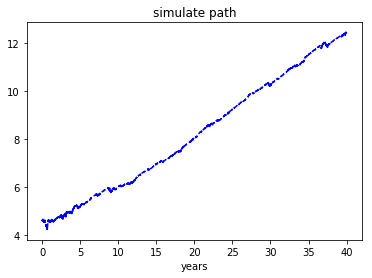

In [5]:
years = np.arange(y.shape[-1]-1) * (1/250)
plt.plot(years, y[0,1:].T, 'b--')
plt.title('simulate path')
plt.xlabel('years')
plt.show()

# neg vol: [[517]]


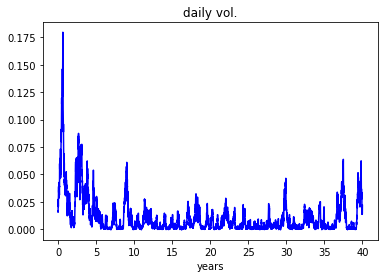

In [6]:
print("# neg vol:", sum(y[1,1:].T<0))
plt.plot(years, y[1,1:].T, 'b-')
plt.title('daily vol.')
plt.xlabel('years')
plt.show()

# EKF and Parameter Estimation

In [7]:
init_params = [0.6, 1.1, 0.03, 0.35, -0.4, 0.035]

### Initial path vs. true path

In [8]:
y_ = sim.simulate_heston_state(init_params, S0, N=N) 

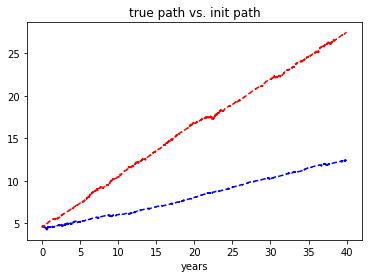

In [9]:
plt.plot(years, y[0,1:].T, 'b--')
plt.plot(years, y_[0,1:].T, 'r--')
plt.title('true path vs. init path')
plt.xlabel('years')
plt.show()

# neg vol: [[517]]


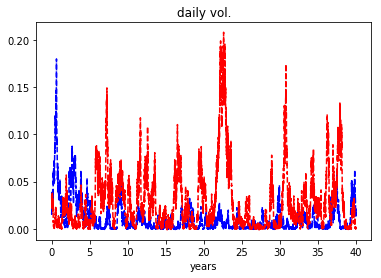

In [10]:
print("# neg vol:", sum(y[1,1:].T<0))
plt.plot(years, y[1,1:].T, 'b--')
plt.plot(years, y_[1,1:].T, 'r--')
plt.title('daily vol.')
plt.xlabel('years')
plt.show()

### Note: Optimization takes time...

In [11]:
def wrap_heston_obj(params, *args):
    y = args[0]
    S0 = args[1]
    return kf.ekf_heston_obj(y, params, S0)

In [12]:
num_iter = 1
def callbackF(xi):
    global num_iter
    global arg
    print('i: ' + str(num_iter))
    print('x_i: ' + str(xi))
    print('f_i: ' + str(wrap_heston_obj(xi, *args)))
    num_iter += 1

In [13]:
args = (y[0,:].T, S0)
maxiter = 100000

In [14]:
print("Init params: {}".format(init_params))
print("True Params: {}".format(true_params))

Init params: [0.6, 1.1, 0.03, 0.35, -0.4, 0.035]
True Params: [0.2, 2.2, 0.01, 0.29, -0.6, 0.02]


In [15]:
xopt, fopt, _, _, _ = fmin(wrap_heston_obj, init_params, args=args, maxiter=maxiter, callback=callbackF, 
                           disp=True, retall=False, full_output=True)

i: 1
x_i: [ 0.54      1.1275    0.03075   0.35875  -0.41      0.035875]
f_i: -6963.9687614371305
i: 2
x_i: [ 0.54      1.1275    0.03075   0.35875  -0.41      0.035875]
f_i: -6963.9687614371305
i: 3
x_i: [ 0.54      1.1275    0.03075   0.35875  -0.41      0.035875]
f_i: -6963.9687614371305
i: 4
x_i: [ 0.54666667  1.17333333  0.02825     0.34611111 -0.40333333  0.03733333]
f_i: -7002.079876995958
i: 5
x_i: [ 0.54666667  1.17333333  0.02825     0.34611111 -0.40333333  0.03733333]
f_i: -7002.079876995958
i: 6
x_i: [ 0.49333333  1.24666667  0.0305      0.34222222 -0.40666667  0.037625  ]
f_i: -7061.430798252927
i: 7
x_i: [ 0.49333333  1.24666667  0.0305      0.34222222 -0.40666667  0.037625  ]
f_i: -7061.430798252927
i: 8
x_i: [ 0.49333333  1.24666667  0.0305      0.34222222 -0.40666667  0.037625  ]
f_i: -7061.430798252927
i: 9
x_i: [ 0.40555556  1.28180556  0.02795833  0.35113426 -0.43944444  0.0380625 ]
f_i: -7152.863796217426
i: 10
x_i: [ 0.40555556  1.28180556  0.02795833  0.35113426 -

f_i: -7466.43835690444
i: 77
x_i: [ 0.14162124  2.01733732  0.02238672  0.32160855 -0.4130623   0.04283656]
f_i: -7467.297419898637
i: 78
x_i: [ 0.14162124  2.01733732  0.02238672  0.32160855 -0.4130623   0.04283656]
f_i: -7467.297419898637
i: 79
x_i: [ 0.14162124  2.01733732  0.02238672  0.32160855 -0.4130623   0.04283656]
f_i: -7467.297419898637
i: 80
x_i: [ 0.14959162  1.9331771   0.02242228  0.33096932 -0.43355394  0.04144139]
f_i: -7467.341206757336
i: 81
x_i: [ 0.15067192  2.02060478  0.021926    0.32109863 -0.41390885  0.04191406]
f_i: -7467.702410879169
i: 82
x_i: [ 0.1550606   2.13022577  0.02207056  0.3185962  -0.42013546  0.03880606]
f_i: -7468.895312832109
i: 83
x_i: [ 0.1550606   2.13022577  0.02207056  0.3185962  -0.42013546  0.03880606]
f_i: -7468.895312832109
i: 84
x_i: [ 0.1612533   2.08807347  0.02242897  0.33461662 -0.44998372  0.03569186]
f_i: -7469.390549084419
i: 85
x_i: [ 0.1612533   2.08807347  0.02242897  0.33461662 -0.44998372  0.03569186]
f_i: -7469.390549084

f_i: -7481.7659631284005
i: 152
x_i: [-0.02528536  1.61643231  0.04212653  0.36783071 -0.40820614  0.01816777]
f_i: -7481.7659631284005
i: 153
x_i: [-0.02528536  1.61643231  0.04212653  0.36783071 -0.40820614  0.01816777]
f_i: -7481.7659631284005
i: 154
x_i: [-0.01632845  1.54196227  0.04289322  0.37242033 -0.41595942  0.01607261]
f_i: -7481.887552267658
i: 155
x_i: [-0.01632845  1.54196227  0.04289322  0.37242033 -0.41595942  0.01607261]
f_i: -7481.887552267658
i: 156
x_i: [-0.01632845  1.54196227  0.04289322  0.37242033 -0.41595942  0.01607261]
f_i: -7481.887552267658
i: 157
x_i: [-0.01632845  1.54196227  0.04289322  0.37242033 -0.41595942  0.01607261]
f_i: -7481.887552267658
i: 158
x_i: [-0.01632845  1.54196227  0.04289322  0.37242033 -0.41595942  0.01607261]
f_i: -7481.887552267658
i: 159
x_i: [-0.03267809  1.52489973  0.04388132  0.36891467 -0.40053472  0.01674087]
f_i: -7482.10746659435
i: 160
x_i: [-0.03267809  1.52489973  0.04388132  0.36891467 -0.40053472  0.01674087]
f_i: -74

f_i: -7484.656707540692
i: 227
x_i: [ 0.04565169  1.54083281  0.03397707  0.33968896 -0.41194389  0.01565154]
f_i: -7484.656707540692
i: 228
x_i: [ 0.04565169  1.54083281  0.03397707  0.33968896 -0.41194389  0.01565154]
f_i: -7484.656707540692
i: 229
x_i: [ 0.04565169  1.54083281  0.03397707  0.33968896 -0.41194389  0.01565154]
f_i: -7484.656707540692
i: 230
x_i: [ 0.04565169  1.54083281  0.03397707  0.33968896 -0.41194389  0.01565154]
f_i: -7484.656707540692
i: 231
x_i: [ 0.04565169  1.54083281  0.03397707  0.33968896 -0.41194389  0.01565154]
f_i: -7484.656707540692
i: 232
x_i: [ 0.04565169  1.54083281  0.03397707  0.33968896 -0.41194389  0.01565154]
f_i: -7484.656707540692
i: 233
x_i: [ 0.04565169  1.54083281  0.03397707  0.33968896 -0.41194389  0.01565154]
f_i: -7484.656707540692
i: 234
x_i: [ 0.04743553  1.56799081  0.03357293  0.33707103 -0.41052972  0.01566383]
f_i: -7484.675493026419
i: 235
x_i: [ 0.04743553  1.56799081  0.03357293  0.33707103 -0.41052972  0.01566383]
f_i: -7484

i: 302
x_i: [ 0.05120125  1.55214627  0.03300139  0.33477838 -0.40975309  0.01541423]
f_i: -7484.71336590232
i: 303
x_i: [ 0.05120125  1.55214627  0.03300139  0.33477838 -0.40975309  0.01541423]
f_i: -7484.71336590232
i: 304
x_i: [ 0.05127355  1.5520179   0.0329921   0.33472732 -0.40972744  0.01540772]
f_i: -7484.713365985202
i: 305
x_i: [ 0.05120762  1.55217153  0.03299721  0.3347413  -0.40971662  0.01541117]
f_i: -7484.713366595829
i: 306
x_i: [ 0.05131121  1.55231139  0.0329864   0.33471683 -0.40975005  0.0154096 ]
f_i: -7484.713367143535
i: 307
x_i: [ 0.05118602  1.55195317  0.03300224  0.3347622  -0.4097169   0.0154122 ]
f_i: -7484.713370191862
i: 308
x_i: [ 0.05118602  1.55195317  0.03300224  0.3347622  -0.4097169   0.0154122 ]
f_i: -7484.713370191862
i: 309
x_i: [ 0.05118602  1.55195317  0.03300224  0.3347622  -0.4097169   0.0154122 ]
f_i: -7484.713370191862
i: 310
x_i: [ 0.05118602  1.55195317  0.03300224  0.3347622  -0.4097169   0.0154122 ]
f_i: -7484.713370191862
i: 311
x_i: 

i: 377
x_i: [ 0.05090169  1.55218082  0.03311194  0.33332706 -0.41402013  0.0156069 ]
f_i: -7484.720102267734
i: 378
x_i: [ 0.05090169  1.55218082  0.03311194  0.33332706 -0.41402013  0.0156069 ]
f_i: -7484.720102267734
i: 379
x_i: [ 0.05048464  1.55238561  0.0331726   0.33284386 -0.41584754  0.01565278]
f_i: -7484.721463533825
i: 380
x_i: [ 0.05048464  1.55238561  0.0331726   0.33284386 -0.41584754  0.01565278]
f_i: -7484.721463533825
i: 381
x_i: [ 0.05048464  1.55238561  0.0331726   0.33284386 -0.41584754  0.01565278]
f_i: -7484.721463533825
i: 382
x_i: [ 0.05042819  1.55068321  0.03318343  0.33252227 -0.41654895  0.01563186]
f_i: -7484.722990432564
i: 383
x_i: [ 0.05042819  1.55068321  0.03318343  0.33252227 -0.41654895  0.01563186]
f_i: -7484.722990432564
i: 384
x_i: [ 0.05019812  1.55231359  0.03318132  0.33241573 -0.41612285  0.01557311]
f_i: -7484.726206768469
i: 385
x_i: [ 0.05019812  1.55231359  0.03318132  0.33241573 -0.41612285  0.01557311]
f_i: -7484.726206768469
i: 386
x_i

i: 452
x_i: [ 0.048775    1.55714119  0.03341965  0.28859273 -0.50012918  0.01482267]
f_i: -7484.870081093283
i: 453
x_i: [ 0.05146493  1.55340483  0.03316455  0.27996809 -0.5159749   0.01461347]
f_i: -7484.881901186695
i: 454
x_i: [ 0.05146493  1.55340483  0.03316455  0.27996809 -0.5159749   0.01461347]
f_i: -7484.881901186695
i: 455
x_i: [ 0.05269964  1.56316059  0.03304204  0.27237864 -0.53383051  0.01458306]
f_i: -7484.910606570292
i: 456
x_i: [ 0.05269964  1.56316059  0.03304204  0.27237864 -0.53383051  0.01458306]
f_i: -7484.910606570292
i: 457
x_i: [ 0.05269964  1.56316059  0.03304204  0.27237864 -0.53383051  0.01458306]
f_i: -7484.910606570292
i: 458
x_i: [ 0.05269964  1.56316059  0.03304204  0.27237864 -0.53383051  0.01458306]
f_i: -7484.910606570292
i: 459
x_i: [ 0.05269964  1.56316059  0.03304204  0.27237864 -0.53383051  0.01458306]
f_i: -7484.910606570292
i: 460
x_i: [ 0.05269964  1.56316059  0.03304204  0.27237864 -0.53383051  0.01458306]
f_i: -7484.910606570292
i: 461
x_i

i: 527
x_i: [ 0.06480685  1.64094862  0.03163593  0.23623662 -0.63520679  0.01484995]
f_i: -7485.03511151441
i: 528
x_i: [ 0.06480685  1.64094862  0.03163593  0.23623662 -0.63520679  0.01484995]
f_i: -7485.03511151441
i: 529
x_i: [ 0.06475572  1.64351362  0.03165621  0.23434433 -0.64142732  0.01480459]
f_i: -7485.0355181020805
i: 530
x_i: [ 0.06475572  1.64351362  0.03165621  0.23434433 -0.64142732  0.01480459]
f_i: -7485.0355181020805
i: 531
x_i: [ 0.06475572  1.64351362  0.03165621  0.23434433 -0.64142732  0.01480459]
f_i: -7485.0355181020805
i: 532
x_i: [ 0.06475572  1.64351362  0.03165621  0.23434433 -0.64142732  0.01480459]
f_i: -7485.0355181020805
i: 533
x_i: [ 0.06456083  1.63826925  0.03168968  0.23615497 -0.63611932  0.01479083]
f_i: -7485.035850966156
i: 534
x_i: [ 0.06456083  1.63826925  0.03168968  0.23615497 -0.63611932  0.01479083]
f_i: -7485.035850966156
i: 535
x_i: [ 0.06475328  1.64408132  0.03168237  0.2330546  -0.6462073   0.01477743]
f_i: -7485.036132691029
i: 536
x

i: 602
x_i: [ 0.06573117  1.65364534  0.03168959  0.21549849 -0.71114617  0.01466273]
f_i: -7485.058665107995
i: 603
x_i: [ 0.06392754  1.66490194  0.03175293  0.21152115 -0.72248394  0.0146823 ]
f_i: -7485.0617652139845
i: 604
x_i: [ 0.06468156  1.65216333  0.03170653  0.21687156 -0.70314608  0.01473796]
f_i: -7485.069385019377
i: 605
x_i: [ 0.06468156  1.65216333  0.03170653  0.21687156 -0.70314608  0.01473796]
f_i: -7485.069385019377
i: 606
x_i: [ 0.06468156  1.65216333  0.03170653  0.21687156 -0.70314608  0.01473796]
f_i: -7485.069385019377
i: 607
x_i: [ 0.06468156  1.65216333  0.03170653  0.21687156 -0.70314608  0.01473796]
f_i: -7485.069385019377
i: 608
x_i: [ 0.06468156  1.65216333  0.03170653  0.21687156 -0.70314608  0.01473796]
f_i: -7485.069385019377
i: 609
x_i: [ 0.06395491  1.65933537  0.03167909  0.21360477 -0.71188302  0.01469908]
f_i: -7485.071349331984
i: 610
x_i: [ 0.06395491  1.65933537  0.03167909  0.21360477 -0.71188302  0.01469908]
f_i: -7485.071349331984
i: 611
x_

i: 677
x_i: [ 0.06324294  1.63374542  0.03169703  0.18963699 -0.80402994  0.01504678]
f_i: -7485.132264675453
i: 678
x_i: [ 0.06252426  1.63298769  0.0318074   0.18765183 -0.81611635  0.01475849]
f_i: -7485.135221933507
i: 679
x_i: [ 0.06252426  1.63298769  0.0318074   0.18765183 -0.81611635  0.01475849]
f_i: -7485.135221933507
i: 680
x_i: [ 0.06279027  1.6335183   0.03172585  0.18656224 -0.81742464  0.01490149]
f_i: -7485.136242600377
i: 681
x_i: [ 0.06279027  1.6335183   0.03172585  0.18656224 -0.81742464  0.01490149]
f_i: -7485.136242600377
i: 682
x_i: [ 0.06180578  1.63246152  0.03185659  0.18609158 -0.82312545  0.01492763]
f_i: -7485.137391023666
i: 683
x_i: [ 0.06180578  1.63246152  0.03185659  0.18609158 -0.82312545  0.01492763]
f_i: -7485.137391023666
i: 684
x_i: [ 0.06180578  1.63246152  0.03185659  0.18609158 -0.82312545  0.01492763]
f_i: -7485.137391023666
i: 685
x_i: [ 0.06180578  1.63246152  0.03185659  0.18609158 -0.82312545  0.01492763]
f_i: -7485.137391023666
i: 686
x_i

f_i: -7485.143862718346
i: 752
x_i: [ 0.06006313  1.64528339  0.03203036  0.17795613 -0.86504842  0.01505325]
f_i: -7485.143862718346
i: 753
x_i: [ 0.06006313  1.64528339  0.03203036  0.17795613 -0.86504842  0.01505325]
f_i: -7485.143862718346
i: 754
x_i: [ 0.05955977  1.64408637  0.03207827  0.17388945 -0.88534116  0.01505461]
f_i: -7485.144501541633
i: 755
x_i: [ 0.05955977  1.64408637  0.03207827  0.17388945 -0.88534116  0.01505461]
f_i: -7485.144501541633
i: 756
x_i: [ 0.05983575  1.6483236   0.03201862  0.1752748  -0.87762052  0.01503589]
f_i: -7485.145526950932
i: 757
x_i: [ 0.05983575  1.6483236   0.03201862  0.1752748  -0.87762052  0.01503589]
f_i: -7485.145526950932
i: 758
x_i: [ 0.05983575  1.6483236   0.03201862  0.1752748  -0.87762052  0.01503589]
f_i: -7485.145526950932
i: 759
x_i: [ 0.05983575  1.6483236   0.03201862  0.1752748  -0.87762052  0.01503589]
f_i: -7485.145526950932
i: 760
x_i: [ 0.05961987  1.64819135  0.03206743  0.17233399 -0.89403733  0.01504245]
f_i: -7485

i: 827
x_i: [ 0.06753282  1.65795474  0.03122248  0.15538275 -0.99838267  0.01477018]
f_i: -7485.177862410677
i: 828
x_i: [ 0.06748066  1.65673019  0.03121297  0.15505289 -0.99856875  0.01483816]
f_i: -7485.178078402785
i: 829
x_i: [ 0.06748066  1.65673019  0.03121297  0.15505289 -0.99856875  0.01483816]
f_i: -7485.178078402785
i: 830
x_i: [ 0.06817769  1.66022927  0.03109227  0.15267466 -1.01280151  0.01483554]
f_i: -7485.1782308038755
i: 831
x_i: [ 0.06796162  1.65790005  0.03116029  0.15100712 -1.02565322  0.01475202]
f_i: -7485.180796501655
i: 832
x_i: [ 0.06796162  1.65790005  0.03116029  0.15100712 -1.02565322  0.01475202]
f_i: -7485.180796501655
i: 833
x_i: [ 0.06796162  1.65790005  0.03116029  0.15100712 -1.02565322  0.01475202]
f_i: -7485.180796501655
i: 834
x_i: [ 0.06796162  1.65790005  0.03116029  0.15100712 -1.02565322  0.01475202]
f_i: -7485.180796501655
i: 835
x_i: [ 0.06796162  1.65790005  0.03116029  0.15100712 -1.02565322  0.01475202]
f_i: -7485.180796501655
i: 836
x_

i: 902
x_i: [ 0.06835423  1.66690935  0.03114044  0.12439619 -1.25787069  0.01469686]
f_i: -7485.204220930132
i: 903
x_i: [ 0.06835423  1.66690935  0.03114044  0.12439619 -1.25787069  0.01469686]
f_i: -7485.204220930132
i: 904
x_i: [ 0.06835423  1.66690935  0.03114044  0.12439619 -1.25787069  0.01469686]
f_i: -7485.204220930132
i: 905
x_i: [ 0.0672694   1.66907062  0.03122262  0.12548944 -1.24881581  0.01482343]
f_i: -7485.20480503382
i: 906
x_i: [ 0.0672694   1.66907062  0.03122262  0.12548944 -1.24881581  0.01482343]
f_i: -7485.20480503382
i: 907
x_i: [ 0.0672694   1.66907062  0.03122262  0.12548944 -1.24881581  0.01482343]
f_i: -7485.20480503382
i: 908
x_i: [ 0.0672694   1.66907062  0.03122262  0.12548944 -1.24881581  0.01482343]
f_i: -7485.20480503382
i: 909
x_i: [ 0.0672694   1.66907062  0.03122262  0.12548944 -1.24881581  0.01482343]
f_i: -7485.20480503382
i: 910
x_i: [ 0.0672694   1.66907062  0.03122262  0.12548944 -1.24881581  0.01482343]
f_i: -7485.20480503382
i: 911
x_i: [ 0.

i: 977
x_i: [ 0.06967226  1.67427599  0.03099319  0.10838286 -1.45130094  0.01489154]
f_i: -7485.214801879421
i: 978
x_i: [ 0.06967226  1.67427599  0.03099319  0.10838286 -1.45130094  0.01489154]
f_i: -7485.214801879421
i: 979
x_i: [ 0.06967226  1.67427599  0.03099319  0.10838286 -1.45130094  0.01489154]
f_i: -7485.214801879421
i: 980
x_i: [ 0.06967226  1.67427599  0.03099319  0.10838286 -1.45130094  0.01489154]
f_i: -7485.214801879421
i: 981
x_i: [ 0.06967226  1.67427599  0.03099319  0.10838286 -1.45130094  0.01489154]
f_i: -7485.214801879421
i: 982
x_i: [ 0.06967226  1.67427599  0.03099319  0.10838286 -1.45130094  0.01489154]
f_i: -7485.214801879421
i: 983
x_i: [ 0.06957876  1.67484339  0.03099664  0.107524   -1.46403762  0.01493782]
f_i: -7485.214857200169
i: 984
x_i: [ 0.06957876  1.67484339  0.03099664  0.107524   -1.46403762  0.01493782]
f_i: -7485.214857200169
i: 985
x_i: [ 0.06968896  1.67276778  0.03101073  0.10801997 -1.45726694  0.01489241]
f_i: -7485.214901773015
i: 986
x_i

i: 1052
x_i: [ 0.07033859  1.66625127  0.03092991  0.09319974 -1.69082501  0.01486223]
f_i: -7485.219903805045
i: 1053
x_i: [ 0.07033859  1.66625127  0.03092991  0.09319974 -1.69082501  0.01486223]
f_i: -7485.219903805045
i: 1054
x_i: [ 0.07033859  1.66625127  0.03092991  0.09319974 -1.69082501  0.01486223]
f_i: -7485.219903805045
i: 1055
x_i: [ 0.07033859  1.66625127  0.03092991  0.09319974 -1.69082501  0.01486223]
f_i: -7485.219903805045
i: 1056
x_i: [ 0.07033859  1.66625127  0.03092991  0.09319974 -1.69082501  0.01486223]
f_i: -7485.219903805045
i: 1057
x_i: [ 0.07033859  1.66625127  0.03092991  0.09319974 -1.69082501  0.01486223]
f_i: -7485.219903805045
i: 1058
x_i: [ 0.06989851  1.66803413  0.03096129  0.09428863 -1.67325795  0.01489174]
f_i: -7485.220368283471
i: 1059
x_i: [ 0.06989851  1.66803413  0.03096129  0.09428863 -1.67325795  0.01489174]
f_i: -7485.220368283471
i: 1060
x_i: [ 0.06989851  1.66803413  0.03096129  0.09428863 -1.67325795  0.01489174]
f_i: -7485.220368283471
i

i: 1126
x_i: [ 0.06790681  1.6682168   0.03112022  0.09108142 -1.72955601  0.01481863]
f_i: -7485.22296102309
i: 1127
x_i: [ 0.0679591   1.66784807  0.03112075  0.09114129 -1.72874455  0.0148206 ]
f_i: -7485.2229772907785
i: 1128
x_i: [ 0.0679591   1.66784807  0.03112075  0.09114129 -1.72874455  0.0148206 ]
f_i: -7485.2229772907785
i: 1129
x_i: [ 0.0679591   1.66784807  0.03112075  0.09114129 -1.72874455  0.0148206 ]
f_i: -7485.2229772907785
i: 1130
x_i: [ 0.0679591   1.66784807  0.03112075  0.09114129 -1.72874455  0.0148206 ]
f_i: -7485.2229772907785
i: 1131
x_i: [ 0.0679591   1.66784807  0.03112075  0.09114129 -1.72874455  0.0148206 ]
f_i: -7485.2229772907785
i: 1132
x_i: [ 0.0679591   1.66784807  0.03112075  0.09114129 -1.72874455  0.0148206 ]
f_i: -7485.2229772907785
i: 1133
x_i: [ 0.0679591   1.66784807  0.03112075  0.09114129 -1.72874455  0.0148206 ]
f_i: -7485.2229772907785
i: 1134
x_i: [ 0.0679591   1.66784807  0.03112075  0.09114129 -1.72874455  0.0148206 ]
f_i: -7485.22297729

i: 1200
x_i: [ 0.06796703  1.66811236  0.03112467  0.09182761 -1.71589573  0.0148127 ]
f_i: -7485.223007150294
i: 1201
x_i: [ 0.06796703  1.66811236  0.03112467  0.09182761 -1.71589573  0.0148127 ]
f_i: -7485.223007150294
i: 1202
x_i: [ 0.06796243  1.66816417  0.03112517  0.09189833 -1.71457562  0.01481121]
f_i: -7485.223007379303
i: 1203
x_i: [ 0.06796243  1.66816417  0.03112517  0.09189833 -1.71457562  0.01481121]
f_i: -7485.223007379303
i: 1204
x_i: [ 0.06796243  1.66816417  0.03112517  0.09189833 -1.71457562  0.01481121]
f_i: -7485.223007379303
i: 1205
x_i: [ 0.06796243  1.66816417  0.03112517  0.09189833 -1.71457562  0.01481121]
f_i: -7485.223007379303
i: 1206
x_i: [ 0.06796243  1.66816417  0.03112517  0.09189833 -1.71457562  0.01481121]
f_i: -7485.223007379303
i: 1207
x_i: [ 0.06798975  1.6681253   0.0311227   0.09187837 -1.71492327  0.0148115 ]
f_i: -7485.223007500278
i: 1208
x_i: [ 0.06798975  1.6681253   0.0311227   0.09187837 -1.71492327  0.0148115 ]
f_i: -7485.223007500278
i

i: 1274
x_i: [ 0.06800431  1.66762269  0.03111692  0.09062759 -1.73821943  0.01481099]
f_i: -7485.223105733894
i: 1275
x_i: [ 0.06796713  1.66766032  0.0311155   0.08994499 -1.75090179  0.01482076]
f_i: -7485.223115344373
i: 1276
x_i: [ 0.06803708  1.66762692  0.03111092  0.09010023 -1.74767666  0.01480856]
f_i: -7485.223131873995
i: 1277
x_i: [ 0.06812278  1.66803261  0.03110153  0.09070194 -1.73646536  0.01480514]
f_i: -7485.223159041415
i: 1278
x_i: [ 0.06812278  1.66803261  0.03110153  0.09070194 -1.73646536  0.01480514]
f_i: -7485.223159041415
i: 1279
x_i: [ 0.06812278  1.66803261  0.03110153  0.09070194 -1.73646536  0.01480514]
f_i: -7485.223159041415
i: 1280
x_i: [ 0.06802872  1.66790204  0.03110839  0.09009087 -1.7480126   0.01480062]
f_i: -7485.223214397271
i: 1281
x_i: [ 0.06802872  1.66790204  0.03110839  0.09009087 -1.7480126   0.01480062]
f_i: -7485.223214397271
i: 1282
x_i: [ 0.06802872  1.66790204  0.03110839  0.09009087 -1.7480126   0.01480062]
f_i: -7485.223214397271
i

f_i: -7485.227589661309
i: 1348
x_i: [ 0.06876737  1.67686555  0.03108845  0.08722903 -1.81344736  0.01480006]
f_i: -7485.227589661309
i: 1349
x_i: [ 0.06876737  1.67686555  0.03108845  0.08722903 -1.81344736  0.01480006]
f_i: -7485.227589661309
i: 1350
x_i: [ 0.06876737  1.67686555  0.03108845  0.08722903 -1.81344736  0.01480006]
f_i: -7485.227589661309
i: 1351
x_i: [ 0.06876737  1.67686555  0.03108845  0.08722903 -1.81344736  0.01480006]
f_i: -7485.227589661309
i: 1352
x_i: [ 0.06876737  1.67686555  0.03108845  0.08722903 -1.81344736  0.01480006]
f_i: -7485.227589661309
i: 1353
x_i: [ 0.06876737  1.67686555  0.03108845  0.08722903 -1.81344736  0.01480006]
f_i: -7485.227589661309
i: 1354
x_i: [ 0.06876737  1.67686555  0.03108845  0.08722903 -1.81344736  0.01480006]
f_i: -7485.227589661309
i: 1355
x_i: [ 0.06905303  1.67767458  0.03105173  0.0862553  -1.83308227  0.01482845]
f_i: -7485.227733142248
i: 1356
x_i: [ 0.06905303  1.67767458  0.03105173  0.0862553  -1.83308227  0.01482845]
f

i: 1422
x_i: [ 0.06913768  1.68122876  0.0310483   0.08154416 -1.94387185  0.01471415]
f_i: -7485.229839941557
i: 1423
x_i: [ 0.06913768  1.68122876  0.0310483   0.08154416 -1.94387185  0.01471415]
f_i: -7485.229839941557
i: 1424
x_i: [ 0.06897633  1.6808577   0.03106612  0.08171771 -1.93923252  0.0147321 ]
f_i: -7485.229843940926
i: 1425
x_i: [ 0.06897633  1.6808577   0.03106612  0.08171771 -1.93923252  0.0147321 ]
f_i: -7485.229843940926
i: 1426
x_i: [ 0.06897633  1.6808577   0.03106612  0.08171771 -1.93923252  0.0147321 ]
f_i: -7485.229843940926
i: 1427
x_i: [ 0.06892197  1.68145399  0.03107134  0.08150286 -1.94444451  0.01474931]
f_i: -7485.229849451948
i: 1428
x_i: [ 0.06877844  1.68072862  0.03108344  0.08121898 -1.9511345   0.01471863]
f_i: -7485.229940064888
i: 1429
x_i: [ 0.06877844  1.68072862  0.03108344  0.08121898 -1.9511345   0.01471863]
f_i: -7485.229940064888
i: 1430
x_i: [ 0.06877844  1.68072862  0.03108344  0.08121898 -1.9511345   0.01471863]
f_i: -7485.229940064888
i

i: 1496
x_i: [ 0.06932059  1.67602477  0.03103416  0.07616555 -2.08185404  0.01473831]
f_i: -7485.232266137191
i: 1497
x_i: [ 0.06913371  1.67648749  0.03103629  0.07549957 -2.09835584  0.01470811]
f_i: -7485.232321864774
i: 1498
x_i: [ 0.06913371  1.67648749  0.03103629  0.07549957 -2.09835584  0.01470811]
f_i: -7485.232321864774
i: 1499
x_i: [ 0.06925629  1.67665175  0.03104091  0.07595827 -2.087251    0.01475558]
f_i: -7485.2324253464785
i: 1500
x_i: [ 0.06925629  1.67665175  0.03104091  0.07595827 -2.087251    0.01475558]
f_i: -7485.2324253464785
i: 1501
x_i: [ 0.06925629  1.67665175  0.03104091  0.07595827 -2.087251    0.01475558]
f_i: -7485.2324253464785
i: 1502
x_i: [ 0.06925629  1.67665175  0.03104091  0.07595827 -2.087251    0.01475558]
f_i: -7485.2324253464785
i: 1503
x_i: [ 0.06924851  1.67655593  0.03101036  0.07413494 -2.13490253  0.01474985]
f_i: -7485.232619046558
i: 1504
x_i: [ 0.06948047  1.67703738  0.03101695  0.0745193  -2.12679239  0.01469699]
f_i: -7485.2327497348

i: 1570
x_i: [ 0.07046922  1.6844007   0.03090426  0.06485871 -2.44771869  0.01473773]
f_i: -7485.235836352675
i: 1571
x_i: [ 0.07046338  1.68301058  0.03090441  0.06427063 -2.46985802  0.01474459]
f_i: -7485.236224413245
i: 1572
x_i: [ 0.07046338  1.68301058  0.03090441  0.06427063 -2.46985802  0.01474459]
f_i: -7485.236224413245
i: 1573
x_i: [ 0.07046338  1.68301058  0.03090441  0.06427063 -2.46985802  0.01474459]
f_i: -7485.236224413245
i: 1574
x_i: [ 0.07046338  1.68301058  0.03090441  0.06427063 -2.46985802  0.01474459]
f_i: -7485.236224413245
i: 1575
x_i: [ 0.07046338  1.68301058  0.03090441  0.06427063 -2.46985802  0.01474459]
f_i: -7485.236224413245
i: 1576
x_i: [ 0.07046338  1.68301058  0.03090441  0.06427063 -2.46985802  0.01474459]
f_i: -7485.236224413245
i: 1577
x_i: [ 0.07046338  1.68301058  0.03090441  0.06427063 -2.46985802  0.01474459]
f_i: -7485.236224413245
i: 1578
x_i: [ 0.07046338  1.68301058  0.03090441  0.06427063 -2.46985802  0.01474459]
f_i: -7485.236224413245
i

i: 1644
x_i: [ 0.06960996  1.67900916  0.03101598  0.06229855 -2.55157772  0.01472926]
f_i: -7485.237191528742
i: 1645
x_i: [ 0.06960996  1.67900916  0.03101598  0.06229855 -2.55157772  0.01472926]
f_i: -7485.237191528742
i: 1646
x_i: [ 0.06960996  1.67900916  0.03101598  0.06229855 -2.55157772  0.01472926]
f_i: -7485.237191528742
i: 1647
x_i: [ 0.06960996  1.67900916  0.03101598  0.06229855 -2.55157772  0.01472926]
f_i: -7485.237191528742
i: 1648
x_i: [ 0.06960996  1.67900916  0.03101598  0.06229855 -2.55157772  0.01472926]
f_i: -7485.237191528742
i: 1649
x_i: [ 0.06955751  1.67953079  0.03101821  0.06225073 -2.55298205  0.01473807]
f_i: -7485.237219376997
i: 1650
x_i: [ 0.06955751  1.67953079  0.03101821  0.06225073 -2.55298205  0.01473807]
f_i: -7485.237219376997
i: 1651
x_i: [ 0.06955751  1.67953079  0.03101821  0.06225073 -2.55298205  0.01473807]
f_i: -7485.237219376997
i: 1652
x_i: [ 0.06955751  1.67953079  0.03101821  0.06225073 -2.55298205  0.01473807]
f_i: -7485.237219376997
i

i: 1718
x_i: [ 0.07015795  1.68228575  0.03094388  0.05785927 -2.74681829  0.01472655]
f_i: -7485.238482256694
i: 1719
x_i: [ 0.07015795  1.68228575  0.03094388  0.05785927 -2.74681829  0.01472655]
f_i: -7485.238482256694
i: 1720
x_i: [ 0.07015795  1.68228575  0.03094388  0.05785927 -2.74681829  0.01472655]
f_i: -7485.238482256694
i: 1721
x_i: [ 0.07015795  1.68228575  0.03094388  0.05785927 -2.74681829  0.01472655]
f_i: -7485.238482256694
i: 1722
x_i: [ 0.07015795  1.68228575  0.03094388  0.05785927 -2.74681829  0.01472655]
f_i: -7485.238482256694
i: 1723
x_i: [ 0.07015795  1.68228575  0.03094388  0.05785927 -2.74681829  0.01472655]
f_i: -7485.238482256694
i: 1724
x_i: [ 0.06992597  1.68186003  0.03096576  0.05736696 -2.77042088  0.01469558]
f_i: -7485.238579656414
i: 1725
x_i: [ 0.07026068  1.68166886  0.03092996  0.05730711 -2.77358643  0.01470747]
f_i: -7485.238620499959
i: 1726
x_i: [ 0.07026068  1.68166886  0.03092996  0.05730711 -2.77358643  0.01470747]
f_i: -7485.238620499959
i

i: 1792
x_i: [ 0.06961828  1.68214693  0.03099497  0.05235559 -3.03788379  0.01472564]
f_i: -7485.240059350735
i: 1793
x_i: [ 0.06961828  1.68214693  0.03099497  0.05235559 -3.03788379  0.01472564]
f_i: -7485.240059350735
i: 1794
x_i: [ 0.06946694  1.68195806  0.03101079  0.05226319 -3.04396014  0.01471237]
f_i: -7485.240063080577
i: 1795
x_i: [ 0.06946694  1.68195806  0.03101079  0.05226319 -3.04396014  0.01471237]
f_i: -7485.240063080577
i: 1796
x_i: [ 0.06946694  1.68195806  0.03101079  0.05226319 -3.04396014  0.01471237]
f_i: -7485.240063080577
i: 1797
x_i: [ 0.06972189  1.68257099  0.03097939  0.05237592 -3.0367301   0.01473418]
f_i: -7485.2400907379
i: 1798
x_i: [ 0.06972189  1.68257099  0.03097939  0.05237592 -3.0367301   0.01473418]
f_i: -7485.2400907379
i: 1799
x_i: [ 0.06960935  1.68172108  0.03099525  0.05218225 -3.04814893  0.01471879]
f_i: -7485.240110685981
i: 1800
x_i: [ 0.06960935  1.68172108  0.03099525  0.05218225 -3.04814893  0.01471879]
f_i: -7485.240110685981
i: 18

i: 1866
x_i: [ 0.06944739  1.68192411  0.03100439  0.04992272 -3.1869907   0.01475716]
f_i: -7485.240658455538
i: 1867
x_i: [ 0.06944739  1.68192411  0.03100439  0.04992272 -3.1869907   0.01475716]
f_i: -7485.240658455538
i: 1868
x_i: [ 0.06932174  1.68184367  0.03101305  0.04929259 -3.22675343  0.01476065]
f_i: -7485.240710684935
i: 1869
x_i: [ 0.06932174  1.68184367  0.03101305  0.04929259 -3.22675343  0.01476065]
f_i: -7485.240710684935
i: 1870
x_i: [ 0.06932174  1.68184367  0.03101305  0.04929259 -3.22675343  0.01476065]
f_i: -7485.240710684935
i: 1871
x_i: [ 0.06932174  1.68184367  0.03101305  0.04929259 -3.22675343  0.01476065]
f_i: -7485.240710684935
i: 1872
x_i: [ 0.06932174  1.68184367  0.03101305  0.04929259 -3.22675343  0.01476065]
f_i: -7485.240710684935
i: 1873
x_i: [ 0.06932174  1.68184367  0.03101305  0.04929259 -3.22675343  0.01476065]
f_i: -7485.240710684935
i: 1874
x_i: [ 0.06932174  1.68184367  0.03101305  0.04929259 -3.22675343  0.01476065]
f_i: -7485.240710684935
i

i: 1940
x_i: [ 0.06917015  1.68154843  0.03102873  0.04838255 -3.28867838  0.01477065]
f_i: -7485.240872404414
i: 1941
x_i: [ 0.06917015  1.68154843  0.03102873  0.04838255 -3.28867838  0.01477065]
f_i: -7485.240872404414
i: 1942
x_i: [ 0.06917015  1.68154843  0.03102873  0.04838255 -3.28867838  0.01477065]
f_i: -7485.240872404414
i: 1943
x_i: [ 0.06918256  1.68100711  0.03102974  0.04831468 -3.29322386  0.01476458]
f_i: -7485.2408771263545
i: 1944
x_i: [ 0.06917508  1.68097762  0.03102821  0.04789291 -3.32166565  0.01477035]
f_i: -7485.240919144412
i: 1945
x_i: [ 0.06910751  1.68142945  0.03104223  0.04813882 -3.30654234  0.01476622]
f_i: -7485.240951621739
i: 1946
x_i: [ 0.06910751  1.68142945  0.03104223  0.04813882 -3.30654234  0.01476622]
f_i: -7485.240951621739
i: 1947
x_i: [ 0.06910751  1.68142945  0.03104223  0.04813882 -3.30654234  0.01476622]
f_i: -7485.240951621739
i: 1948
x_i: [ 0.06910751  1.68142945  0.03104223  0.04813882 -3.30654234  0.01476622]
f_i: -7485.240951621739


i: 2014
x_i: [ 0.06987043  1.68369422  0.03097025  0.04507609 -3.53241247  0.01472569]
f_i: -7485.241841732626
i: 2015
x_i: [ 0.06987043  1.68369422  0.03097025  0.04507609 -3.53241247  0.01472569]
f_i: -7485.241841732626
i: 2016
x_i: [ 0.06987043  1.68369422  0.03097025  0.04507609 -3.53241247  0.01472569]
f_i: -7485.241841732626
i: 2017
x_i: [ 0.06987043  1.68369422  0.03097025  0.04507609 -3.53241247  0.01472569]
f_i: -7485.241841732626
i: 2018
x_i: [ 0.07014752  1.68355279  0.03094207  0.04471409 -3.56015458  0.01472901]
f_i: -7485.241880836334
i: 2019
x_i: [ 0.07014752  1.68355279  0.03094207  0.04471409 -3.56015458  0.01472901]
f_i: -7485.241880836334
i: 2020
x_i: [ 0.07014752  1.68355279  0.03094207  0.04471409 -3.56015458  0.01472901]
f_i: -7485.241880836334
i: 2021
x_i: [ 0.07014752  1.68355279  0.03094207  0.04471409 -3.56015458  0.01472901]
f_i: -7485.241880836334
i: 2022
x_i: [ 0.07014752  1.68355279  0.03094207  0.04471409 -3.56015458  0.01472901]
f_i: -7485.241880836334
i

i: 2088
x_i: [ 0.07035811  1.68406568  0.03093866  0.04215684 -3.78227292  0.01472293]
f_i: -7485.242420009494
i: 2089
x_i: [ 0.07002638  1.6846207   0.03097337  0.04190514 -3.80634363  0.01471494]
f_i: -7485.242472598911
i: 2090
x_i: [ 0.07013444  1.68387855  0.03095873  0.04171257 -3.82114624  0.01472077]
f_i: -7485.242540163281
i: 2091
x_i: [ 0.07013444  1.68387855  0.03095873  0.04171257 -3.82114624  0.01472077]
f_i: -7485.242540163281
i: 2092
x_i: [ 0.07013444  1.68387855  0.03095873  0.04171257 -3.82114624  0.01472077]
f_i: -7485.242540163281
i: 2093
x_i: [ 0.07013444  1.68387855  0.03095873  0.04171257 -3.82114624  0.01472077]
f_i: -7485.242540163281
i: 2094
x_i: [ 0.07013444  1.68387855  0.03095873  0.04171257 -3.82114624  0.01472077]
f_i: -7485.242540163281
i: 2095
x_i: [ 0.0700684   1.68292681  0.03097451  0.04140719 -3.8509391   0.01472039]
f_i: -7485.242550138553
i: 2096
x_i: [ 0.0700684   1.68292681  0.03097451  0.04140719 -3.8509391   0.01472039]
f_i: -7485.242550138553
i

f_i: -7485.242952646062
i: 2162
x_i: [ 0.06972001  1.68367303  0.03097599  0.03928039 -4.05501913  0.01471028]
f_i: -7485.242952646062
i: 2163
x_i: [ 0.06981926  1.68325212  0.03097531  0.0393442  -4.0508549   0.01471111]
f_i: -7485.243025340662
i: 2164
x_i: [ 0.06981926  1.68325212  0.03097531  0.0393442  -4.0508549   0.01471111]
f_i: -7485.243025340662
i: 2165
x_i: [ 0.06981926  1.68325212  0.03097531  0.0393442  -4.0508549   0.01471111]
f_i: -7485.243025340662
i: 2166
x_i: [ 0.06981926  1.68325212  0.03097531  0.0393442  -4.0508549   0.01471111]
f_i: -7485.243025340662
i: 2167
x_i: [ 0.06981926  1.68325212  0.03097531  0.0393442  -4.0508549   0.01471111]
f_i: -7485.243025340662
i: 2168
x_i: [ 0.06981926  1.68325212  0.03097531  0.0393442  -4.0508549   0.01471111]
f_i: -7485.243025340662
i: 2169
x_i: [ 0.06981926  1.68325212  0.03097531  0.0393442  -4.0508549   0.01471111]
f_i: -7485.243025340662
i: 2170
x_i: [ 0.06987335  1.68416132  0.03097224  0.03887411 -4.09899001  0.0146989 ]
f

f_i: -7485.243231379597
i: 2236
x_i: [ 0.07030253  1.68388109  0.03092788  0.03817056 -4.17427537  0.01472847]
f_i: -7485.243231379597
i: 2237
x_i: [ 0.07031541  1.68376603  0.03092879  0.03818845 -4.17271384  0.01472425]
f_i: -7485.243231558104
i: 2238
x_i: [ 0.07026505  1.68400752  0.03093109  0.03824604 -4.16667224  0.01473046]
f_i: -7485.243235449139
i: 2239
x_i: [ 0.07028021  1.68375292  0.03092916  0.03816654 -4.17466094  0.01472978]
f_i: -7485.243235588523
i: 2240
x_i: [ 0.07025491  1.68388141  0.03093391  0.03820994 -4.17021778  0.01472592]
f_i: -7485.243236445136
i: 2241
x_i: [ 0.07032562  1.68388643  0.03092713  0.0381408  -4.17818295  0.01473329]
f_i: -7485.2432387454355
i: 2242
x_i: [ 0.07032562  1.68388643  0.03092713  0.0381408  -4.17818295  0.01473329]
f_i: -7485.2432387454355
i: 2243
x_i: [ 0.07024283  1.68371892  0.03093555  0.03821752 -4.17008714  0.01473132]
f_i: -7485.24324660492
i: 2244
x_i: [ 0.07024283  1.68371892  0.03093555  0.03821752 -4.17008714  0.01473132]


f_i: -7485.243471379188
i: 2310
x_i: [ 0.06976451  1.68393643  0.03097964  0.03659064 -4.35498209  0.01475896]
f_i: -7485.243471379188
i: 2311
x_i: [ 0.06976451  1.68393643  0.03097964  0.03659064 -4.35498209  0.01475896]
f_i: -7485.243471379188
i: 2312
x_i: [ 0.06968733  1.68380799  0.03099321  0.03655331 -4.36153597  0.01475418]
f_i: -7485.243505922888
i: 2313
x_i: [ 0.06968733  1.68380799  0.03099321  0.03655331 -4.36153597  0.01475418]
f_i: -7485.243505922888
i: 2314
x_i: [ 0.06968733  1.68380799  0.03099321  0.03655331 -4.36153597  0.01475418]
f_i: -7485.243505922888
i: 2315
x_i: [ 0.06979371  1.68427791  0.03097755  0.03652525 -4.36363455  0.01475283]
f_i: -7485.243519660269
i: 2316
x_i: [ 0.06979371  1.68427791  0.03097755  0.03652525 -4.36363455  0.01475283]
f_i: -7485.243519660269
i: 2317
x_i: [ 0.06979371  1.68427791  0.03097755  0.03652525 -4.36363455  0.01475283]
f_i: -7485.243519660269
i: 2318
x_i: [ 0.06967446  1.68407944  0.03099146  0.03662123 -4.35400903  0.01474438]
f

i: 2384
x_i: [ 0.07008902  1.68506389  0.03096369  0.0337117  -4.73394604  0.01471254]
f_i: -7485.243998207958
i: 2385
x_i: [ 0.07008902  1.68506389  0.03096369  0.0337117  -4.73394604  0.01471254]
f_i: -7485.243998207958
i: 2386
x_i: [ 0.07008902  1.68506389  0.03096369  0.0337117  -4.73394604  0.01471254]
f_i: -7485.243998207958
i: 2387
x_i: [ 0.07008902  1.68506389  0.03096369  0.0337117  -4.73394604  0.01471254]
f_i: -7485.243998207958
i: 2388
x_i: [ 0.07008902  1.68506389  0.03096369  0.0337117  -4.73394604  0.01471254]
f_i: -7485.243998207958
i: 2389
x_i: [ 0.06997071  1.68484169  0.03097325  0.03375104 -4.72748373  0.01471967]
f_i: -7485.244011803171
i: 2390
x_i: [ 0.06997071  1.68484169  0.03097325  0.03375104 -4.72748373  0.01471967]
f_i: -7485.244011803171
i: 2391
x_i: [ 0.07004737  1.68516536  0.03096901  0.0334735  -4.76886897  0.0147171 ]
f_i: -7485.244021601348
i: 2392
x_i: [ 0.07004128  1.68513848  0.03096483  0.03341901 -4.77418054  0.01471598]
f_i: -7485.244058278656
i

i: 2458
x_i: [ 0.07007667  1.68634825  0.0309509   0.03157926 -5.05143146  0.01474013]
f_i: -7485.244288602903
i: 2459
x_i: [ 0.07007667  1.68634825  0.0309509   0.03157926 -5.05143146  0.01474013]
f_i: -7485.244288602903
i: 2460
x_i: [ 0.07007667  1.68634825  0.0309509   0.03157926 -5.05143146  0.01474013]
f_i: -7485.244288602903
i: 2461
x_i: [ 0.07007667  1.68634825  0.0309509   0.03157926 -5.05143146  0.01474013]
f_i: -7485.244288602903
i: 2462
x_i: [ 0.07004151  1.6862286   0.03095326  0.0316335  -5.04294093  0.01474495]
f_i: -7485.2442888357145
i: 2463
x_i: [ 0.07009277  1.68642164  0.03094654  0.03147989 -5.06651471  0.01474372]
f_i: -7485.244289161059
i: 2464
x_i: [ 0.07009277  1.68642164  0.03094654  0.03147989 -5.06651471  0.01474372]
f_i: -7485.244289161059
i: 2465
x_i: [ 0.07006203  1.68661229  0.0309517   0.03136386 -5.08621484  0.0147422 ]
f_i: -7485.2442918426195
i: 2466
x_i: [ 0.07006203  1.68661229  0.0309517   0.03136386 -5.08621484  0.0147422 ]
f_i: -7485.244291842619

i: 2532
x_i: [ 0.0700066   1.6866653   0.03095383  0.03100908 -5.14437155  0.01475531]
f_i: -7485.244321256269
i: 2533
x_i: [ 0.0700066   1.6866653   0.03095383  0.03100908 -5.14437155  0.01475531]
f_i: -7485.244321256269
i: 2534
x_i: [ 0.06997972  1.6865483   0.03095654  0.03108945 -5.13153188  0.01475196]
f_i: -7485.244327241357
i: 2535
x_i: [ 0.06997972  1.6865483   0.03095654  0.03108945 -5.13153188  0.01475196]
f_i: -7485.244327241357
i: 2536
x_i: [ 0.06997972  1.6865483   0.03095654  0.03108945 -5.13153188  0.01475196]
f_i: -7485.244327241357
i: 2537
x_i: [ 0.06997972  1.6865483   0.03095654  0.03108945 -5.13153188  0.01475196]
f_i: -7485.244327241357
i: 2538
x_i: [ 0.06999488  1.68689637  0.03095252  0.03077298 -5.18331383  0.01475291]
f_i: -7485.244331367812
i: 2539
x_i: [ 0.07004075  1.68664059  0.03095207  0.03094143 -5.15689392  0.01475427]
f_i: -7485.24433725683
i: 2540
x_i: [ 0.07004075  1.68664059  0.03095207  0.03094143 -5.15689392  0.01475427]
f_i: -7485.24433725683
i: 

i: 2606
x_i: [ 0.07008419  1.68513601  0.03096648  0.02906204 -5.49360446  0.01472495]
f_i: -7485.244688662094
i: 2607
x_i: [ 0.07008419  1.68513601  0.03096648  0.02906204 -5.49360446  0.01472495]
f_i: -7485.244688662094
i: 2608
x_i: [ 0.07008419  1.68513601  0.03096648  0.02906204 -5.49360446  0.01472495]
f_i: -7485.244688662094
i: 2609
x_i: [ 0.07000533  1.68501681  0.03096951  0.02909713 -5.48674589  0.0147342 ]
f_i: -7485.244704829162
i: 2610
x_i: [ 0.07018078  1.68445091  0.03095753  0.02864553 -5.57148388  0.01471932]
f_i: -7485.244742165194
i: 2611
x_i: [ 0.07018078  1.68445091  0.03095753  0.02864553 -5.57148388  0.01471932]
f_i: -7485.244742165194
i: 2612
x_i: [ 0.07018078  1.68445091  0.03095753  0.02864553 -5.57148388  0.01471932]
f_i: -7485.244742165194
i: 2613
x_i: [ 0.07018078  1.68445091  0.03095753  0.02864553 -5.57148388  0.01471932]
f_i: -7485.244742165194
i: 2614
x_i: [ 0.07007654  1.68440503  0.03095672  0.02874111 -5.55207967  0.01473609]
f_i: -7485.244785588655
i

i: 2680
x_i: [ 0.07008962  1.68416359  0.03095082  0.02826751 -5.64258152  0.01471321]
f_i: -7485.244848844733
i: 2681
x_i: [ 0.0700575   1.68421084  0.03095383  0.02824164 -5.64772398  0.0147117 ]
f_i: -7485.244849464902
i: 2682
x_i: [ 0.0700575   1.68421084  0.03095383  0.02824164 -5.64772398  0.0147117 ]
f_i: -7485.244849464902
i: 2683
x_i: [ 0.0700575   1.68421084  0.03095383  0.02824164 -5.64772398  0.0147117 ]
f_i: -7485.244849464902
i: 2684
x_i: [ 0.0700575   1.68421084  0.03095383  0.02824164 -5.64772398  0.0147117 ]
f_i: -7485.244849464902
i: 2685
x_i: [ 0.0700575   1.68421084  0.03095383  0.02824164 -5.64772398  0.0147117 ]
f_i: -7485.244849464902
i: 2686
x_i: [ 0.0700575   1.68421084  0.03095383  0.02824164 -5.64772398  0.0147117 ]
f_i: -7485.244849464902
i: 2687
x_i: [ 0.07006953  1.68412032  0.03095305  0.02825498 -5.64541387  0.01471188]
f_i: -7485.244849745479
i: 2688
x_i: [ 0.07006953  1.68412032  0.03095305  0.02825498 -5.64541387  0.01471188]
f_i: -7485.244849745479
i

i: 2754
x_i: [ 0.07015557  1.68424212  0.03095009  0.02800585 -5.69738187  0.01472395]
f_i: -7485.2448903159775
i: 2755
x_i: [ 0.07009349  1.68433088  0.0309573   0.02795357 -5.70846785  0.01473195]
f_i: -7485.244890504873
i: 2756
x_i: [ 0.07009349  1.68433088  0.0309573   0.02795357 -5.70846785  0.01473195]
f_i: -7485.244890504873
i: 2757
x_i: [ 0.0701541   1.68465481  0.0309506   0.02785791 -5.72754505  0.01472707]
f_i: -7485.244906283068
i: 2758
x_i: [ 0.0701541   1.68465481  0.0309506   0.02785791 -5.72754505  0.01472707]
f_i: -7485.244906283068
i: 2759
x_i: [ 0.0701541   1.68465481  0.0309506   0.02785791 -5.72754505  0.01472707]
f_i: -7485.244906283068
i: 2760
x_i: [ 0.0701541   1.68465481  0.0309506   0.02785791 -5.72754505  0.01472707]
f_i: -7485.244906283068
i: 2761
x_i: [ 0.0701541   1.68465481  0.0309506   0.02785791 -5.72754505  0.01472707]
f_i: -7485.244906283068
i: 2762
x_i: [ 0.0701541   1.68465481  0.0309506   0.02785791 -5.72754505  0.01472707]
f_i: -7485.244906283068


i: 2828
x_i: [ 0.06992275  1.68466969  0.03096907  0.02682744 -5.94685465  0.01472624]
f_i: -7485.245034775537
i: 2829
x_i: [ 0.06993957  1.68443205  0.03096781  0.02674549 -5.96491579  0.0147114 ]
f_i: -7485.245035359034
i: 2830
x_i: [ 0.06993957  1.68443205  0.03096781  0.02674549 -5.96491579  0.0147114 ]
f_i: -7485.245035359034
i: 2831
x_i: [ 0.06986788  1.68415036  0.03097271  0.02669418 -5.97570812  0.01472351]
f_i: -7485.245039885192
i: 2832
x_i: [ 0.06998848  1.68479477  0.03096094  0.02676692 -5.96020778  0.0147167 ]
f_i: -7485.24504703757
i: 2833
x_i: [ 0.06998848  1.68479477  0.03096094  0.02676692 -5.96020778  0.0147167 ]
f_i: -7485.24504703757
i: 2834
x_i: [ 0.06998848  1.68479477  0.03096094  0.02676692 -5.96020778  0.0147167 ]
f_i: -7485.24504703757
i: 2835
x_i: [ 0.06998848  1.68479477  0.03096094  0.02676692 -5.96020778  0.0147167 ]
f_i: -7485.24504703757
i: 2836
x_i: [ 0.06998848  1.68479477  0.03096094  0.02676692 -5.96020778  0.0147167 ]
f_i: -7485.24504703757
i: 283

i: 2902
x_i: [ 0.07026134  1.68493179  0.03093055  0.02540023 -6.27886607  0.01472775]
f_i: -7485.245196464632
i: 2903
x_i: [ 0.07026134  1.68493179  0.03093055  0.02540023 -6.27886607  0.01472775]
f_i: -7485.245196464632
i: 2904
x_i: [ 0.07026134  1.68493179  0.03093055  0.02540023 -6.27886607  0.01472775]
f_i: -7485.245196464632
i: 2905
x_i: [ 0.07026134  1.68493179  0.03093055  0.02540023 -6.27886607  0.01472775]
f_i: -7485.245196464632
i: 2906
x_i: [ 0.07019074  1.68481776  0.03093915  0.02546278 -6.26436996  0.01471904]
f_i: -7485.245205597307
i: 2907
x_i: [ 0.07019074  1.68481776  0.03093915  0.02546278 -6.26436996  0.01471904]
f_i: -7485.245205597307
i: 2908
x_i: [ 0.0701967   1.6849151   0.03093438  0.02527113 -6.3108327   0.01473373]
f_i: -7485.24521403515
i: 2909
x_i: [ 0.0701967   1.6849151   0.03093438  0.02527113 -6.3108327   0.01473373]
f_i: -7485.24521403515
i: 2910
x_i: [ 0.0701967   1.6849151   0.03093438  0.02527113 -6.3108327   0.01473373]
f_i: -7485.24521403515
i: 2

f_i: -7485.245286811964
i: 2977
x_i: [ 0.06997137  1.68523095  0.03096342  0.02481456 -6.4311358   0.0147274 ]
f_i: -7485.245287398935
i: 2978
x_i: [ 0.0699377   1.68530846  0.03096709  0.02472858 -6.45334674  0.01472469]
f_i: -7485.245287503086
i: 2979
x_i: [ 0.06995624  1.6854689   0.03096331  0.02470273 -6.45966404  0.01472845]
f_i: -7485.245288456986
i: 2980
x_i: [ 0.06991606  1.68515058  0.03096961  0.02471349 -6.45712355  0.0147277 ]
f_i: -7485.245289044587
i: 2981
x_i: [ 0.06992973  1.68539051  0.03096837  0.02469481 -6.46284822  0.01472795]
f_i: -7485.245290506037
i: 2982
x_i: [ 0.06992973  1.68539051  0.03096837  0.02469481 -6.46284822  0.01472795]
f_i: -7485.245290506037
i: 2983
x_i: [ 0.06992973  1.68539051  0.03096837  0.02469481 -6.46284822  0.01472795]
f_i: -7485.245290506037
i: 2984
x_i: [ 0.06992973  1.68539051  0.03096837  0.02469481 -6.46284822  0.01472795]
f_i: -7485.245290506037
i: 2985
x_i: [ 0.06992152  1.68530511  0.03096703  0.02465594 -6.47208222  0.01473208]
f

i: 3051
x_i: [ 0.07029493  1.6851951   0.03093454  0.02389519 -6.67882736  0.01472537]
f_i: -7485.245391270534
i: 3052
x_i: [ 0.07029493  1.6851951   0.03093454  0.02389519 -6.67882736  0.01472537]
f_i: -7485.245391270534
i: 3053
x_i: [ 0.07020489  1.68504918  0.03094381  0.02385475 -6.689701    0.01473173]
f_i: -7485.2453918457995
i: 3054
x_i: [ 0.07025076  1.68483095  0.03093765  0.02386945 -6.68514929  0.01473129]
f_i: -7485.2453940782125
i: 3055
x_i: [ 0.07025076  1.68483095  0.03093765  0.02386945 -6.68514929  0.01473129]
f_i: -7485.2453940782125
i: 3056
x_i: [ 0.0702427   1.68490144  0.03094217  0.02374295 -6.72235464  0.01473355]
f_i: -7485.245398592013
i: 3057
x_i: [ 0.0702427   1.68490144  0.03094217  0.02374295 -6.72235464  0.01473355]
f_i: -7485.245398592013
i: 3058
x_i: [ 0.0702427   1.68490144  0.03094217  0.02374295 -6.72235464  0.01473355]
f_i: -7485.245398592013
i: 3059
x_i: [ 0.0702427   1.68490144  0.03094217  0.02374295 -6.72235464  0.01473355]
f_i: -7485.24539859201

i: 3125
x_i: [ 0.07008135  1.68477125  0.03095252  0.02283022 -6.98881897  0.0147292 ]
f_i: -7485.245511578753
i: 3126
x_i: [ 0.07008135  1.68477125  0.03095252  0.02283022 -6.98881897  0.0147292 ]
f_i: -7485.245511578753
i: 3127
x_i: [ 0.06997331  1.68472178  0.03096374  0.02279757 -6.99957117  0.01472984]
f_i: -7485.245512257803
i: 3128
x_i: [ 0.06997331  1.68472178  0.03096374  0.02279757 -6.99957117  0.01472984]
f_i: -7485.245512257803
i: 3129
x_i: [ 0.07009669  1.68474694  0.03095186  0.02273453 -7.01814044  0.01472827]
f_i: -7485.245517112826
i: 3130
x_i: [ 0.07009669  1.68474694  0.03095186  0.02273453 -7.01814044  0.01472827]
f_i: -7485.245517112826
i: 3131
x_i: [ 0.07009669  1.68474694  0.03095186  0.02273453 -7.01814044  0.01472827]
f_i: -7485.245517112826
i: 3132
x_i: [ 0.07009669  1.68474694  0.03095186  0.02273453 -7.01814044  0.01472827]
f_i: -7485.245517112826
i: 3133
x_i: [ 0.06999844  1.68446453  0.03096287  0.02272508 -7.02221795  0.01473041]
f_i: -7485.24551782835
i:

i: 3199
x_i: [ 0.07005857  1.68466582  0.03095836  0.0221631  -7.20148842  0.01471361]
f_i: -7485.245585717659
i: 3200
x_i: [ 0.07005103  1.68500907  0.03095982  0.02201267 -7.25083963  0.01471252]
f_i: -7485.245592832252
i: 3201
x_i: [ 0.07005103  1.68500907  0.03095982  0.02201267 -7.25083963  0.01471252]
f_i: -7485.245592832252
i: 3202
x_i: [ 0.07005103  1.68500907  0.03095982  0.02201267 -7.25083963  0.01471252]
f_i: -7485.245592832252
i: 3203
x_i: [ 0.07005103  1.68500907  0.03095982  0.02201267 -7.25083963  0.01471252]
f_i: -7485.245592832252
i: 3204
x_i: [ 0.07014605  1.6850008   0.03095139  0.0221091  -7.21989594  0.01471539]
f_i: -7485.245593039718
i: 3205
x_i: [ 0.07014605  1.6850008   0.03095139  0.0221091  -7.21989594  0.01471539]
f_i: -7485.245593039718
i: 3206
x_i: [ 0.07011176  1.68523683  0.03095363  0.022069   -7.23255269  0.01471772]
f_i: -7485.245593254391
i: 3207
x_i: [ 0.07004223  1.68508847  0.03095712  0.02211124 -7.21861243  0.01471964]
f_i: -7485.245597022311
i

i: 3273
x_i: [ 0.07024056  1.68493892  0.03093715  0.02107023 -7.57400336  0.01471689]
f_i: -7485.245702055875
i: 3274
x_i: [ 0.0702178   1.68510907  0.03093661  0.02099956 -7.5980373   0.01472314]
f_i: -7485.245702747869
i: 3275
x_i: [ 0.07019268  1.68513852  0.03094112  0.02109986 -7.56431411  0.01471794]
f_i: -7485.245702979351
i: 3276
x_i: [ 0.07019268  1.68513852  0.03094112  0.02109986 -7.56431411  0.01471794]
f_i: -7485.245702979351
i: 3277
x_i: [ 0.0702145   1.68509631  0.03093855  0.02103869 -7.58602045  0.01471785]
f_i: -7485.245708082558
i: 3278
x_i: [ 0.0702145   1.68509631  0.03093855  0.02103869 -7.58602045  0.01471785]
f_i: -7485.245708082558
i: 3279
x_i: [ 0.0702145   1.68509631  0.03093855  0.02103869 -7.58602045  0.01471785]
f_i: -7485.245708082558
i: 3280
x_i: [ 0.0702145   1.68509631  0.03093855  0.02103869 -7.58602045  0.01471785]
f_i: -7485.245708082558
i: 3281
x_i: [ 0.07017748  1.68512908  0.03094022  0.02096869 -7.60969995  0.01472243]
f_i: -7485.245710888119
i

i: 3347
x_i: [ 0.07010292  1.68572178  0.03094983  0.02051181 -7.78230924  0.01472472]
f_i: -7485.245750464209
i: 3348
x_i: [ 0.07010292  1.68572178  0.03094983  0.02051181 -7.78230924  0.01472472]
f_i: -7485.245750464209
i: 3349
x_i: [ 0.07004894  1.68552461  0.03095402  0.02051454 -7.78061891  0.01472756]
f_i: -7485.245752292057
i: 3350
x_i: [ 0.07007613  1.68574281  0.03095171  0.02044177 -7.80814224  0.01472858]
f_i: -7485.24575268058
i: 3351
x_i: [ 0.07007613  1.68574281  0.03095171  0.02044177 -7.80814224  0.01472858]
f_i: -7485.24575268058
i: 3352
x_i: [ 0.07003885  1.68557211  0.03095526  0.02046736 -7.79885675  0.01473034]
f_i: -7485.245754079834
i: 3353
x_i: [ 0.0700749   1.68548108  0.03095217  0.02050786 -7.78370656  0.01472977]
f_i: -7485.245754778131
i: 3354
x_i: [ 0.0700749   1.68548108  0.03095217  0.02050786 -7.78370656  0.01472977]
f_i: -7485.245754778131
i: 3355
x_i: [ 0.0700749   1.68548108  0.03095217  0.02050786 -7.78370656  0.01472977]
f_i: -7485.245754778131
i: 

i: 3421
x_i: [ 0.0701904   1.68513747  0.0309479   0.01953622 -8.17298513  0.01471999]
f_i: -7485.24584610072
i: 3422
x_i: [ 0.07019488  1.68463668  0.03094696  0.01940641 -8.22693001  0.01472372]
f_i: -7485.245852966261
i: 3423
x_i: [ 0.07019488  1.68463668  0.03094696  0.01940641 -8.22693001  0.01472372]
f_i: -7485.245852966261
i: 3424
x_i: [ 0.07019488  1.68463668  0.03094696  0.01940641 -8.22693001  0.01472372]
f_i: -7485.245852966261
i: 3425
x_i: [ 0.07019488  1.68463668  0.03094696  0.01940641 -8.22693001  0.01472372]
f_i: -7485.245852966261
i: 3426
x_i: [ 0.07019488  1.68463668  0.03094696  0.01940641 -8.22693001  0.01472372]
f_i: -7485.245852966261
i: 3427
x_i: [ 0.07019488  1.68463668  0.03094696  0.01940641 -8.22693001  0.01472372]
f_i: -7485.245852966261
i: 3428
x_i: [ 0.07019488  1.68463668  0.03094696  0.01940641 -8.22693001  0.01472372]
f_i: -7485.245852966261
i: 3429
x_i: [ 0.07019488  1.68463668  0.03094696  0.01940641 -8.22693001  0.01472372]
f_i: -7485.245852966261
i:

i: 3495
x_i: [ 0.07008096  1.68514858  0.03095537  0.01897702 -8.41222431  0.01472362]
f_i: -7485.245901312084
i: 3496
x_i: [ 0.07008096  1.68514858  0.03095537  0.01897702 -8.41222431  0.01472362]
f_i: -7485.245901312084
i: 3497
x_i: [ 0.07002507  1.68516522  0.03095893  0.0189093  -8.44121003  0.0147247 ]
f_i: -7485.245902132962
i: 3498
x_i: [ 0.07001783  1.68515178  0.03095987  0.01885858 -8.46377838  0.01472073]
f_i: -7485.245903606494
i: 3499
x_i: [ 0.07001768  1.68523091  0.03095881  0.01890402 -8.44399541  0.0147265 ]
f_i: -7485.245904823056
i: 3500
x_i: [ 0.07004065  1.68503092  0.03095729  0.01891607 -8.43827626  0.01472679]
f_i: -7485.245904929036
i: 3501
x_i: [ 0.07006565  1.68526232  0.03095458  0.01893813 -8.4290272   0.01472353]
f_i: -7485.245906004151
i: 3502
x_i: [ 0.07006565  1.68526232  0.03095458  0.01893813 -8.4290272   0.01472353]
f_i: -7485.245906004151
i: 3503
x_i: [ 0.07006565  1.68526232  0.03095458  0.01893813 -8.4290272   0.01472353]
f_i: -7485.245906004151
i

i: 3569
x_i: [ 0.07018946  1.68484     0.03093819  0.01846809 -8.64069563  0.01472493]
f_i: -7485.245941360386
i: 3570
x_i: [ 0.07018497  1.68519992  0.03093766  0.01846135 -8.64413494  0.01472755]
f_i: -7485.245943431912
i: 3571
x_i: [ 0.07018497  1.68519992  0.03093766  0.01846135 -8.64413494  0.01472755]
f_i: -7485.245943431912
i: 3572
x_i: [ 0.07016353  1.68490038  0.03093956  0.01838035 -8.68115808  0.01472697]
f_i: -7485.2459447889205
i: 3573
x_i: [ 0.07016353  1.68490038  0.03093956  0.01838035 -8.68115808  0.01472697]
f_i: -7485.2459447889205
i: 3574
x_i: [ 0.07014105  1.68490915  0.03094203  0.01841623 -8.66499221  0.01472831]
f_i: -7485.245944792697
i: 3575
x_i: [ 0.07015971  1.68498013  0.03094076  0.01840323 -8.671888    0.01473052]
f_i: -7485.245947261497
i: 3576
x_i: [ 0.07015971  1.68498013  0.03094076  0.01840323 -8.671888    0.01473052]
f_i: -7485.245947261497
i: 3577
x_i: [ 0.07015971  1.68498013  0.03094076  0.01840323 -8.671888    0.01473052]
f_i: -7485.245947261497

i: 3643
x_i: [ 0.07016417  1.6852277   0.03094787  0.01793035 -8.90372305  0.01472527]
f_i: -7485.245991876889
i: 3644
x_i: [ 0.07016417  1.6852277   0.03094787  0.01793035 -8.90372305  0.01472527]
f_i: -7485.245991876889
i: 3645
x_i: [ 0.07016417  1.6852277   0.03094787  0.01793035 -8.90372305  0.01472527]
f_i: -7485.245991876889
i: 3646
x_i: [ 0.07017889  1.68532412  0.03094584  0.0179448  -8.89663756  0.01472354]
f_i: -7485.245992746117
i: 3647
x_i: [ 0.07017889  1.68532412  0.03094584  0.0179448  -8.89663756  0.01472354]
f_i: -7485.245992746117
i: 3648
x_i: [ 0.07017917  1.68534106  0.03094664  0.01787445 -8.93147826  0.01472479]
f_i: -7485.245993621203
i: 3649
x_i: [ 0.07017917  1.68534106  0.03094664  0.01787445 -8.93147826  0.01472479]
f_i: -7485.245993621203
i: 3650
x_i: [ 0.07017917  1.68534106  0.03094664  0.01787445 -8.93147826  0.01472479]
f_i: -7485.245993621203
i: 3651
x_i: [ 0.07017257  1.68522742  0.03094649  0.0178922  -8.9219983   0.01472488]
f_i: -7485.245994087096
i

i: 3717
x_i: [ 0.07011076  1.68531994  0.03094812  0.01736596 -9.19213016  0.0147224 ]
f_i: -7485.2460426956495
i: 3718
x_i: [ 0.07011853  1.6852272   0.03094611  0.01731303 -9.21841405  0.01472078]
f_i: -7485.246042796458
i: 3719
x_i: [ 0.07009115  1.68517205  0.03094828  0.01730516 -9.22309038  0.01472036]
f_i: -7485.246043520326
i: 3720
x_i: [ 0.07009115  1.68517205  0.03094828  0.01730516 -9.22309038  0.01472036]
f_i: -7485.246043520326
i: 3721
x_i: [ 0.07007035  1.68519952  0.03095025  0.01728306 -9.23490293  0.01472266]
f_i: -7485.246044695649
i: 3722
x_i: [ 0.07010626  1.68493422  0.03094831  0.01731048 -9.22078822  0.01472459]
f_i: -7485.246045437855
i: 3723
x_i: [ 0.07010626  1.68493422  0.03094831  0.01731048 -9.22078822  0.01472459]
f_i: -7485.246045437855
i: 3724
x_i: [ 0.07007787  1.68527964  0.03095107  0.01728076 -9.23661168  0.01472204]
f_i: -7485.246046451378
i: 3725
x_i: [ 0.07007787  1.68527964  0.03095107  0.01728076 -9.23661168  0.01472204]
f_i: -7485.246046451378


i: 3791
x_i: [ 0.07015403  1.68500646  0.03094748  0.01669196 -9.56363564  0.01471241]
f_i: -7485.246092752494
i: 3792
x_i: [ 0.07015403  1.68500646  0.03094748  0.01669196 -9.56363564  0.01471241]
f_i: -7485.246092752494
i: 3793
x_i: [ 0.07015403  1.68500646  0.03094748  0.01669196 -9.56363564  0.01471241]
f_i: -7485.246092752494
i: 3794
x_i: [ 0.07015403  1.68500646  0.03094748  0.01669196 -9.56363564  0.01471241]
f_i: -7485.246092752494
i: 3795
x_i: [ 0.07015403  1.68500646  0.03094748  0.01669196 -9.56363564  0.01471241]
f_i: -7485.246092752494
i: 3796
x_i: [ 0.07015403  1.68500646  0.03094748  0.01669196 -9.56363564  0.01471241]
f_i: -7485.246092752494
i: 3797
x_i: [ 0.07010342  1.68512885  0.03095241  0.01660841 -9.61238775  0.01471137]
f_i: -7485.24609695314
i: 3798
x_i: [ 0.07010342  1.68512885  0.03095241  0.01660841 -9.61238775  0.01471137]
f_i: -7485.24609695314
i: 3799
x_i: [ 0.07010342  1.68512885  0.03095241  0.01660841 -9.61238775  0.01471137]
f_i: -7485.24609695314
i: 3

i: 3865
x_i: [  0.07020202   1.68446818   0.03094524   0.01593392 -10.01888842
   0.01471757]
f_i: -7485.246137815664
i: 3866
x_i: [  0.07020202   1.68446818   0.03094524   0.01593392 -10.01888842
   0.01471757]
f_i: -7485.246137815664
i: 3867
x_i: [  0.07020202   1.68446818   0.03094524   0.01593392 -10.01888842
   0.01471757]
f_i: -7485.246137815664
i: 3868
x_i: [ 0.07015135  1.68467265  0.03094952  0.0160362  -9.955994    0.01471485]
f_i: -7485.246139617561
i: 3869
x_i: [ 0.07015135  1.68467265  0.03094952  0.0160362  -9.955994    0.01471485]
f_i: -7485.246139617561
i: 3870
x_i: [ 0.07015135  1.68467265  0.03094952  0.0160362  -9.955994    0.01471485]
f_i: -7485.246139617561
i: 3871
x_i: [ 0.07015135  1.68467265  0.03094952  0.0160362  -9.955994    0.01471485]
f_i: -7485.246139617561
i: 3872
x_i: [ 0.07015135  1.68467265  0.03094952  0.0160362  -9.955994    0.01471485]
f_i: -7485.246139617561
i: 3873
x_i: [  0.07018682   1.68451043   0.03094656   0.01593402 -10.01934871
   0.0147175

i: 3935
x_i: [  0.07015024   1.68512389   0.03094771   0.01543329 -10.34387739
   0.01471371]
f_i: -7485.24618814916
i: 3936
x_i: [  0.07015024   1.68512389   0.03094771   0.01543329 -10.34387739
   0.01471371]
f_i: -7485.24618814916
i: 3937
x_i: [  0.07012782   1.68518866   0.03095075   0.01540102 -10.367006
   0.01471523]
f_i: -7485.246192611799
i: 3938
x_i: [  0.07012782   1.68518866   0.03095075   0.01540102 -10.367006
   0.01471523]
f_i: -7485.246192611799
i: 3939
x_i: [  0.07012782   1.68518866   0.03095075   0.01540102 -10.367006
   0.01471523]
f_i: -7485.246192611799
i: 3940
x_i: [  0.07012782   1.68518866   0.03095075   0.01540102 -10.367006
   0.01471523]
f_i: -7485.246192611799
i: 3941
x_i: [  0.07012782   1.68518866   0.03095075   0.01540102 -10.367006
   0.01471523]
f_i: -7485.246192611799
i: 3942
x_i: [  0.07012782   1.68518866   0.03095075   0.01540102 -10.367006
   0.01471523]
f_i: -7485.246192611799
i: 3943
x_i: [  0.07014725   1.68534822   0.030949     0.0153667  -10.

i: 4005
x_i: [  0.07026887   1.68530181   0.03094044   0.01475972 -10.81924663
   0.01471491]
f_i: -7485.246229982197
i: 4006
x_i: [  0.07026276   1.68502745   0.03093872   0.01480948 -10.78160461
   0.01471225]
f_i: -7485.246230837466
i: 4007
x_i: [  0.07026276   1.68502745   0.03093872   0.01480948 -10.78160461
   0.01471225]
f_i: -7485.246230837466
i: 4008
x_i: [  0.07028219   1.68517655   0.03093723   0.01471622 -10.84901362
   0.01471218]
f_i: -7485.2462336140725
i: 4009
x_i: [  0.07028219   1.68517655   0.03093723   0.01471622 -10.84901362
   0.01471218]
f_i: -7485.2462336140725
i: 4010
x_i: [  0.07032614   1.68529541   0.03093382   0.01464893 -10.89968332
   0.01471376]
f_i: -7485.2462350429905
i: 4011
x_i: [  0.07032614   1.68529541   0.03093382   0.01464893 -10.89968332
   0.01471376]
f_i: -7485.2462350429905
i: 4012
x_i: [  0.07032614   1.68529541   0.03093382   0.01464893 -10.89968332
   0.01471376]
f_i: -7485.2462350429905
i: 4013
x_i: [  0.07029425   1.68504914   0.0309348

i: 4075
x_i: [  0.07033941   1.68498006   0.03093201   0.01455272 -10.97108929
   0.01471431]
f_i: -7485.246240272072
i: 4076
x_i: [  0.07032935   1.68492184   0.03093297   0.01455433 -10.96979311
   0.01471433]
f_i: -7485.2462403047575
i: 4077
x_i: [  0.07032634   1.68492952   0.03093288   0.01457695 -10.95293234
   0.01471378]
f_i: -7485.246240518316
i: 4078
x_i: [  0.07032634   1.68492952   0.03093288   0.01457695 -10.95293234
   0.01471378]
f_i: -7485.246240518316
i: 4079
x_i: [  0.07032547   1.68499101   0.03093328   0.01458137 -10.94976049
   0.01471396]
f_i: -7485.246240558721
i: 4080
x_i: [  0.07032547   1.68499101   0.03093328   0.01458137 -10.94976049
   0.01471396]
f_i: -7485.246240558721
i: 4081
x_i: [  0.07032547   1.68499101   0.03093328   0.01458137 -10.94976049
   0.01471396]
f_i: -7485.246240558721
i: 4082
x_i: [  0.07032547   1.68499101   0.03093328   0.01458137 -10.94976049
   0.01471396]
f_i: -7485.246240558721
i: 4083
x_i: [  0.07032547   1.68499101   0.03093328   

i: 4145
x_i: [  0.07019235   1.6850511    0.03094351   0.01433968 -11.13288711
   0.01471005]
f_i: -7485.246262386653
i: 4146
x_i: [  0.07019235   1.6850511    0.03094351   0.01433968 -11.13288711
   0.01471005]
f_i: -7485.246262386653
i: 4147
x_i: [  0.07019235   1.6850511    0.03094351   0.01433968 -11.13288711
   0.01471005]
f_i: -7485.246262386653
i: 4148
x_i: [  0.07019235   1.6850511    0.03094351   0.01433968 -11.13288711
   0.01471005]
f_i: -7485.246262386653
i: 4149
x_i: [  0.07019235   1.6850511    0.03094351   0.01433968 -11.13288711
   0.01471005]
f_i: -7485.246262386653
i: 4150
x_i: [  0.07016958   1.68526409   0.03094759   0.0143232  -11.14698699
   0.01471295]
f_i: -7485.246263312156
i: 4151
x_i: [  0.0701588    1.68493374   0.03094897   0.01434702 -11.12901168
   0.01471461]
f_i: -7485.246263785919
i: 4152
x_i: [  0.07013839   1.68510558   0.03094974   0.01433396 -11.13865102
   0.01471175]
f_i: -7485.24626451124
i: 4153
x_i: [  0.07020452   1.68517609   0.03094384   0.

i: 4215
x_i: [  0.07021321   1.68511009   0.03093983   0.01378869 -11.57701108
   0.01472325]
f_i: -7485.2463032878195
i: 4216
x_i: [  0.07019561   1.68504354   0.03094233   0.01378789 -11.57883304
   0.0147253 ]
f_i: -7485.246303774982
i: 4217
x_i: [  0.07022751   1.68513081   0.03093816   0.0137781  -11.58639565
   0.01472319]
f_i: -7485.246305762309
i: 4218
x_i: [  0.07022751   1.68513081   0.03093816   0.0137781  -11.58639565
   0.01472319]
f_i: -7485.246305762309
i: 4219
x_i: [  0.07022751   1.68513081   0.03093816   0.0137781  -11.58639565
   0.01472319]
f_i: -7485.246305762309
i: 4220
x_i: [  0.07022751   1.68513081   0.03093816   0.0137781  -11.58639565
   0.01472319]
f_i: -7485.246305762309
i: 4221
x_i: [  0.07022751   1.68513081   0.03093816   0.0137781  -11.58639565
   0.01472319]
f_i: -7485.246305762309
i: 4222
x_i: [  0.07022751   1.68513081   0.03093816   0.0137781  -11.58639565
   0.01472319]
f_i: -7485.246305762309
i: 4223
x_i: [  0.07021731   1.68522016   0.03093938   

i: 4285
x_i: [  0.07016082   1.68538932   0.03094063   0.01342353 -11.8911562
   0.01473004]
f_i: -7485.246323425235
i: 4286
x_i: [  0.07016082   1.68538932   0.03094063   0.01342353 -11.8911562
   0.01473004]
f_i: -7485.246323425235
i: 4287
x_i: [  0.07013764   1.68546785   0.0309434    0.01342651 -11.88907324
   0.01473012]
f_i: -7485.246323749987
i: 4288
x_i: [  0.07014115   1.68545612   0.03094237   0.01340278 -11.90960671
   0.01473025]
f_i: -7485.24632387752
i: 4289
x_i: [  0.0701458    1.68536894   0.03094182   0.01340099 -11.91117843
   0.01473063]
f_i: -7485.246323915001
i: 4290
x_i: [  0.07016521   1.68540668   0.03094024   0.01341666 -11.89780242
   0.0147306 ]
f_i: -7485.246323985608
i: 4291
x_i: [  0.07016521   1.68540668   0.03094024   0.01341666 -11.89780242
   0.0147306 ]
f_i: -7485.246323985608
i: 4292
x_i: [  0.07015365   1.68546423   0.030941     0.01339339 -11.91777012
   0.01473034]
f_i: -7485.246324112644
i: 4293
x_i: [  0.07012743   1.68552253   0.03094377   0.01

i: 4355
x_i: [  0.07018459   1.68559868   0.03093756   0.01325377 -12.04331931
   0.01473017]
f_i: -7485.246331616493
i: 4356
x_i: [  0.07013528   1.68546083   0.03094283   0.01323248 -12.06314433
   0.01472988]
f_i: -7485.2463348699575
i: 4357
x_i: [  0.07013528   1.68546083   0.03094283   0.01323248 -12.06314433
   0.01472988]
f_i: -7485.2463348699575
i: 4358
x_i: [  0.07013528   1.68546083   0.03094283   0.01323248 -12.06314433
   0.01472988]
f_i: -7485.2463348699575
i: 4359
x_i: [  0.07021392   1.68560578   0.03093428   0.01320135 -12.09085322
   0.01472548]
f_i: -7485.246335691144
i: 4360
x_i: [  0.07021392   1.68560578   0.03093428   0.01320135 -12.09085322
   0.01472548]
f_i: -7485.246335691144
i: 4361
x_i: [  0.0701596    1.68554679   0.03094035   0.01319234 -12.09923397
   0.01472768]
f_i: -7485.246336980321
i: 4362
x_i: [  0.07019146   1.68538365   0.03093763   0.01317422 -12.1164782
   0.01472312]
f_i: -7485.246342095313
i: 4363
x_i: [  0.07019146   1.68538365   0.03093763  

i: 4425
x_i: [  0.07019934   1.68533399   0.03094146   0.01290468 -12.37152783
   0.01472071]
f_i: -7485.246362511759
i: 4426
x_i: [  0.07019934   1.68533399   0.03094146   0.01290468 -12.37152783
   0.01472071]
f_i: -7485.246362511759
i: 4427
x_i: [  0.07019934   1.68533399   0.03094146   0.01290468 -12.37152783
   0.01472071]
f_i: -7485.246362511759
i: 4428
x_i: [  0.07019934   1.68533399   0.03094146   0.01290468 -12.37152783
   0.01472071]
f_i: -7485.246362511759
i: 4429
x_i: [  0.07019934   1.68533399   0.03094146   0.01290468 -12.37152783
   0.01472071]
f_i: -7485.246362511759
i: 4430
x_i: [  0.07019934   1.68533399   0.03094146   0.01290468 -12.37152783
   0.01472071]
f_i: -7485.246362511759
i: 4431
x_i: [  0.07019934   1.68533399   0.03094146   0.01290468 -12.37152783
   0.01472071]
f_i: -7485.246362511759
i: 4432
x_i: [  0.07020555   1.68530523   0.03094134   0.01289213 -12.38398226
   0.01472274]
f_i: -7485.246363011171
i: 4433
x_i: [  0.07020555   1.68530523   0.03094134   0

i: 4495
x_i: [  0.07021259   1.68557272   0.03094223   0.01277515 -12.49945935
   0.01471997]
f_i: -7485.246368098257
i: 4496
x_i: [  0.07021259   1.68557272   0.03094223   0.01277515 -12.49945935
   0.01471997]
f_i: -7485.246368098257
i: 4497
x_i: [  0.07021259   1.68557272   0.03094223   0.01277515 -12.49945935
   0.01471997]
f_i: -7485.246368098257
i: 4498
x_i: [  0.07021863   1.68558748   0.0309414    0.01276876 -12.50527147
   0.01471847]
f_i: -7485.2463681635345
i: 4499
x_i: [  0.07021659   1.68548203   0.03094194   0.01277592 -12.49831494
   0.0147178 ]
f_i: -7485.24636853344
i: 4500
x_i: [  0.07021659   1.68548203   0.03094194   0.01277592 -12.49831494
   0.0147178 ]
f_i: -7485.24636853344
i: 4501
x_i: [  0.07021659   1.68548203   0.03094194   0.01277592 -12.49831494
   0.0147178 ]
f_i: -7485.24636853344
i: 4502
x_i: [  0.07019399   1.68554046   0.03094425   0.01276027 -12.5140907
   0.01471836]
f_i: -7485.246368883498
i: 4503
x_i: [  0.07019399   1.68554046   0.03094425   0.01

i: 4562
x_i: [ 7.01826141e-02  1.68538340e+00  3.09416923e-02  1.25771702e-02
 -1.26932947e+01  1.47238013e-02]
f_i: -7485.246381989017
i: 4563
x_i: [ 7.01498961e-02  1.68539779e+00  3.09463965e-02  1.25648486e-02
 -1.27072046e+01  1.47210255e-02]
f_i: -7485.2463832005305
i: 4564
x_i: [ 7.01927919e-02  1.68539996e+00  3.09408432e-02  1.25452971e-02
 -1.27266322e+01  1.47261798e-02]
f_i: -7485.246383628872
i: 4565
x_i: [ 7.01869706e-02  1.68548965e+00  3.09409057e-02  1.25341976e-02
 -1.27366838e+01  1.47231678e-02]
f_i: -7485.246383859769
i: 4566
x_i: [ 7.01869706e-02  1.68548965e+00  3.09409057e-02  1.25341976e-02
 -1.27366838e+01  1.47231678e-02]
f_i: -7485.246383859769
i: 4567
x_i: [ 7.01414496e-02  1.68539992e+00  3.09456631e-02  1.25466242e-02
 -1.27251635e+01  1.47233719e-02]
f_i: -7485.246384081692
i: 4568
x_i: [ 7.01986370e-02  1.68527126e+00  3.09408380e-02  1.25370764e-02
 -1.27348594e+01  1.47186501e-02]
f_i: -7485.246385475113
i: 4569
x_i: [ 7.01620413e-02  1.68541928e+00  

i: 4623
x_i: [ 7.01736402e-02  1.68519812e+00  3.09450591e-02  1.20784947e-02
 -1.32181984e+01  1.47200757e-02]
f_i: -7485.2464090937965
i: 4624
x_i: [ 7.01736402e-02  1.68519812e+00  3.09450591e-02  1.20784947e-02
 -1.32181984e+01  1.47200757e-02]
f_i: -7485.2464090937965
i: 4625
x_i: [ 7.01736402e-02  1.68519812e+00  3.09450591e-02  1.20784947e-02
 -1.32181984e+01  1.47200757e-02]
f_i: -7485.2464090937965
i: 4626
x_i: [ 7.01750173e-02  1.68550464e+00  3.09434280e-02  1.20506306e-02
 -1.32488725e+01  1.47225464e-02]
f_i: -7485.246411959874
i: 4627
x_i: [ 7.02183350e-02  1.68542419e+00  3.09399601e-02  1.20426125e-02
 -1.32583903e+01  1.47209341e-02]
f_i: -7485.246413853834
i: 4628
x_i: [ 7.02183350e-02  1.68542419e+00  3.09399601e-02  1.20426125e-02
 -1.32583903e+01  1.47209341e-02]
f_i: -7485.246413853834
i: 4629
x_i: [ 7.02183350e-02  1.68542419e+00  3.09399601e-02  1.20426125e-02
 -1.32583903e+01  1.47209341e-02]
f_i: -7485.246413853834
i: 4630
x_i: [ 7.02183350e-02  1.68542419e+00

i: 4684
x_i: [ 7.01780803e-02  1.68537719e+00  3.09417515e-02  1.18419747e-02
 -1.34815273e+01  1.47221251e-02]
f_i: -7485.246424706541
i: 4685
x_i: [ 7.01780803e-02  1.68537719e+00  3.09417515e-02  1.18419747e-02
 -1.34815273e+01  1.47221251e-02]
f_i: -7485.246424706541
i: 4686
x_i: [ 7.01780803e-02  1.68537719e+00  3.09417515e-02  1.18419747e-02
 -1.34815273e+01  1.47221251e-02]
f_i: -7485.246424706541
i: 4687
x_i: [ 7.01780803e-02  1.68537719e+00  3.09417515e-02  1.18419747e-02
 -1.34815273e+01  1.47221251e-02]
f_i: -7485.246424706541
i: 4688
x_i: [ 7.01780803e-02  1.68537719e+00  3.09417515e-02  1.18419747e-02
 -1.34815273e+01  1.47221251e-02]
f_i: -7485.246424706541
i: 4689
x_i: [ 7.01780803e-02  1.68537719e+00  3.09417515e-02  1.18419747e-02
 -1.34815273e+01  1.47221251e-02]
f_i: -7485.246424706541
i: 4690
x_i: [ 7.01780803e-02  1.68537719e+00  3.09417515e-02  1.18419747e-02
 -1.34815273e+01  1.47221251e-02]
f_i: -7485.246424706541
i: 4691
x_i: [ 7.01780803e-02  1.68537719e+00  3

i: 4745
x_i: [ 7.02372792e-02  1.68536388e+00  3.09383948e-02  1.15685838e-02
 -1.38021686e+01  1.47198275e-02]
f_i: -7485.246440087527
i: 4746
x_i: [ 7.02130904e-02  1.68524829e+00  3.09410827e-02  1.15643649e-02
 -1.38069764e+01  1.47193398e-02]
f_i: -7485.246440133784
i: 4747
x_i: [ 7.02124716e-02  1.68523829e+00  3.09409251e-02  1.15229716e-02
 -1.38558788e+01  1.47190871e-02]
f_i: -7485.246441743517
i: 4748
x_i: [ 7.02124716e-02  1.68523829e+00  3.09409251e-02  1.15229716e-02
 -1.38558788e+01  1.47190871e-02]
f_i: -7485.246441743517
i: 4749
x_i: [ 7.02124716e-02  1.68523829e+00  3.09409251e-02  1.15229716e-02
 -1.38558788e+01  1.47190871e-02]
f_i: -7485.246441743517
i: 4750
x_i: [ 7.01954739e-02  1.68541620e+00  3.09425702e-02  1.15158959e-02
 -1.38650990e+01  1.47174450e-02]
f_i: -7485.246442498
i: 4751
x_i: [ 7.01954739e-02  1.68541620e+00  3.09425702e-02  1.15158959e-02
 -1.38650990e+01  1.47174450e-02]
f_i: -7485.246442498
i: 4752
x_i: [ 7.01954739e-02  1.68541620e+00  3.09425

i: 4806
x_i: [ 7.01477051e-02  1.68538232e+00  3.09447572e-02  1.12574774e-02
 -1.41823486e+01  1.47251968e-02]
f_i: -7485.246455734602
i: 4807
x_i: [ 7.01477051e-02  1.68538232e+00  3.09447572e-02  1.12574774e-02
 -1.41823486e+01  1.47251968e-02]
f_i: -7485.246455734602
i: 4808
x_i: [ 7.01477051e-02  1.68538232e+00  3.09447572e-02  1.12574774e-02
 -1.41823486e+01  1.47251968e-02]
f_i: -7485.246455734602
i: 4809
x_i: [ 7.01477051e-02  1.68538232e+00  3.09447572e-02  1.12574774e-02
 -1.41823486e+01  1.47251968e-02]
f_i: -7485.246455734602
i: 4810
x_i: [ 7.01477051e-02  1.68538232e+00  3.09447572e-02  1.12574774e-02
 -1.41823486e+01  1.47251968e-02]
f_i: -7485.246455734602
i: 4811
x_i: [ 7.01938376e-02  1.68539814e+00  3.09409256e-02  1.12642984e-02
 -1.41734696e+01  1.47232349e-02]
f_i: -7485.246456125491
i: 4812
x_i: [ 7.01938376e-02  1.68539814e+00  3.09409256e-02  1.12642984e-02
 -1.41734696e+01  1.47232349e-02]
f_i: -7485.246456125491
i: 4813
x_i: [ 7.01896076e-02  1.68537855e+00  3

i: 4867
x_i: [ 7.02198939e-02  1.68537243e+00  3.09361735e-02  1.11428419e-02
 -1.43266742e+01  1.47199445e-02]
f_i: -7485.246460700619
i: 4868
x_i: [ 7.02198939e-02  1.68537243e+00  3.09361735e-02  1.11428419e-02
 -1.43266742e+01  1.47199445e-02]
f_i: -7485.246460700619
i: 4869
x_i: [ 7.02198939e-02  1.68537243e+00  3.09361735e-02  1.11428419e-02
 -1.43266742e+01  1.47199445e-02]
f_i: -7485.246460700619
i: 4870
x_i: [ 7.02115910e-02  1.68537651e+00  3.09375065e-02  1.11606858e-02
 -1.43045146e+01  1.47194380e-02]
f_i: -7485.246460800726
i: 4871
x_i: [ 7.02115910e-02  1.68537651e+00  3.09375065e-02  1.11606858e-02
 -1.43045146e+01  1.47194380e-02]
f_i: -7485.246460800726
i: 4872
x_i: [ 7.02175263e-02  1.68538917e+00  3.09367146e-02  1.11567050e-02
 -1.43094763e+01  1.47203778e-02]
f_i: -7485.246460810645
i: 4873
x_i: [ 7.02175263e-02  1.68538917e+00  3.09367146e-02  1.11567050e-02
 -1.43094763e+01  1.47203778e-02]
f_i: -7485.246460810645
i: 4874
x_i: [ 7.02322719e-02  1.68537344e+00  3

i: 4928
x_i: [ 7.02168893e-02  1.68550423e+00  3.09401986e-02  1.09484345e-02
 -1.45843328e+01  1.47189709e-02]
f_i: -7485.246473101216
i: 4929
x_i: [ 7.02168893e-02  1.68550423e+00  3.09401986e-02  1.09484345e-02
 -1.45843328e+01  1.47189709e-02]
f_i: -7485.246473101216
i: 4930
x_i: [ 7.02168893e-02  1.68550423e+00  3.09401986e-02  1.09484345e-02
 -1.45843328e+01  1.47189709e-02]
f_i: -7485.246473101216
i: 4931
x_i: [ 7.02054955e-02  1.68553051e+00  3.09407543e-02  1.09444114e-02
 -1.45891850e+01  1.47202254e-02]
f_i: -7485.246473293661
i: 4932
x_i: [ 7.02054955e-02  1.68553051e+00  3.09407543e-02  1.09444114e-02
 -1.45891850e+01  1.47202254e-02]
f_i: -7485.246473293661
i: 4933
x_i: [ 7.02054955e-02  1.68553051e+00  3.09407543e-02  1.09444114e-02
 -1.45891850e+01  1.47202254e-02]
f_i: -7485.246473293661
i: 4934
x_i: [ 7.02054955e-02  1.68553051e+00  3.09407543e-02  1.09444114e-02
 -1.45891850e+01  1.47202254e-02]
f_i: -7485.246473293661
i: 4935
x_i: [ 7.02054955e-02  1.68553051e+00  3

i: 4989
x_i: [ 7.02186336e-02  1.68538265e+00  3.09382276e-02  1.07470548e-02
 -1.48562334e+01  1.47208087e-02]
f_i: -7485.246483697845
i: 4990
x_i: [ 7.02186336e-02  1.68538265e+00  3.09382276e-02  1.07470548e-02
 -1.48562334e+01  1.47208087e-02]
f_i: -7485.246483697845
i: 4991
x_i: [ 7.02118035e-02  1.68551807e+00  3.09400052e-02  1.07195807e-02
 -1.48951143e+01  1.47210978e-02]
f_i: -7485.246484894445
i: 4992
x_i: [ 7.02118035e-02  1.68551807e+00  3.09400052e-02  1.07195807e-02
 -1.48951143e+01  1.47210978e-02]
f_i: -7485.246484894445
i: 4993
x_i: [ 7.02118035e-02  1.68551807e+00  3.09400052e-02  1.07195807e-02
 -1.48951143e+01  1.47210978e-02]
f_i: -7485.246484894445
i: 4994
x_i: [ 7.02249653e-02  1.68552574e+00  3.09375912e-02  1.06759334e-02
 -1.49553538e+01  1.47212601e-02]
f_i: -7485.246486954459
i: 4995
x_i: [ 7.02249653e-02  1.68552574e+00  3.09375912e-02  1.06759334e-02
 -1.49553538e+01  1.47212601e-02]
f_i: -7485.246486954459
i: 4996
x_i: [ 7.02249653e-02  1.68552574e+00  3

i: 5050
x_i: [ 7.02204751e-02  1.68537846e+00  3.09410222e-02  1.04854262e-02
 -1.52287100e+01  1.47213681e-02]
f_i: -7485.246495255026
i: 5051
x_i: [ 7.02204751e-02  1.68537846e+00  3.09410222e-02  1.04854262e-02
 -1.52287100e+01  1.47213681e-02]
f_i: -7485.246495255026
i: 5052
x_i: [ 7.02204751e-02  1.68537846e+00  3.09410222e-02  1.04854262e-02
 -1.52287100e+01  1.47213681e-02]
f_i: -7485.246495255026
i: 5053
x_i: [ 7.02204751e-02  1.68537846e+00  3.09410222e-02  1.04854262e-02
 -1.52287100e+01  1.47213681e-02]
f_i: -7485.246495255026
i: 5054
x_i: [ 7.01923127e-02  1.68532808e+00  3.09433968e-02  1.04763981e-02
 -1.52419523e+01  1.47232483e-02]
f_i: -7485.246495851751
i: 5055
x_i: [ 7.01923127e-02  1.68532808e+00  3.09433968e-02  1.04763981e-02
 -1.52419523e+01  1.47232483e-02]
f_i: -7485.246495851751
i: 5056
x_i: [ 7.01923127e-02  1.68532808e+00  3.09433968e-02  1.04763981e-02
 -1.52419523e+01  1.47232483e-02]
f_i: -7485.246495851751
i: 5057
x_i: [ 7.02245018e-02  1.68532076e+00  3

i: 5111
x_i: [ 7.02302339e-02  1.68559887e+00  3.09371205e-02  1.01570378e-02
 -1.57198165e+01  1.47189351e-02]
f_i: -7485.2465118436585
i: 5112
x_i: [ 7.02302339e-02  1.68559887e+00  3.09371205e-02  1.01570378e-02
 -1.57198165e+01  1.47189351e-02]
f_i: -7485.2465118436585
i: 5113
x_i: [ 7.02302339e-02  1.68559887e+00  3.09371205e-02  1.01570378e-02
 -1.57198165e+01  1.47189351e-02]
f_i: -7485.2465118436585
i: 5114
x_i: [ 7.02302339e-02  1.68559887e+00  3.09371205e-02  1.01570378e-02
 -1.57198165e+01  1.47189351e-02]
f_i: -7485.2465118436585
i: 5115
x_i: [ 7.02161839e-02  1.68553609e+00  3.09393808e-02  1.01358851e-02
 -1.57521450e+01  1.47192784e-02]
f_i: -7485.246512248212
i: 5116
x_i: [ 7.02161839e-02  1.68553609e+00  3.09393808e-02  1.01358851e-02
 -1.57521450e+01  1.47192784e-02]
f_i: -7485.246512248212
i: 5117
x_i: [ 7.02161839e-02  1.68553609e+00  3.09393808e-02  1.01358851e-02
 -1.57521450e+01  1.47192784e-02]
f_i: -7485.246512248212
i: 5118
x_i: [ 7.02150593e-02  1.68566627e+0

i: 5172
x_i: [ 7.01742758e-02  1.68554695e+00  3.09454514e-02  9.99583607e-03
 -1.59754333e+01  1.47180657e-02]
f_i: -7485.246518072664
i: 5173
x_i: [ 7.01995995e-02  1.68552741e+00  3.09426894e-02  1.00108043e-02
 -1.59516011e+01  1.47162484e-02]
f_i: -7485.2465181018
i: 5174
x_i: [ 7.01995995e-02  1.68552741e+00  3.09426894e-02  1.00108043e-02
 -1.59516011e+01  1.47162484e-02]
f_i: -7485.2465181018
i: 5175
x_i: [ 7.01899190e-02  1.68549685e+00  3.09439342e-02  9.96516129e-03
 -1.60239123e+01  1.47155582e-02]
f_i: -7485.246518796067
i: 5176
x_i: [ 7.01899190e-02  1.68549685e+00  3.09439342e-02  9.96516129e-03
 -1.60239123e+01  1.47155582e-02]
f_i: -7485.246518796067
i: 5177
x_i: [ 7.01809586e-02  1.68549459e+00  3.09447088e-02  9.96993116e-03
 -1.60162060e+01  1.47163756e-02]
f_i: -7485.246518834573
i: 5178
x_i: [ 7.01795014e-02  1.68541696e+00  3.09449642e-02  1.00015011e-02
 -1.59663760e+01  1.47171777e-02]
f_i: -7485.246518853759
i: 5179
x_i: [ 7.01792123e-02  1.68557359e+00  3.094

i: 5233
x_i: [ 7.01436069e-02  1.68543870e+00  3.09463446e-02  9.79963445e-03
 -1.62935299e+01  1.47137900e-02]
f_i: -7485.246525204482
i: 5234
x_i: [ 7.01436069e-02  1.68543870e+00  3.09463446e-02  9.79963445e-03
 -1.62935299e+01  1.47137900e-02]
f_i: -7485.246525204482
i: 5235
x_i: [ 7.01326232e-02  1.68529317e+00  3.09474431e-02  9.80144920e-03
 -1.62904248e+01  1.47141317e-02]
f_i: -7485.246525230343
i: 5236
x_i: [ 7.01379137e-02  1.68544313e+00  3.09477981e-02  9.79625869e-03
 -1.63007670e+01  1.47142044e-02]
f_i: -7485.24652568878
i: 5237
x_i: [ 7.01260338e-02  1.68536459e+00  3.09480634e-02  9.77068143e-03
 -1.63414509e+01  1.47140583e-02]
f_i: -7485.246525741393
i: 5238
x_i: [ 7.01260338e-02  1.68536459e+00  3.09480634e-02  9.77068143e-03
 -1.63414509e+01  1.47140583e-02]
f_i: -7485.246525741393
i: 5239
x_i: [ 7.01260338e-02  1.68536459e+00  3.09480634e-02  9.77068143e-03
 -1.63414509e+01  1.47140583e-02]
f_i: -7485.246525741393
i: 5240
x_i: [ 7.01429399e-02  1.68537884e+00  3.

f_i: -7485.246538623206
i: 5294
x_i: [ 7.01225842e-02  1.68526087e+00  3.09507738e-02  9.48220394e-03
 -1.68408761e+01  1.47142013e-02]
f_i: -7485.246538623206
i: 5295
x_i: [ 7.01225842e-02  1.68526087e+00  3.09507738e-02  9.48220394e-03
 -1.68408761e+01  1.47142013e-02]
f_i: -7485.246538623206
i: 5296
x_i: [ 7.01606697e-02  1.68535466e+00  3.09456393e-02  9.46570162e-03
 -1.68692322e+01  1.47126690e-02]
f_i: -7485.246540848859
i: 5297
x_i: [ 7.01606697e-02  1.68535466e+00  3.09456393e-02  9.46570162e-03
 -1.68692322e+01  1.47126690e-02]
f_i: -7485.246540848859
i: 5298
x_i: [ 7.01606697e-02  1.68535466e+00  3.09456393e-02  9.46570162e-03
 -1.68692322e+01  1.47126690e-02]
f_i: -7485.246540848859
i: 5299
x_i: [ 7.01505482e-02  1.68533065e+00  3.09476612e-02  9.42814157e-03
 -1.69360741e+01  1.47135763e-02]
f_i: -7485.246540957609
i: 5300
x_i: [ 7.01505482e-02  1.68533065e+00  3.09476612e-02  9.42814157e-03
 -1.69360741e+01  1.47135763e-02]
f_i: -7485.246540957609
i: 5301
x_i: [ 7.0143385

i: 5355
x_i: [ 7.01724401e-02  1.68543796e+00  3.09418433e-02  9.25968900e-03
 -1.72422738e+01  1.47217070e-02]
f_i: -7485.2465528567245
i: 5356
x_i: [ 7.01689032e-02  1.68545432e+00  3.09415760e-02  9.24008364e-03
 -1.72787029e+01  1.47236057e-02]
f_i: -7485.246552968311
i: 5357
x_i: [ 7.01689032e-02  1.68545432e+00  3.09415760e-02  9.24008364e-03
 -1.72787029e+01  1.47236057e-02]
f_i: -7485.246552968311
i: 5358
x_i: [ 7.01689032e-02  1.68545432e+00  3.09415760e-02  9.24008364e-03
 -1.72787029e+01  1.47236057e-02]
f_i: -7485.246552968311
i: 5359
x_i: [ 7.01649443e-02  1.68543468e+00  3.09422936e-02  9.24441130e-03
 -1.72707243e+01  1.47233278e-02]
f_i: -7485.246553045713
i: 5360
x_i: [ 7.01649443e-02  1.68543468e+00  3.09422936e-02  9.24441130e-03
 -1.72707243e+01  1.47233278e-02]
f_i: -7485.246553045713
i: 5361
x_i: [ 7.01787280e-02  1.68544942e+00  3.09411950e-02  9.25713153e-03
 -1.72471358e+01  1.47214903e-02]
f_i: -7485.246553134294
i: 5362
x_i: [ 7.01730695e-02  1.68543719e+00  

i: 5416
x_i: [ 7.02606806e-02  1.68542771e+00  3.09344511e-02  9.12160741e-03
 -1.75045119e+01  1.47241945e-02]
f_i: -7485.246557635756
i: 5417
x_i: [ 7.02550773e-02  1.68544779e+00  3.09347535e-02  9.12754044e-03
 -1.74928197e+01  1.47242146e-02]
f_i: -7485.246557667756
i: 5418
x_i: [ 7.02634279e-02  1.68544644e+00  3.09343821e-02  9.11248305e-03
 -1.75220771e+01  1.47246488e-02]
f_i: -7485.246557701864
i: 5419
x_i: [ 7.02634279e-02  1.68544644e+00  3.09343821e-02  9.11248305e-03
 -1.75220771e+01  1.47246488e-02]
f_i: -7485.246557701864
i: 5420
x_i: [ 7.02625522e-02  1.68541359e+00  3.09344939e-02  9.12389256e-03
 -1.75001146e+01  1.47236298e-02]
f_i: -7485.2465577099665
i: 5421
x_i: [ 7.02625522e-02  1.68541359e+00  3.09344939e-02  9.12389256e-03
 -1.75001146e+01  1.47236298e-02]
f_i: -7485.2465577099665
i: 5422
x_i: [ 7.02625522e-02  1.68541359e+00  3.09344939e-02  9.12389256e-03
 -1.75001146e+01  1.47236298e-02]
f_i: -7485.2465577099665
i: 5423
x_i: [ 7.02625522e-02  1.68541359e+00

i: 5477
x_i: [ 7.02462136e-02  1.68559132e+00  3.09351981e-02  9.00941964e-03
 -1.77211810e+01  1.47246742e-02]
f_i: -7485.246561508759
i: 5478
x_i: [ 7.02448800e-02  1.68554543e+00  3.09360327e-02  9.02110382e-03
 -1.76987531e+01  1.47240978e-02]
f_i: -7485.246561709616
i: 5479
x_i: [ 7.02139798e-02  1.68559429e+00  3.09380024e-02  9.02169094e-03
 -1.76972493e+01  1.47250467e-02]
f_i: -7485.246561795203
i: 5480
x_i: [ 7.02219158e-02  1.68552128e+00  3.09377969e-02  9.03912409e-03
 -1.76645247e+01  1.47239474e-02]
f_i: -7485.246562586232
i: 5481
x_i: [ 7.02219158e-02  1.68552128e+00  3.09377969e-02  9.03912409e-03
 -1.76645247e+01  1.47239474e-02]
f_i: -7485.246562586232
i: 5482
x_i: [ 7.02219158e-02  1.68552128e+00  3.09377969e-02  9.03912409e-03
 -1.76645247e+01  1.47239474e-02]
f_i: -7485.246562586232
i: 5483
x_i: [ 7.02219158e-02  1.68552128e+00  3.09377969e-02  9.03912409e-03
 -1.76645247e+01  1.47239474e-02]
f_i: -7485.246562586232
i: 5484
x_i: [ 7.02219158e-02  1.68552128e+00  3

i: 5538
x_i: [ 7.02009662e-02  1.68527653e+00  3.09410135e-02  8.84622715e-03
 -1.80494720e+01  1.47213819e-02]
f_i: -7485.24657088714
i: 5539
x_i: [ 7.01980402e-02  1.68527286e+00  3.09412457e-02  8.83515623e-03
 -1.80715119e+01  1.47202998e-02]
f_i: -7485.246570995059
i: 5540
x_i: [ 7.01980402e-02  1.68527286e+00  3.09412457e-02  8.83515623e-03
 -1.80715119e+01  1.47202998e-02]
f_i: -7485.246570995059
i: 5541
x_i: [ 7.01855888e-02  1.68532189e+00  3.09418418e-02  8.84650838e-03
 -1.80484261e+01  1.47209854e-02]
f_i: -7485.246571102985
i: 5542
x_i: [ 7.01884745e-02  1.68531824e+00  3.09412473e-02  8.82424486e-03
 -1.80938427e+01  1.47226448e-02]
f_i: -7485.246571715282
i: 5543
x_i: [ 7.01884745e-02  1.68531824e+00  3.09412473e-02  8.82424486e-03
 -1.80938427e+01  1.47226448e-02]
f_i: -7485.246571715282
i: 5544
x_i: [ 7.01884745e-02  1.68531824e+00  3.09412473e-02  8.82424486e-03
 -1.80938427e+01  1.47226448e-02]
f_i: -7485.246571715282
i: 5545
x_i: [ 7.01884745e-02  1.68531824e+00  3.

i: 5599
x_i: [ 7.01987496e-02  1.68520646e+00  3.09395138e-02  8.72845988e-03
 -1.82914525e+01  1.47205201e-02]
f_i: -7485.246574236776
i: 5600
x_i: [ 7.01987496e-02  1.68520646e+00  3.09395138e-02  8.72845988e-03
 -1.82914525e+01  1.47205201e-02]
f_i: -7485.246574236776
i: 5601
x_i: [ 7.01987496e-02  1.68520646e+00  3.09395138e-02  8.72845988e-03
 -1.82914525e+01  1.47205201e-02]
f_i: -7485.246574236776
i: 5602
x_i: [ 7.02053575e-02  1.68519385e+00  3.09388641e-02  8.71810928e-03
 -1.83134022e+01  1.47193838e-02]
f_i: -7485.246574402003
i: 5603
x_i: [ 7.02053575e-02  1.68519385e+00  3.09388641e-02  8.71810928e-03
 -1.83134022e+01  1.47193838e-02]
f_i: -7485.246574402003
i: 5604
x_i: [ 7.02053575e-02  1.68519385e+00  3.09388641e-02  8.71810928e-03
 -1.83134022e+01  1.47193838e-02]
f_i: -7485.246574402003
i: 5605
x_i: [ 7.02053575e-02  1.68519385e+00  3.09388641e-02  8.71810928e-03
 -1.83134022e+01  1.47193838e-02]
f_i: -7485.246574402003
i: 5606
x_i: [ 7.02053575e-02  1.68519385e+00  3

i: 5660
x_i: [ 7.02067253e-02  1.68510349e+00  3.09374423e-02  8.57709583e-03
 -1.86126746e+01  1.47193447e-02]
f_i: -7485.246576383965
i: 5661
x_i: [ 7.02067253e-02  1.68510349e+00  3.09374423e-02  8.57709583e-03
 -1.86126746e+01  1.47193447e-02]
f_i: -7485.246576383965
i: 5662
x_i: [ 7.01778058e-02  1.68515042e+00  3.09395743e-02  8.54600476e-03
 -1.86799740e+01  1.47190349e-02]
f_i: -7485.246576883965
i: 5663
x_i: [ 7.01778058e-02  1.68515042e+00  3.09395743e-02  8.54600476e-03
 -1.86799740e+01  1.47190349e-02]
f_i: -7485.246576883965
i: 5664
x_i: [ 7.01778058e-02  1.68515042e+00  3.09395743e-02  8.54600476e-03
 -1.86799740e+01  1.47190349e-02]
f_i: -7485.246576883965
i: 5665
x_i: [ 7.01778058e-02  1.68515042e+00  3.09395743e-02  8.54600476e-03
 -1.86799740e+01  1.47190349e-02]
f_i: -7485.246576883965
i: 5666
x_i: [ 7.01778058e-02  1.68515042e+00  3.09395743e-02  8.54600476e-03
 -1.86799740e+01  1.47190349e-02]
f_i: -7485.246576883965
i: 5667
x_i: [ 7.01901979e-02  1.68506558e+00  3

i: 5721
x_i: [ 7.02001820e-02  1.68507700e+00  3.09390566e-02  8.41275926e-03
 -1.89768707e+01  1.47236213e-02]
f_i: -7485.24658330009
i: 5722
x_i: [ 7.01782029e-02  1.68516015e+00  3.09403201e-02  8.40723244e-03
 -1.89887442e+01  1.47232305e-02]
f_i: -7485.246584031649
i: 5723
x_i: [ 7.01782029e-02  1.68516015e+00  3.09403201e-02  8.40723244e-03
 -1.89887442e+01  1.47232305e-02]
f_i: -7485.246584031649
i: 5724
x_i: [ 7.02069372e-02  1.68511176e+00  3.09382639e-02  8.40567145e-03
 -1.89926110e+01  1.47211499e-02]
f_i: -7485.24658452717
i: 5725
x_i: [ 7.02069372e-02  1.68511176e+00  3.09382639e-02  8.40567145e-03
 -1.89926110e+01  1.47211499e-02]
f_i: -7485.24658452717
i: 5726
x_i: [ 7.01771123e-02  1.68506522e+00  3.09419707e-02  8.38788364e-03
 -1.90333125e+01  1.47212164e-02]
f_i: -7485.246584998124
i: 5727
x_i: [ 7.01994034e-02  1.68513388e+00  3.09389313e-02  8.38992048e-03
 -1.90280288e+01  1.47218675e-02]
f_i: -7485.246585122223
i: 5728
x_i: [ 7.01756207e-02  1.68515607e+00  3.09

i: 5782
x_i: [ 7.01977059e-02  1.68557164e+00  3.09419221e-02  8.21963469e-03
 -1.94267452e+01  1.47188777e-02]
f_i: -7485.246595695201
i: 5783
x_i: [ 7.01977059e-02  1.68557164e+00  3.09419221e-02  8.21963469e-03
 -1.94267452e+01  1.47188777e-02]
f_i: -7485.246595695201
i: 5784
x_i: [ 7.01958274e-02  1.68553218e+00  3.09415163e-02  8.23611234e-03
 -1.93875245e+01  1.47215819e-02]
f_i: -7485.24659581651
i: 5785
x_i: [ 7.01958274e-02  1.68553218e+00  3.09415163e-02  8.23611234e-03
 -1.93875245e+01  1.47215819e-02]
f_i: -7485.24659581651
i: 5786
x_i: [ 7.01958274e-02  1.68553218e+00  3.09415163e-02  8.23611234e-03
 -1.93875245e+01  1.47215819e-02]
f_i: -7485.24659581651
i: 5787
x_i: [ 7.01958274e-02  1.68553218e+00  3.09415163e-02  8.23611234e-03
 -1.93875245e+01  1.47215819e-02]
f_i: -7485.24659581651
i: 5788
x_i: [ 7.01958274e-02  1.68553218e+00  3.09415163e-02  8.23611234e-03
 -1.93875245e+01  1.47215819e-02]
f_i: -7485.24659581651
i: 5789
x_i: [ 7.02194746e-02  1.68559166e+00  3.0939

i: 5843
x_i: [ 7.02129329e-02  1.68557353e+00  3.09405059e-02  8.22188542e-03
 -1.94221835e+01  1.47201209e-02]
f_i: -7485.2465962662955
i: 5844
x_i: [ 7.02141773e-02  1.68557638e+00  3.09403490e-02  8.22199884e-03
 -1.94218873e+01  1.47200750e-02]
f_i: -7485.246596266595
i: 5845
x_i: [ 7.02152700e-02  1.68557595e+00  3.09402794e-02  8.22150981e-03
 -1.94230800e+01  1.47200833e-02]
f_i: -7485.246596266941
i: 5846
x_i: [ 7.02152700e-02  1.68557595e+00  3.09402794e-02  8.22150981e-03
 -1.94230800e+01  1.47200833e-02]
f_i: -7485.246596266941
i: 5847
x_i: [ 7.02131764e-02  1.68557091e+00  3.09404599e-02  8.22278382e-03
 -1.94200568e+01  1.47201183e-02]
f_i: -7485.2465962692595
i: 5848
x_i: [ 7.02131764e-02  1.68557091e+00  3.09404599e-02  8.22278382e-03
 -1.94200568e+01  1.47201183e-02]
f_i: -7485.2465962692595
i: 5849
x_i: [ 7.02131764e-02  1.68557091e+00  3.09404599e-02  8.22278382e-03
 -1.94200568e+01  1.47201183e-02]
f_i: -7485.2465962692595
i: 5850
x_i: [ 7.02131764e-02  1.68557091e+0

i: 5904
x_i: [ 7.02087739e-02  1.68564533e+00  3.09402933e-02  8.17062262e-03
 -1.95439370e+01  1.47232002e-02]
f_i: -7485.246597484607
i: 5905
x_i: [ 7.02087739e-02  1.68564533e+00  3.09402933e-02  8.17062262e-03
 -1.95439370e+01  1.47232002e-02]
f_i: -7485.246597484607
i: 5906
x_i: [ 7.02019387e-02  1.68559392e+00  3.09406750e-02  8.17077897e-03
 -1.95435586e+01  1.47233534e-02]
f_i: -7485.246597859785
i: 5907
x_i: [ 7.02019387e-02  1.68559392e+00  3.09406750e-02  8.17077897e-03
 -1.95435586e+01  1.47233534e-02]
f_i: -7485.246597859785
i: 5908
x_i: [ 7.02019387e-02  1.68559392e+00  3.09406750e-02  8.17077897e-03
 -1.95435586e+01  1.47233534e-02]
f_i: -7485.246597859785
i: 5909
x_i: [ 7.02019387e-02  1.68559392e+00  3.09406750e-02  8.17077897e-03
 -1.95435586e+01  1.47233534e-02]
f_i: -7485.246597859785
i: 5910
x_i: [ 7.02019387e-02  1.68559392e+00  3.09406750e-02  8.17077897e-03
 -1.95435586e+01  1.47233534e-02]
f_i: -7485.246597859785
i: 5911
x_i: [ 7.01970705e-02  1.68562725e+00  3

i: 5965
x_i: [ 7.01789187e-02  1.68539344e+00  3.09418105e-02  8.11183883e-03
 -1.96832502e+01  1.47213716e-02]
f_i: -7485.246600420617
i: 5966
x_i: [ 7.01998591e-02  1.68534553e+00  3.09401474e-02  8.10939293e-03
 -1.96893198e+01  1.47206541e-02]
f_i: -7485.2466006944705
i: 5967
x_i: [ 7.01998591e-02  1.68534553e+00  3.09401474e-02  8.10939293e-03
 -1.96893198e+01  1.47206541e-02]
f_i: -7485.2466006944705
i: 5968
x_i: [ 7.01998591e-02  1.68534553e+00  3.09401474e-02  8.10939293e-03
 -1.96893198e+01  1.47206541e-02]
f_i: -7485.2466006944705
i: 5969
x_i: [ 7.01998591e-02  1.68534553e+00  3.09401474e-02  8.10939293e-03
 -1.96893198e+01  1.47206541e-02]
f_i: -7485.2466006944705
i: 5970
x_i: [ 7.01924166e-02  1.68540760e+00  3.09412150e-02  8.10858099e-03
 -1.96918903e+01  1.47209193e-02]
f_i: -7485.246601102343
i: 5971
x_i: [ 7.01924166e-02  1.68540760e+00  3.09412150e-02  8.10858099e-03
 -1.96918903e+01  1.47209193e-02]
f_i: -7485.246601102343
i: 5972
x_i: [ 7.01924166e-02  1.68540760e+0

i: 6026
x_i: [ 7.02127718e-02  1.68544815e+00  3.09399248e-02  7.97189443e-03
 -2.00306822e+01  1.47197972e-02]
f_i: -7485.246606437048
i: 6027
x_i: [ 7.02127718e-02  1.68544815e+00  3.09399248e-02  7.97189443e-03
 -2.00306822e+01  1.47197972e-02]
f_i: -7485.246606437048
i: 6028
x_i: [ 7.02079846e-02  1.68547068e+00  3.09401879e-02  7.95182744e-03
 -2.00800220e+01  1.47199701e-02]
f_i: -7485.246606774754
i: 6029
x_i: [ 7.01940189e-02  1.68545050e+00  3.09404365e-02  7.94759250e-03
 -2.00901015e+01  1.47204877e-02]
f_i: -7485.246606914936
i: 6030
x_i: [ 7.01940189e-02  1.68545050e+00  3.09404365e-02  7.94759250e-03
 -2.00901015e+01  1.47204877e-02]
f_i: -7485.246606914936
i: 6031
x_i: [ 7.02207716e-02  1.68549441e+00  3.09384270e-02  7.95277456e-03
 -2.00777131e+01  1.47213210e-02]
f_i: -7485.246606933502
i: 6032
x_i: [ 7.02207716e-02  1.68549441e+00  3.09384270e-02  7.95277456e-03
 -2.00777131e+01  1.47213210e-02]
f_i: -7485.246606933502
i: 6033
x_i: [ 7.01933062e-02  1.68550766e+00  3

i: 6087
x_i: [ 7.01897327e-02  1.68545851e+00  3.09421961e-02  7.78893670e-03
 -2.05008418e+01  1.47216396e-02]
f_i: -7485.24661290627
i: 6088
x_i: [ 7.01897327e-02  1.68545851e+00  3.09421961e-02  7.78893670e-03
 -2.05008418e+01  1.47216396e-02]
f_i: -7485.24661290627
i: 6089
x_i: [ 7.01897327e-02  1.68545851e+00  3.09421961e-02  7.78893670e-03
 -2.05008418e+01  1.47216396e-02]
f_i: -7485.24661290627
i: 6090
x_i: [ 7.01897327e-02  1.68545851e+00  3.09421961e-02  7.78893670e-03
 -2.05008418e+01  1.47216396e-02]
f_i: -7485.24661290627
i: 6091
x_i: [ 7.01897327e-02  1.68545851e+00  3.09421961e-02  7.78893670e-03
 -2.05008418e+01  1.47216396e-02]
f_i: -7485.24661290627
i: 6092
x_i: [ 7.01897327e-02  1.68545851e+00  3.09421961e-02  7.78893670e-03
 -2.05008418e+01  1.47216396e-02]
f_i: -7485.24661290627
i: 6093
x_i: [ 7.01988291e-02  1.68543789e+00  3.09416697e-02  7.78069687e-03
 -2.05226838e+01  1.47217509e-02]
f_i: -7485.246613036286
i: 6094
x_i: [ 7.01988291e-02  1.68543789e+00  3.09416

i: 6148
x_i: [ 7.01799477e-02  1.68557664e+00  3.09428428e-02  7.66714141e-03
 -2.08260813e+01  1.47219691e-02]
f_i: -7485.246616286618
i: 6149
x_i: [ 7.01799477e-02  1.68557664e+00  3.09428428e-02  7.66714141e-03
 -2.08260813e+01  1.47219691e-02]
f_i: -7485.246616286618
i: 6150
x_i: [ 7.02014555e-02  1.68549642e+00  3.09420696e-02  7.68292692e-03
 -2.07849940e+01  1.47211835e-02]
f_i: -7485.246616315466
i: 6151
x_i: [ 7.02014555e-02  1.68549642e+00  3.09420696e-02  7.68292692e-03
 -2.07849940e+01  1.47211835e-02]
f_i: -7485.246616315466
i: 6152
x_i: [ 7.02014555e-02  1.68549642e+00  3.09420696e-02  7.68292692e-03
 -2.07849940e+01  1.47211835e-02]
f_i: -7485.246616315466
i: 6153
x_i: [ 7.02014555e-02  1.68549642e+00  3.09420696e-02  7.68292692e-03
 -2.07849940e+01  1.47211835e-02]
f_i: -7485.246616315466
i: 6154
x_i: [ 7.01983292e-02  1.68553858e+00  3.09421512e-02  7.66116340e-03
 -2.08433455e+01  1.47224302e-02]
f_i: -7485.246616376576
i: 6155
x_i: [ 7.01815341e-02  1.68548076e+00  3

i: 6209
x_i: [ 7.02112580e-02  1.68542318e+00  3.09388426e-02  7.47649046e-03
 -2.13564805e+01  1.47182883e-02]
f_i: -7485.246623880105
i: 6210
x_i: [ 7.02130347e-02  1.68543659e+00  3.09389480e-02  7.47461048e-03
 -2.13615283e+01  1.47183064e-02]
f_i: -7485.2466239440755
i: 6211
x_i: [ 7.02028074e-02  1.68543578e+00  3.09402715e-02  7.47065245e-03
 -2.13732372e+01  1.47176121e-02]
f_i: -7485.246624004305
i: 6212
x_i: [ 7.02286097e-02  1.68541761e+00  3.09381046e-02  7.45919478e-03
 -2.14066715e+01  1.47168112e-02]
f_i: -7485.246624410814
i: 6213
x_i: [ 7.02286097e-02  1.68541761e+00  3.09381046e-02  7.45919478e-03
 -2.14066715e+01  1.47168112e-02]
f_i: -7485.246624410814
i: 6214
x_i: [ 7.02286097e-02  1.68541761e+00  3.09381046e-02  7.45919478e-03
 -2.14066715e+01  1.47168112e-02]
f_i: -7485.246624410814
i: 6215
x_i: [ 7.02286097e-02  1.68541761e+00  3.09381046e-02  7.45919478e-03
 -2.14066715e+01  1.47168112e-02]
f_i: -7485.246624410814
i: 6216
x_i: [ 7.02222125e-02  1.68541683e+00  

i: 6270
x_i: [ 7.02142278e-02  1.68544304e+00  3.09388828e-02  7.30205575e-03
 -2.18657392e+01  1.47178355e-02]
f_i: -7485.246629185895
i: 6271
x_i: [ 7.02142278e-02  1.68544304e+00  3.09388828e-02  7.30205575e-03
 -2.18657392e+01  1.47178355e-02]
f_i: -7485.246629185895
i: 6272
x_i: [ 7.02120159e-02  1.68548790e+00  3.09394622e-02  7.32024197e-03
 -2.18135912e+01  1.47178877e-02]
f_i: -7485.246629602143
i: 6273
x_i: [ 7.02120159e-02  1.68548790e+00  3.09394622e-02  7.32024197e-03
 -2.18135912e+01  1.47178877e-02]
f_i: -7485.246629602143
i: 6274
x_i: [ 7.01909562e-02  1.68548392e+00  3.09408554e-02  7.29366943e-03
 -2.18915048e+01  1.47198445e-02]
f_i: -7485.246630174269
i: 6275
x_i: [ 7.01909562e-02  1.68548392e+00  3.09408554e-02  7.29366943e-03
 -2.18915048e+01  1.47198445e-02]
f_i: -7485.246630174269
i: 6276
x_i: [ 7.01909562e-02  1.68548392e+00  3.09408554e-02  7.29366943e-03
 -2.18915048e+01  1.47198445e-02]
f_i: -7485.246630174269
i: 6277
x_i: [ 7.01909562e-02  1.68548392e+00  3

i: 6331
x_i: [ 7.02154965e-02  1.68554731e+00  3.09395066e-02  7.26085990e-03
 -2.19918263e+01  1.47211574e-02]
f_i: -7485.24663154918
i: 6332
x_i: [ 7.02102489e-02  1.68555227e+00  3.09403406e-02  7.26034515e-03
 -2.19941171e+01  1.47202727e-02]
f_i: -7485.246631685719
i: 6333
x_i: [ 7.02102489e-02  1.68555227e+00  3.09403406e-02  7.26034515e-03
 -2.19941171e+01  1.47202727e-02]
f_i: -7485.246631685719
i: 6334
x_i: [ 7.02201637e-02  1.68556300e+00  3.09395149e-02  7.25080473e-03
 -2.20228194e+01  1.47203713e-02]
f_i: -7485.246631711689
i: 6335
x_i: [ 7.02377521e-02  1.68551309e+00  3.09377239e-02  7.25317869e-03
 -2.20155675e+01  1.47204719e-02]
f_i: -7485.246631763379
i: 6336
x_i: [ 7.02134824e-02  1.68555281e+00  3.09399073e-02  7.25721513e-03
 -2.20035813e+01  1.47211014e-02]
f_i: -7485.246631786798
i: 6337
x_i: [ 7.02155240e-02  1.68555516e+00  3.09400635e-02  7.24633092e-03
 -2.20365851e+01  1.47207824e-02]
f_i: -7485.246631862769
i: 6338
x_i: [ 7.02243619e-02  1.68555357e+00  3.

i: 6392
x_i: [ 7.02011709e-02  1.68538102e+00  3.09422828e-02  7.16708042e-03
 -2.22812508e+01  1.47206023e-02]
f_i: -7485.246634258541
i: 6393
x_i: [ 7.01922443e-02  1.68534139e+00  3.09429147e-02  7.15446168e-03
 -2.23196272e+01  1.47215390e-02]
f_i: -7485.2466343287115
i: 6394
x_i: [ 7.01922443e-02  1.68534139e+00  3.09429147e-02  7.15446168e-03
 -2.23196272e+01  1.47215390e-02]
f_i: -7485.2466343287115
i: 6395
x_i: [ 7.01922443e-02  1.68534139e+00  3.09429147e-02  7.15446168e-03
 -2.23196272e+01  1.47215390e-02]
f_i: -7485.2466343287115
i: 6396
x_i: [ 7.01922443e-02  1.68534139e+00  3.09429147e-02  7.15446168e-03
 -2.23196272e+01  1.47215390e-02]
f_i: -7485.2466343287115
i: 6397
x_i: [ 7.01844662e-02  1.68534564e+00  3.09440453e-02  7.14030006e-03
 -2.23645272e+01  1.47215712e-02]
f_i: -7485.246634479382
i: 6398
x_i: [ 7.01844662e-02  1.68534564e+00  3.09440453e-02  7.14030006e-03
 -2.23645272e+01  1.47215712e-02]
f_i: -7485.246634479382
i: 6399
x_i: [ 7.01954114e-02  1.68539650e+0

i: 6453
x_i: [ 7.02089807e-02  1.68553965e+00  3.09389166e-02  7.02762115e-03
 -2.27204181e+01  1.47211122e-02]
f_i: -7485.246639237567
i: 6454
x_i: [ 7.02089807e-02  1.68553965e+00  3.09389166e-02  7.02762115e-03
 -2.27204181e+01  1.47211122e-02]
f_i: -7485.246639237567
i: 6455
x_i: [ 7.02089807e-02  1.68553965e+00  3.09389166e-02  7.02762115e-03
 -2.27204181e+01  1.47211122e-02]
f_i: -7485.246639237567
i: 6456
x_i: [ 7.02089807e-02  1.68553965e+00  3.09389166e-02  7.02762115e-03
 -2.27204181e+01  1.47211122e-02]
f_i: -7485.246639237567
i: 6457
x_i: [ 7.02045351e-02  1.68555175e+00  3.09396038e-02  7.03389328e-03
 -2.27010072e+01  1.47206193e-02]
f_i: -7485.246639298354
i: 6458
x_i: [ 7.02045351e-02  1.68555175e+00  3.09396038e-02  7.03389328e-03
 -2.27010072e+01  1.47206193e-02]
f_i: -7485.246639298354
i: 6459
x_i: [ 7.02045351e-02  1.68555175e+00  3.09396038e-02  7.03389328e-03
 -2.27010072e+01  1.47206193e-02]
f_i: -7485.246639298354
i: 6460
x_i: [ 7.02045351e-02  1.68555175e+00  3

i: 6514
x_i: [ 7.01872070e-02  1.68550941e+00  3.09414123e-02  6.89921624e-03
 -2.31434243e+01  1.47239233e-02]
f_i: -7485.246642631196
i: 6515
x_i: [ 7.01737893e-02  1.68546258e+00  3.09433186e-02  6.91248403e-03
 -2.31013778e+01  1.47222626e-02]
f_i: -7485.2466427908585
i: 6516
x_i: [ 7.01943745e-02  1.68553550e+00  3.09399647e-02  6.86900561e-03
 -2.32443946e+01  1.47234322e-02]
f_i: -7485.246643496595
i: 6517
x_i: [ 7.01943745e-02  1.68553550e+00  3.09399647e-02  6.86900561e-03
 -2.32443946e+01  1.47234322e-02]
f_i: -7485.246643496595
i: 6518
x_i: [ 7.01943745e-02  1.68553550e+00  3.09399647e-02  6.86900561e-03
 -2.32443946e+01  1.47234322e-02]
f_i: -7485.246643496595
i: 6519
x_i: [ 7.01932307e-02  1.68548135e+00  3.09420078e-02  6.87312808e-03
 -2.32342441e+01  1.47225435e-02]
f_i: -7485.246644114937
i: 6520
x_i: [ 7.01932307e-02  1.68548135e+00  3.09420078e-02  6.87312808e-03
 -2.32342441e+01  1.47225435e-02]
f_i: -7485.246644114937
i: 6521
x_i: [ 7.01932307e-02  1.68548135e+00  

i: 6575
x_i: [ 7.02469580e-02  1.68542413e+00  3.09365246e-02  6.73785032e-03
 -2.36987137e+01  1.47171178e-02]
f_i: -7485.246648351886
i: 6576
x_i: [ 7.02469580e-02  1.68542413e+00  3.09365246e-02  6.73785032e-03
 -2.36987137e+01  1.47171178e-02]
f_i: -7485.246648351886
i: 6577
x_i: [ 7.02469580e-02  1.68542413e+00  3.09365246e-02  6.73785032e-03
 -2.36987137e+01  1.47171178e-02]
f_i: -7485.246648351886
i: 6578
x_i: [ 7.02469580e-02  1.68542413e+00  3.09365246e-02  6.73785032e-03
 -2.36987137e+01  1.47171178e-02]
f_i: -7485.246648351886
i: 6579
x_i: [ 7.02448631e-02  1.68541697e+00  3.09367890e-02  6.73950362e-03
 -2.36929756e+01  1.47172254e-02]
f_i: -7485.2466483558555
i: 6580
x_i: [ 7.02448631e-02  1.68541697e+00  3.09367890e-02  6.73950362e-03
 -2.36929756e+01  1.47172254e-02]
f_i: -7485.2466483558555
i: 6581
x_i: [ 7.02448631e-02  1.68541697e+00  3.09367890e-02  6.73950362e-03
 -2.36929756e+01  1.47172254e-02]
f_i: -7485.2466483558555
i: 6582
x_i: [ 7.02448631e-02  1.68541697e+00

i: 6636
x_i: [ 7.02321403e-02  1.68536034e+00  3.09374682e-02  6.73348279e-03
 -2.37136922e+01  1.47182078e-02]
f_i: -7485.246648584053
i: 6637
x_i: [ 7.02321403e-02  1.68536034e+00  3.09374682e-02  6.73348279e-03
 -2.37136922e+01  1.47182078e-02]
f_i: -7485.246648584053
i: 6638
x_i: [ 7.02321403e-02  1.68536034e+00  3.09374682e-02  6.73348279e-03
 -2.37136922e+01  1.47182078e-02]
f_i: -7485.246648584053
i: 6639
x_i: [ 7.02321403e-02  1.68536034e+00  3.09374682e-02  6.73348279e-03
 -2.37136922e+01  1.47182078e-02]
f_i: -7485.246648584053
i: 6640
x_i: [ 7.02402563e-02  1.68535450e+00  3.09367127e-02  6.72395371e-03
 -2.37470457e+01  1.47177168e-02]
f_i: -7485.246648611797
i: 6641
x_i: [ 7.02402563e-02  1.68535450e+00  3.09367127e-02  6.72395371e-03
 -2.37470457e+01  1.47177168e-02]
f_i: -7485.246648611797
i: 6642
x_i: [ 7.02402563e-02  1.68535450e+00  3.09367127e-02  6.72395371e-03
 -2.37470457e+01  1.47177168e-02]
f_i: -7485.246648611797
i: 6643
x_i: [ 7.02402563e-02  1.68535450e+00  3

i: 6697
x_i: [ 7.02010288e-02  1.68534995e+00  3.09418977e-02  6.67744838e-03
 -2.39139833e+01  1.47191977e-02]
f_i: -7485.246650333813
i: 6698
x_i: [ 7.02111691e-02  1.68538286e+00  3.09408249e-02  6.67796573e-03
 -2.39122354e+01  1.47200789e-02]
f_i: -7485.246650513039
i: 6699
x_i: [ 7.02111691e-02  1.68538286e+00  3.09408249e-02  6.67796573e-03
 -2.39122354e+01  1.47200789e-02]
f_i: -7485.246650513039
i: 6700
x_i: [ 7.02111691e-02  1.68538286e+00  3.09408249e-02  6.67796573e-03
 -2.39122354e+01  1.47200789e-02]
f_i: -7485.246650513039
i: 6701
x_i: [ 7.02111691e-02  1.68538286e+00  3.09408249e-02  6.67796573e-03
 -2.39122354e+01  1.47200789e-02]
f_i: -7485.246650513039
i: 6702
x_i: [ 7.01931093e-02  1.68535284e+00  3.09421957e-02  6.67541348e-03
 -2.39208602e+01  1.47202982e-02]
f_i: -7485.246650543568
i: 6703
x_i: [ 7.01931093e-02  1.68535284e+00  3.09421957e-02  6.67541348e-03
 -2.39208602e+01  1.47202982e-02]
f_i: -7485.246650543568
i: 6704
x_i: [ 7.01931093e-02  1.68535284e+00  3

i: 6758
x_i: [ 7.02091404e-02  1.68545227e+00  3.09404960e-02  6.66646615e-03
 -2.39529472e+01  1.47204613e-02]
f_i: -7485.246651161704
i: 6759
x_i: [ 7.02201933e-02  1.68545979e+00  3.09393446e-02  6.67165120e-03
 -2.39345683e+01  1.47197049e-02]
f_i: -7485.2466511778675
i: 6760
x_i: [ 7.01938583e-02  1.68542835e+00  3.09421693e-02  6.66287731e-03
 -2.39663549e+01  1.47194868e-02]
f_i: -7485.246651261195
i: 6761
x_i: [ 7.01938583e-02  1.68542835e+00  3.09421693e-02  6.66287731e-03
 -2.39663549e+01  1.47194868e-02]
f_i: -7485.246651261195
i: 6762
x_i: [ 7.01938583e-02  1.68542835e+00  3.09421693e-02  6.66287731e-03
 -2.39663549e+01  1.47194868e-02]
f_i: -7485.246651261195
i: 6763
x_i: [ 7.02031920e-02  1.68550794e+00  3.09412628e-02  6.66110227e-03
 -2.39731680e+01  1.47198024e-02]
f_i: -7485.246651398634
i: 6764
x_i: [ 7.02031920e-02  1.68550794e+00  3.09412628e-02  6.66110227e-03
 -2.39731680e+01  1.47198024e-02]
f_i: -7485.246651398634
i: 6765
x_i: [ 7.02031920e-02  1.68550794e+00  

i: 6819
x_i: [ 7.01986280e-02  1.68552264e+00  3.09403929e-02  6.63559337e-03
 -2.40637594e+01  1.47203244e-02]
f_i: -7485.246652193219
i: 6820
x_i: [ 7.02001060e-02  1.68555150e+00  3.09400048e-02  6.62805822e-03
 -2.40908519e+01  1.47198342e-02]
f_i: -7485.24665220294
i: 6821
x_i: [ 7.02004564e-02  1.68555518e+00  3.09401280e-02  6.63044194e-03
 -2.40824575e+01  1.47205957e-02]
f_i: -7485.246652248902
i: 6822
x_i: [ 7.01961547e-02  1.68551343e+00  3.09406017e-02  6.63093727e-03
 -2.40805530e+01  1.47202750e-02]
f_i: -7485.246652305039
i: 6823
x_i: [ 7.01961547e-02  1.68551343e+00  3.09406017e-02  6.63093727e-03
 -2.40805530e+01  1.47202750e-02]
f_i: -7485.246652305039
i: 6824
x_i: [ 7.01961547e-02  1.68551343e+00  3.09406017e-02  6.63093727e-03
 -2.40805530e+01  1.47202750e-02]
f_i: -7485.246652305039
i: 6825
x_i: [ 7.01961547e-02  1.68551343e+00  3.09406017e-02  6.63093727e-03
 -2.40805530e+01  1.47202750e-02]
f_i: -7485.246652305039
i: 6826
x_i: [ 7.02068979e-02  1.68557181e+00  3.

i: 6880
x_i: [ 7.02249620e-02  1.68543167e+00  3.09385743e-02  6.55479269e-03
 -2.43607025e+01  1.47193420e-02]
f_i: -7485.246654735285
i: 6881
x_i: [ 7.02249620e-02  1.68543167e+00  3.09385743e-02  6.55479269e-03
 -2.43607025e+01  1.47193420e-02]
f_i: -7485.246654735285
i: 6882
x_i: [ 7.02249620e-02  1.68543167e+00  3.09385743e-02  6.55479269e-03
 -2.43607025e+01  1.47193420e-02]
f_i: -7485.246654735285
i: 6883
x_i: [ 7.02254291e-02  1.68544184e+00  3.09386706e-02  6.54983821e-03
 -2.43790881e+01  1.47184209e-02]
f_i: -7485.246654752426
i: 6884
x_i: [ 7.02254291e-02  1.68544184e+00  3.09386706e-02  6.54983821e-03
 -2.43790881e+01  1.47184209e-02]
f_i: -7485.246654752426
i: 6885
x_i: [ 7.02254291e-02  1.68544184e+00  3.09386706e-02  6.54983821e-03
 -2.43790881e+01  1.47184209e-02]
f_i: -7485.246654752426
i: 6886
x_i: [ 7.02254291e-02  1.68544184e+00  3.09386706e-02  6.54983821e-03
 -2.43790881e+01  1.47184209e-02]
f_i: -7485.246654752426
i: 6887
x_i: [ 7.02272750e-02  1.68544550e+00  3

i: 6941
x_i: [ 7.02009538e-02  1.68550911e+00  3.09398976e-02  6.46014024e-03
 -2.47167647e+01  1.47204342e-02]
f_i: -7485.246657463671
i: 6942
x_i: [ 7.01923583e-02  1.68545833e+00  3.09406851e-02  6.45890658e-03
 -2.47217521e+01  1.47200046e-02]
f_i: -7485.246657481411
i: 6943
x_i: [ 7.01923583e-02  1.68545833e+00  3.09406851e-02  6.45890658e-03
 -2.47217521e+01  1.47200046e-02]
f_i: -7485.246657481411
i: 6944
x_i: [ 7.01934231e-02  1.68547465e+00  3.09403039e-02  6.44383595e-03
 -2.47784938e+01  1.47214531e-02]
f_i: -7485.246657503589
i: 6945
x_i: [ 7.01934231e-02  1.68547465e+00  3.09403039e-02  6.44383595e-03
 -2.47784938e+01  1.47214531e-02]
f_i: -7485.246657503589
i: 6946
x_i: [ 7.02025637e-02  1.68546642e+00  3.09396924e-02  6.45309692e-03
 -2.47437633e+01  1.47195461e-02]
f_i: -7485.246657684869
i: 6947
x_i: [ 7.02025637e-02  1.68546642e+00  3.09396924e-02  6.45309692e-03
 -2.47437633e+01  1.47195461e-02]
f_i: -7485.246657684869
i: 6948
x_i: [ 7.02025637e-02  1.68546642e+00  3

i: 7002
x_i: [ 7.02101457e-02  1.68543571e+00  3.09399277e-02  6.38959818e-03
 -2.49900911e+01  1.47204102e-02]
f_i: -7485.2466596053155
i: 7003
x_i: [ 7.02101457e-02  1.68543571e+00  3.09399277e-02  6.38959818e-03
 -2.49900911e+01  1.47204102e-02]
f_i: -7485.2466596053155
i: 7004
x_i: [ 7.02101457e-02  1.68543571e+00  3.09399277e-02  6.38959818e-03
 -2.49900911e+01  1.47204102e-02]
f_i: -7485.2466596053155
i: 7005
x_i: [ 7.02101457e-02  1.68543571e+00  3.09399277e-02  6.38959818e-03
 -2.49900911e+01  1.47204102e-02]
f_i: -7485.2466596053155
i: 7006
x_i: [ 7.02101457e-02  1.68543571e+00  3.09399277e-02  6.38959818e-03
 -2.49900911e+01  1.47204102e-02]
f_i: -7485.2466596053155
i: 7007
x_i: [ 7.02019966e-02  1.68547822e+00  3.09410118e-02  6.38427400e-03
 -2.50114390e+01  1.47203897e-02]
f_i: -7485.2466596894865
i: 7008
x_i: [ 7.02019966e-02  1.68547822e+00  3.09410118e-02  6.38427400e-03
 -2.50114390e+01  1.47203897e-02]
f_i: -7485.2466596894865
i: 7009
x_i: [ 7.02119751e-02  1.68543117

i: 7063
x_i: [ 7.02070682e-02  1.68545193e+00  3.09402413e-02  6.32512806e-03
 -2.52458104e+01  1.47196402e-02]
f_i: -7485.246661869221
i: 7064
x_i: [ 7.02070682e-02  1.68545193e+00  3.09402413e-02  6.32512806e-03
 -2.52458104e+01  1.47196402e-02]
f_i: -7485.246661869221
i: 7065
x_i: [ 7.02070682e-02  1.68545193e+00  3.09402413e-02  6.32512806e-03
 -2.52458104e+01  1.47196402e-02]
f_i: -7485.246661869221
i: 7066
x_i: [ 7.02016821e-02  1.68537785e+00  3.09404983e-02  6.29759270e-03
 -2.53554779e+01  1.47200847e-02]
f_i: -7485.246662376375
i: 7067
x_i: [ 7.02016821e-02  1.68537785e+00  3.09404983e-02  6.29759270e-03
 -2.53554779e+01  1.47200847e-02]
f_i: -7485.246662376375
i: 7068
x_i: [ 7.02016821e-02  1.68537785e+00  3.09404983e-02  6.29759270e-03
 -2.53554779e+01  1.47200847e-02]
f_i: -7485.246662376375
i: 7069
x_i: [ 7.02016821e-02  1.68537785e+00  3.09404983e-02  6.29759270e-03
 -2.53554779e+01  1.47200847e-02]
f_i: -7485.246662376375
i: 7070
x_i: [ 7.02016821e-02  1.68537785e+00  3

i: 7124
x_i: [ 7.02153795e-02  1.68553537e+00  3.09390833e-02  6.20171461e-03
 -2.57480055e+01  1.47189391e-02]
f_i: -7485.246665378363
i: 7125
x_i: [ 7.02153795e-02  1.68553537e+00  3.09390833e-02  6.20171461e-03
 -2.57480055e+01  1.47189391e-02]
f_i: -7485.246665378363
i: 7126
x_i: [ 7.02195261e-02  1.68551882e+00  3.09385015e-02  6.19416102e-03
 -2.57794984e+01  1.47194847e-02]
f_i: -7485.246665622608
i: 7127
x_i: [ 7.02195261e-02  1.68551882e+00  3.09385015e-02  6.19416102e-03
 -2.57794984e+01  1.47194847e-02]
f_i: -7485.246665622608
i: 7128
x_i: [ 7.02195261e-02  1.68551882e+00  3.09385015e-02  6.19416102e-03
 -2.57794984e+01  1.47194847e-02]
f_i: -7485.246665622608
i: 7129
x_i: [ 7.02195261e-02  1.68551882e+00  3.09385015e-02  6.19416102e-03
 -2.57794984e+01  1.47194847e-02]
f_i: -7485.246665622608
i: 7130
x_i: [ 7.01978731e-02  1.68546769e+00  3.09405488e-02  6.18507275e-03
 -2.58170446e+01  1.47187012e-02]
f_i: -7485.246665714454
i: 7131
x_i: [ 7.02171141e-02  1.68556030e+00  3

i: 7185
x_i: [ 7.02134799e-02  1.68540110e+00  3.09389769e-02  6.09951773e-03
 -2.61775924e+01  1.47199328e-02]
f_i: -7485.246667824883
i: 7186
x_i: [ 7.02134799e-02  1.68540110e+00  3.09389769e-02  6.09951773e-03
 -2.61775924e+01  1.47199328e-02]
f_i: -7485.246667824883
i: 7187
x_i: [ 7.02134799e-02  1.68540110e+00  3.09389769e-02  6.09951773e-03
 -2.61775924e+01  1.47199328e-02]
f_i: -7485.246667824883
i: 7188
x_i: [ 7.02256503e-02  1.68538624e+00  3.09377167e-02  6.09461850e-03
 -2.61986275e+01  1.47203135e-02]
f_i: -7485.246667856133
i: 7189
x_i: [ 7.02256503e-02  1.68538624e+00  3.09377167e-02  6.09461850e-03
 -2.61986275e+01  1.47203135e-02]
f_i: -7485.246667856133
i: 7190
x_i: [ 7.02087688e-02  1.68538578e+00  3.09391531e-02  6.09562539e-03
 -2.61943606e+01  1.47200431e-02]
f_i: -7485.246667944323
i: 7191
x_i: [ 7.02087688e-02  1.68538578e+00  3.09391531e-02  6.09562539e-03
 -2.61943606e+01  1.47200431e-02]
f_i: -7485.246667944323
i: 7192
x_i: [ 7.02087688e-02  1.68538578e+00  3

f_i: -7485.246670203598
i: 7246
x_i: [ 7.01897451e-02  1.68547937e+00  3.09399645e-02  5.99499343e-03
 -2.66337683e+01  1.47199896e-02]
f_i: -7485.246670203598
i: 7247
x_i: [ 7.01897451e-02  1.68547937e+00  3.09399645e-02  5.99499343e-03
 -2.66337683e+01  1.47199896e-02]
f_i: -7485.246670203598
i: 7248
x_i: [ 7.02101697e-02  1.68548398e+00  3.09382501e-02  5.98236164e-03
 -2.66899217e+01  1.47186585e-02]
f_i: -7485.246670729735
i: 7249
x_i: [ 7.02101697e-02  1.68548398e+00  3.09382501e-02  5.98236164e-03
 -2.66899217e+01  1.47186585e-02]
f_i: -7485.246670729735
i: 7250
x_i: [ 7.02101697e-02  1.68548398e+00  3.09382501e-02  5.98236164e-03
 -2.66899217e+01  1.47186585e-02]
f_i: -7485.246670729735
i: 7251
x_i: [ 7.02101697e-02  1.68548398e+00  3.09382501e-02  5.98236164e-03
 -2.66899217e+01  1.47186585e-02]
f_i: -7485.246670729735
i: 7252
x_i: [ 7.02101697e-02  1.68548398e+00  3.09382501e-02  5.98236164e-03
 -2.66899217e+01  1.47186585e-02]
f_i: -7485.246670729735
i: 7253
x_i: [ 7.0210169

i: 7307
x_i: [ 7.02360045e-02  1.68567644e+00  3.09362903e-02  5.91059528e-03
 -2.70157811e+01  1.47204921e-02]
f_i: -7485.246672726618
i: 7308
x_i: [ 7.02360045e-02  1.68567644e+00  3.09362903e-02  5.91059528e-03
 -2.70157811e+01  1.47204921e-02]
f_i: -7485.246672726618
i: 7309
x_i: [ 7.02360045e-02  1.68567644e+00  3.09362903e-02  5.91059528e-03
 -2.70157811e+01  1.47204921e-02]
f_i: -7485.246672726618
i: 7310
x_i: [ 7.02323495e-02  1.68568855e+00  3.09366930e-02  5.90832854e-03
 -2.70262739e+01  1.47203474e-02]
f_i: -7485.246672740544
i: 7311
x_i: [ 7.02323495e-02  1.68568855e+00  3.09366930e-02  5.90832854e-03
 -2.70262739e+01  1.47203474e-02]
f_i: -7485.246672740544
i: 7312
x_i: [ 7.02323495e-02  1.68568855e+00  3.09366930e-02  5.90832854e-03
 -2.70262739e+01  1.47203474e-02]
f_i: -7485.246672740544
i: 7313
x_i: [ 7.02323495e-02  1.68568855e+00  3.09366930e-02  5.90832854e-03
 -2.70262739e+01  1.47203474e-02]
f_i: -7485.246672740544
i: 7314
x_i: [ 7.02315676e-02  1.68568738e+00  3

f_i: -7485.246673151339
i: 7368
x_i: [ 7.02244480e-02  1.68567741e+00  3.09376310e-02  5.89884862e-03
 -2.70697471e+01  1.47199869e-02]
f_i: -7485.246673151339
i: 7369
x_i: [ 7.02244480e-02  1.68567741e+00  3.09376310e-02  5.89884862e-03
 -2.70697471e+01  1.47199869e-02]
f_i: -7485.246673151339
i: 7370
x_i: [ 7.02244480e-02  1.68567741e+00  3.09376310e-02  5.89884862e-03
 -2.70697471e+01  1.47199869e-02]
f_i: -7485.246673151339
i: 7371
x_i: [ 7.02080504e-02  1.68567172e+00  3.09392425e-02  5.89634549e-03
 -2.70816317e+01  1.47202109e-02]
f_i: -7485.246673284897
i: 7372
x_i: [ 7.02136862e-02  1.68565736e+00  3.09389733e-02  5.89605623e-03
 -2.70832131e+01  1.47189093e-02]
f_i: -7485.246673358987
i: 7373
x_i: [ 7.02136862e-02  1.68565736e+00  3.09389733e-02  5.89605623e-03
 -2.70832131e+01  1.47189093e-02]
f_i: -7485.246673358987
i: 7374
x_i: [ 7.02263961e-02  1.68564036e+00  3.09377124e-02  5.89734867e-03
 -2.70766323e+01  1.47194629e-02]
f_i: -7485.246673467256
i: 7375
x_i: [ 7.0226396

i: 7429
x_i: [ 7.02087976e-02  1.68550798e+00  3.09409763e-02  5.86514183e-03
 -2.72273392e+01  1.47199244e-02]
f_i: -7485.246674772591
i: 7430
x_i: [ 7.02089666e-02  1.68550539e+00  3.09410099e-02  5.86146039e-03
 -2.72442750e+01  1.47203437e-02]
f_i: -7485.246674779548
i: 7431
x_i: [ 7.02089666e-02  1.68550539e+00  3.09410099e-02  5.86146039e-03
 -2.72442750e+01  1.47203437e-02]
f_i: -7485.246674779548
i: 7432
x_i: [ 7.02089666e-02  1.68550539e+00  3.09410099e-02  5.86146039e-03
 -2.72442750e+01  1.47203437e-02]
f_i: -7485.246674779548
i: 7433
x_i: [ 7.02089666e-02  1.68550539e+00  3.09410099e-02  5.86146039e-03
 -2.72442750e+01  1.47203437e-02]
f_i: -7485.246674779548
i: 7434
x_i: [ 7.02089666e-02  1.68550539e+00  3.09410099e-02  5.86146039e-03
 -2.72442750e+01  1.47203437e-02]
f_i: -7485.246674779548
i: 7435
x_i: [ 7.02047033e-02  1.68551817e+00  3.09413794e-02  5.86142589e-03
 -2.72445290e+01  1.47202974e-02]
f_i: -7485.246674784998
i: 7436
x_i: [ 7.02047033e-02  1.68551817e+00  3

i: 7490
x_i: [ 7.02104836e-02  1.68545396e+00  3.09410962e-02  5.84437355e-03
 -2.73240250e+01  1.47202997e-02]
f_i: -7485.246675106796
i: 7491
x_i: [ 7.02104836e-02  1.68545396e+00  3.09410962e-02  5.84437355e-03
 -2.73240250e+01  1.47202997e-02]
f_i: -7485.246675106796
i: 7492
x_i: [ 7.02104836e-02  1.68545396e+00  3.09410962e-02  5.84437355e-03
 -2.73240250e+01  1.47202997e-02]
f_i: -7485.246675106796
i: 7493
x_i: [ 7.02104836e-02  1.68545396e+00  3.09410962e-02  5.84437355e-03
 -2.73240250e+01  1.47202997e-02]
f_i: -7485.246675106796
i: 7494
x_i: [ 7.02118374e-02  1.68545926e+00  3.09406865e-02  5.84654352e-03
 -2.73136023e+01  1.47201631e-02]
f_i: -7485.246675271037
i: 7495
x_i: [ 7.02118374e-02  1.68545926e+00  3.09406865e-02  5.84654352e-03
 -2.73136023e+01  1.47201631e-02]
f_i: -7485.246675271037
i: 7496
x_i: [ 7.02118374e-02  1.68545926e+00  3.09406865e-02  5.84654352e-03
 -2.73136023e+01  1.47201631e-02]
f_i: -7485.246675271037
i: 7497
x_i: [ 7.02075599e-02  1.68544146e+00  3

i: 7551
x_i: [ 7.02123421e-02  1.68548873e+00  3.09394565e-02  5.78951847e-03
 -2.75807961e+01  1.47184429e-02]
f_i: -7485.246676918078
i: 7552
x_i: [ 7.02123421e-02  1.68548873e+00  3.09394565e-02  5.78951847e-03
 -2.75807961e+01  1.47184429e-02]
f_i: -7485.246676918078
i: 7553
x_i: [ 7.02136349e-02  1.68549149e+00  3.09394094e-02  5.78885312e-03
 -2.75840496e+01  1.47188411e-02]
f_i: -7485.246677004625
i: 7554
x_i: [ 7.02136349e-02  1.68549149e+00  3.09394094e-02  5.78885312e-03
 -2.75840496e+01  1.47188411e-02]
f_i: -7485.246677004625
i: 7555
x_i: [ 7.02136349e-02  1.68549149e+00  3.09394094e-02  5.78885312e-03
 -2.75840496e+01  1.47188411e-02]
f_i: -7485.246677004625
i: 7556
x_i: [ 7.02136349e-02  1.68549149e+00  3.09394094e-02  5.78885312e-03
 -2.75840496e+01  1.47188411e-02]
f_i: -7485.246677004625
i: 7557
x_i: [ 7.02136349e-02  1.68549149e+00  3.09394094e-02  5.78885312e-03
 -2.75840496e+01  1.47188411e-02]
f_i: -7485.246677004625
i: 7558
x_i: [ 7.02136349e-02  1.68549149e+00  3

i: 7612
x_i: [ 7.02144233e-02  1.68551131e+00  3.09388207e-02  5.70591825e-03
 -2.79848406e+01  1.47214304e-02]
f_i: -7485.246679218191
i: 7613
x_i: [ 7.02144233e-02  1.68551131e+00  3.09388207e-02  5.70591825e-03
 -2.79848406e+01  1.47214304e-02]
f_i: -7485.246679218191
i: 7614
x_i: [ 7.02144233e-02  1.68551131e+00  3.09388207e-02  5.70591825e-03
 -2.79848406e+01  1.47214304e-02]
f_i: -7485.246679218191
i: 7615
x_i: [ 7.02144233e-02  1.68551131e+00  3.09388207e-02  5.70591825e-03
 -2.79848406e+01  1.47214304e-02]
f_i: -7485.246679218191
i: 7616
x_i: [ 7.02149514e-02  1.68549949e+00  3.09385968e-02  5.69789961e-03
 -2.80238634e+01  1.47208945e-02]
f_i: -7485.246679417383
i: 7617
x_i: [ 7.02149514e-02  1.68549949e+00  3.09385968e-02  5.69789961e-03
 -2.80238634e+01  1.47208945e-02]
f_i: -7485.246679417383
i: 7618
x_i: [ 7.02182919e-02  1.68559821e+00  3.09382857e-02  5.68409214e-03
 -2.80920065e+01  1.47212934e-02]
f_i: -7485.246679461932
i: 7619
x_i: [ 7.02209076e-02  1.68551339e+00  3

i: 7673
x_i: [ 7.01992452e-02  1.68550390e+00  3.09402781e-02  5.63471084e-03
 -2.83386255e+01  1.47212770e-02]
f_i: -7485.246681113145
i: 7674
x_i: [ 7.01992452e-02  1.68550390e+00  3.09402781e-02  5.63471084e-03
 -2.83386255e+01  1.47212770e-02]
f_i: -7485.246681113145
i: 7675
x_i: [ 7.01992452e-02  1.68550390e+00  3.09402781e-02  5.63471084e-03
 -2.83386255e+01  1.47212770e-02]
f_i: -7485.246681113145
i: 7676
x_i: [ 7.01992452e-02  1.68550390e+00  3.09402781e-02  5.63471084e-03
 -2.83386255e+01  1.47212770e-02]
f_i: -7485.246681113145
i: 7677
x_i: [ 7.01992452e-02  1.68550390e+00  3.09402781e-02  5.63471084e-03
 -2.83386255e+01  1.47212770e-02]
f_i: -7485.246681113145
i: 7678
x_i: [ 7.01992452e-02  1.68550390e+00  3.09402781e-02  5.63471084e-03
 -2.83386255e+01  1.47212770e-02]
f_i: -7485.246681113145
i: 7679
x_i: [ 7.01992452e-02  1.68550390e+00  3.09402781e-02  5.63471084e-03
 -2.83386255e+01  1.47212770e-02]
f_i: -7485.246681113145
i: 7680
x_i: [ 7.01992452e-02  1.68550390e+00  3

i: 7734
x_i: [ 7.02073535e-02  1.68544937e+00  3.09408208e-02  5.56384664e-03
 -2.87008575e+01  1.47172180e-02]
f_i: -7485.246682691782
i: 7735
x_i: [ 7.02074696e-02  1.68542985e+00  3.09406186e-02  5.56301434e-03
 -2.87050572e+01  1.47170549e-02]
f_i: -7485.246682702492
i: 7736
x_i: [ 7.02074696e-02  1.68542985e+00  3.09406186e-02  5.56301434e-03
 -2.87050572e+01  1.47170549e-02]
f_i: -7485.246682702492
i: 7737
x_i: [ 7.02074696e-02  1.68542985e+00  3.09406186e-02  5.56301434e-03
 -2.87050572e+01  1.47170549e-02]
f_i: -7485.246682702492
i: 7738
x_i: [ 7.02094456e-02  1.68543972e+00  3.09406211e-02  5.56924740e-03
 -2.86731475e+01  1.47178497e-02]
f_i: -7485.246682722094
i: 7739
x_i: [ 7.02094456e-02  1.68543972e+00  3.09406211e-02  5.56924740e-03
 -2.86731475e+01  1.47178497e-02]
f_i: -7485.246682722094
i: 7740
x_i: [ 7.02094456e-02  1.68543972e+00  3.09406211e-02  5.56924740e-03
 -2.86731475e+01  1.47178497e-02]
f_i: -7485.246682722094
i: 7741
x_i: [ 7.02072584e-02  1.68544025e+00  3

i: 7795
x_i: [ 7.02141761e-02  1.68549817e+00  3.09391734e-02  5.50106495e-03
 -2.90273642e+01  1.47211674e-02]
f_i: -7485.246684703111
i: 7796
x_i: [ 7.02141761e-02  1.68549817e+00  3.09391734e-02  5.50106495e-03
 -2.90273642e+01  1.47211674e-02]
f_i: -7485.246684703111
i: 7797
x_i: [ 7.02141761e-02  1.68549817e+00  3.09391734e-02  5.50106495e-03
 -2.90273642e+01  1.47211674e-02]
f_i: -7485.246684703111
i: 7798
x_i: [ 7.02007975e-02  1.68547243e+00  3.09407077e-02  5.50011132e-03
 -2.90326314e+01  1.47206910e-02]
f_i: -7485.246684739574
i: 7799
x_i: [ 7.02007975e-02  1.68547243e+00  3.09407077e-02  5.50011132e-03
 -2.90326314e+01  1.47206910e-02]
f_i: -7485.246684739574
i: 7800
x_i: [ 7.02097508e-02  1.68546969e+00  3.09395879e-02  5.49665729e-03
 -2.90502222e+01  1.47200859e-02]
f_i: -7485.246684810842
i: 7801
x_i: [ 7.02097508e-02  1.68546969e+00  3.09395879e-02  5.49665729e-03
 -2.90502222e+01  1.47200859e-02]
f_i: -7485.246684810842
i: 7802
x_i: [ 7.02097508e-02  1.68546969e+00  3

i: 7856
x_i: [ 7.02030871e-02  1.68550358e+00  3.09404504e-02  5.43416931e-03
 -2.93845374e+01  1.47188282e-02]
f_i: -7485.246686231756
i: 7857
x_i: [ 7.01929365e-02  1.68551858e+00  3.09414290e-02  5.43480774e-03
 -2.93815044e+01  1.47195307e-02]
f_i: -7485.246686247454
i: 7858
x_i: [ 7.01929365e-02  1.68551858e+00  3.09414290e-02  5.43480774e-03
 -2.93815044e+01  1.47195307e-02]
f_i: -7485.246686247454
i: 7859
x_i: [ 7.01929365e-02  1.68551858e+00  3.09414290e-02  5.43480774e-03
 -2.93815044e+01  1.47195307e-02]
f_i: -7485.246686247454
i: 7860
x_i: [ 7.01929365e-02  1.68551858e+00  3.09414290e-02  5.43480774e-03
 -2.93815044e+01  1.47195307e-02]
f_i: -7485.246686247454
i: 7861
x_i: [ 7.02232207e-02  1.68552918e+00  3.09385234e-02  5.42781623e-03
 -2.94191169e+01  1.47199657e-02]
f_i: -7485.246686543085
i: 7862
x_i: [ 7.02232207e-02  1.68552918e+00  3.09385234e-02  5.42781623e-03
 -2.94191169e+01  1.47199657e-02]
f_i: -7485.246686543085
i: 7863
x_i: [ 7.02232207e-02  1.68552918e+00  3

i: 7917
x_i: [ 7.02109510e-02  1.68545088e+00  3.09402324e-02  5.37938959e-03
 -2.96844558e+01  1.47203286e-02]
f_i: -7485.246687704019
i: 7918
x_i: [ 7.02109510e-02  1.68545088e+00  3.09402324e-02  5.37938959e-03
 -2.96844558e+01  1.47203286e-02]
f_i: -7485.246687704019
i: 7919
x_i: [ 7.02097342e-02  1.68541837e+00  3.09399693e-02  5.37906050e-03
 -2.96857417e+01  1.47204393e-02]
f_i: -7485.246687706573
i: 7920
x_i: [ 7.02097342e-02  1.68541837e+00  3.09399693e-02  5.37906050e-03
 -2.96857417e+01  1.47204393e-02]
f_i: -7485.246687706573
i: 7921
x_i: [ 7.01976518e-02  1.68541652e+00  3.09412634e-02  5.36888065e-03
 -2.97419567e+01  1.47202419e-02]
f_i: -7485.246687823671
i: 7922
x_i: [ 7.02012920e-02  1.68543762e+00  3.09410219e-02  5.37630696e-03
 -2.97015320e+01  1.47189867e-02]
f_i: -7485.246687825406
i: 7923
x_i: [ 7.02012920e-02  1.68543762e+00  3.09410219e-02  5.37630696e-03
 -2.97015320e+01  1.47189867e-02]
f_i: -7485.246687825406
i: 7924
x_i: [ 7.02035079e-02  1.68542531e+00  3

i: 7978
x_i: [ 7.02065669e-02  1.68549373e+00  3.09404119e-02  5.34571247e-03
 -2.98712862e+01  1.47194086e-02]
f_i: -7485.2466886201955
i: 7979
x_i: [ 7.02065669e-02  1.68549373e+00  3.09404119e-02  5.34571247e-03
 -2.98712862e+01  1.47194086e-02]
f_i: -7485.2466886201955
i: 7980
x_i: [ 7.02023406e-02  1.68553073e+00  3.09407370e-02  5.34269463e-03
 -2.98882812e+01  1.47201015e-02]
f_i: -7485.246688644382
i: 7981
x_i: [ 7.02115464e-02  1.68551747e+00  3.09396941e-02  5.34255834e-03
 -2.98890611e+01  1.47197013e-02]
f_i: -7485.246688831935
i: 7982
x_i: [ 7.02115464e-02  1.68551747e+00  3.09396941e-02  5.34255834e-03
 -2.98890611e+01  1.47197013e-02]
f_i: -7485.246688831935
i: 7983
x_i: [ 7.02115464e-02  1.68551747e+00  3.09396941e-02  5.34255834e-03
 -2.98890611e+01  1.47197013e-02]
f_i: -7485.246688831935
i: 7984
x_i: [ 7.02115464e-02  1.68551747e+00  3.09396941e-02  5.34255834e-03
 -2.98890611e+01  1.47197013e-02]
f_i: -7485.246688831935
i: 7985
x_i: [ 7.02115464e-02  1.68551747e+00 

i: 8039
x_i: [ 7.02086252e-02  1.68546024e+00  3.09392855e-02  5.25670294e-03
 -3.03757413e+01  1.47181110e-02]
f_i: -7485.246690469889
i: 8040
x_i: [ 7.02086252e-02  1.68546024e+00  3.09392855e-02  5.25670294e-03
 -3.03757413e+01  1.47181110e-02]
f_i: -7485.246690469889
i: 8041
x_i: [ 7.02074570e-02  1.68549848e+00  3.09396424e-02  5.26595597e-03
 -3.03233017e+01  1.47186759e-02]
f_i: -7485.246690566663
i: 8042
x_i: [ 7.02074570e-02  1.68549848e+00  3.09396424e-02  5.26595597e-03
 -3.03233017e+01  1.47186759e-02]
f_i: -7485.246690566663
i: 8043
x_i: [ 7.02074570e-02  1.68549848e+00  3.09396424e-02  5.26595597e-03
 -3.03233017e+01  1.47186759e-02]
f_i: -7485.246690566663
i: 8044
x_i: [ 7.02074570e-02  1.68549848e+00  3.09396424e-02  5.26595597e-03
 -3.03233017e+01  1.47186759e-02]
f_i: -7485.246690566663
i: 8045
x_i: [ 7.02074570e-02  1.68549848e+00  3.09396424e-02  5.26595597e-03
 -3.03233017e+01  1.47186759e-02]
f_i: -7485.246690566663
i: 8046
x_i: [ 7.02074570e-02  1.68549848e+00  3

i: 8100
x_i: [ 7.02134590e-02  1.68546074e+00  3.09396644e-02  5.18425039e-03
 -3.08018542e+01  1.47194924e-02]
f_i: -7485.246692742783
i: 8101
x_i: [ 7.02134590e-02  1.68546074e+00  3.09396644e-02  5.18425039e-03
 -3.08018542e+01  1.47194924e-02]
f_i: -7485.246692742783
i: 8102
x_i: [ 7.02181179e-02  1.68550113e+00  3.09397770e-02  5.17680800e-03
 -3.08470400e+01  1.47200750e-02]
f_i: -7485.246692773589
i: 8103
x_i: [ 7.02181179e-02  1.68550113e+00  3.09397770e-02  5.17680800e-03
 -3.08470400e+01  1.47200750e-02]
f_i: -7485.246692773589
i: 8104
x_i: [ 7.02104635e-02  1.68547532e+00  3.09401981e-02  5.17221399e-03
 -3.08732833e+01  1.47199878e-02]
f_i: -7485.246692817119
i: 8105
x_i: [ 7.02104635e-02  1.68547532e+00  3.09401981e-02  5.17221399e-03
 -3.08732833e+01  1.47199878e-02]
f_i: -7485.246692817119
i: 8106
x_i: [ 7.02118131e-02  1.68544170e+00  3.09401874e-02  5.17212965e-03
 -3.08739654e+01  1.47190975e-02]
f_i: -7485.246692824069
i: 8107
x_i: [ 7.02118131e-02  1.68544170e+00  3

i: 8161
x_i: [ 7.02121150e-02  1.68551179e+00  3.09401635e-02  5.14486940e-03
 -3.10385130e+01  1.47185599e-02]
f_i: -7485.2466935952
i: 8162
x_i: [ 7.02121150e-02  1.68551179e+00  3.09401635e-02  5.14486940e-03
 -3.10385130e+01  1.47185599e-02]
f_i: -7485.2466935952
i: 8163
x_i: [ 7.02183983e-02  1.68553688e+00  3.09392915e-02  5.14308823e-03
 -3.10487604e+01  1.47190908e-02]
f_i: -7485.246693677671
i: 8164
x_i: [ 7.02183983e-02  1.68553688e+00  3.09392915e-02  5.14308823e-03
 -3.10487604e+01  1.47190908e-02]
f_i: -7485.246693677671
i: 8165
x_i: [ 7.02183983e-02  1.68553688e+00  3.09392915e-02  5.14308823e-03
 -3.10487604e+01  1.47190908e-02]
f_i: -7485.246693677671
i: 8166
x_i: [ 7.02183983e-02  1.68553688e+00  3.09392915e-02  5.14308823e-03
 -3.10487604e+01  1.47190908e-02]
f_i: -7485.246693677671
i: 8167
x_i: [ 7.02183983e-02  1.68553688e+00  3.09392915e-02  5.14308823e-03
 -3.10487604e+01  1.47190908e-02]
f_i: -7485.246693677671
i: 8168
x_i: [ 7.02163505e-02  1.68549297e+00  3.093

i: 8222
x_i: [ 7.02049569e-02  1.68551966e+00  3.09403196e-02  5.02998464e-03
 -3.17461717e+01  1.47196916e-02]
f_i: -7485.24669631965
i: 8223
x_i: [ 7.02049569e-02  1.68551966e+00  3.09403196e-02  5.02998464e-03
 -3.17461717e+01  1.47196916e-02]
f_i: -7485.24669631965
i: 8224
x_i: [ 7.02049569e-02  1.68551966e+00  3.09403196e-02  5.02998464e-03
 -3.17461717e+01  1.47196916e-02]
f_i: -7485.24669631965
i: 8225
x_i: [ 7.02049569e-02  1.68551966e+00  3.09403196e-02  5.02998464e-03
 -3.17461717e+01  1.47196916e-02]
f_i: -7485.24669631965
i: 8226
x_i: [ 7.02049569e-02  1.68551966e+00  3.09403196e-02  5.02998464e-03
 -3.17461717e+01  1.47196916e-02]
f_i: -7485.24669631965
i: 8227
x_i: [ 7.02049569e-02  1.68551966e+00  3.09403196e-02  5.02998464e-03
 -3.17461717e+01  1.47196916e-02]
f_i: -7485.24669631965
i: 8228
x_i: [ 7.02049569e-02  1.68551966e+00  3.09403196e-02  5.02998464e-03
 -3.17461717e+01  1.47196916e-02]
f_i: -7485.24669631965
i: 8229
x_i: [ 7.02043670e-02  1.68552711e+00  3.094015

i: 8283
x_i: [ 7.02010203e-02  1.68553396e+00  3.09411048e-02  4.96435970e-03
 -3.21671127e+01  1.47204858e-02]
f_i: -7485.246697859886
i: 8284
x_i: [ 7.01924140e-02  1.68551486e+00  3.09420135e-02  4.95604761e-03
 -3.22217737e+01  1.47192299e-02]
f_i: -7485.246697956089
i: 8285
x_i: [ 7.01924140e-02  1.68551486e+00  3.09420135e-02  4.95604761e-03
 -3.22217737e+01  1.47192299e-02]
f_i: -7485.246697956089
i: 8286
x_i: [ 7.02004474e-02  1.68554251e+00  3.09411038e-02  4.94660925e-03
 -3.22825403e+01  1.47213845e-02]
f_i: -7485.246698162346
i: 8287
x_i: [ 7.02004474e-02  1.68554251e+00  3.09411038e-02  4.94660925e-03
 -3.22825403e+01  1.47213845e-02]
f_i: -7485.246698162346
i: 8288
x_i: [ 7.02004474e-02  1.68554251e+00  3.09411038e-02  4.94660925e-03
 -3.22825403e+01  1.47213845e-02]
f_i: -7485.246698162346
i: 8289
x_i: [ 7.02004474e-02  1.68554251e+00  3.09411038e-02  4.94660925e-03
 -3.22825403e+01  1.47213845e-02]
f_i: -7485.246698162346
i: 8290
x_i: [ 7.01873304e-02  1.68548342e+00  3

i: 8344
x_i: [ 7.02262325e-02  1.68544180e+00  3.09387316e-02  4.87268584e-03
 -3.27715491e+01  1.47189796e-02]
f_i: -7485.246699933353
i: 8345
x_i: [ 7.02262325e-02  1.68544180e+00  3.09387316e-02  4.87268584e-03
 -3.27715491e+01  1.47189796e-02]
f_i: -7485.246699933353
i: 8346
x_i: [ 7.02262325e-02  1.68544180e+00  3.09387316e-02  4.87268584e-03
 -3.27715491e+01  1.47189796e-02]
f_i: -7485.246699933353
i: 8347
x_i: [ 7.02262325e-02  1.68544180e+00  3.09387316e-02  4.87268584e-03
 -3.27715491e+01  1.47189796e-02]
f_i: -7485.246699933353
i: 8348
x_i: [ 7.02159668e-02  1.68543643e+00  3.09396448e-02  4.86756213e-03
 -3.28055550e+01  1.47184665e-02]
f_i: -7485.2466999590615
i: 8349
x_i: [ 7.02159668e-02  1.68543643e+00  3.09396448e-02  4.86756213e-03
 -3.28055550e+01  1.47184665e-02]
f_i: -7485.2466999590615
i: 8350
x_i: [ 7.02159668e-02  1.68543643e+00  3.09396448e-02  4.86756213e-03
 -3.28055550e+01  1.47184665e-02]
f_i: -7485.2466999590615
i: 8351
x_i: [ 7.02159668e-02  1.68543643e+00

i: 8405
x_i: [ 7.02334386e-02  1.68555182e+00  3.09369613e-02  4.79002117e-03
 -3.33361374e+01  1.47201434e-02]
f_i: -7485.246701779803
i: 8406
x_i: [ 7.02334386e-02  1.68555182e+00  3.09369613e-02  4.79002117e-03
 -3.33361374e+01  1.47201434e-02]
f_i: -7485.246701779803
i: 8407
x_i: [ 7.02334386e-02  1.68555182e+00  3.09369613e-02  4.79002117e-03
 -3.33361374e+01  1.47201434e-02]
f_i: -7485.246701779803
i: 8408
x_i: [ 7.02334386e-02  1.68555182e+00  3.09369613e-02  4.79002117e-03
 -3.33361374e+01  1.47201434e-02]
f_i: -7485.246701779803
i: 8409
x_i: [ 7.02334386e-02  1.68555182e+00  3.09369613e-02  4.79002117e-03
 -3.33361374e+01  1.47201434e-02]
f_i: -7485.246701779803
i: 8410
x_i: [ 7.02334386e-02  1.68555182e+00  3.09369613e-02  4.79002117e-03
 -3.33361374e+01  1.47201434e-02]
f_i: -7485.246701779803
i: 8411
x_i: [ 7.02334386e-02  1.68555182e+00  3.09369613e-02  4.79002117e-03
 -3.33361374e+01  1.47201434e-02]
f_i: -7485.246701779803
i: 8412
x_i: [ 7.02301207e-02  1.68556935e+00  3

i: 8466
x_i: [ 7.02311550e-02  1.68562274e+00  3.09371221e-02  4.76781860e-03
 -3.34918335e+01  1.47194342e-02]
f_i: -7485.2467020425975
i: 8467
x_i: [ 7.02311550e-02  1.68562274e+00  3.09371221e-02  4.76781860e-03
 -3.34918335e+01  1.47194342e-02]
f_i: -7485.2467020425975
i: 8468
x_i: [ 7.02311550e-02  1.68562274e+00  3.09371221e-02  4.76781860e-03
 -3.34918335e+01  1.47194342e-02]
f_i: -7485.2467020425975
i: 8469
x_i: [ 7.02314101e-02  1.68562055e+00  3.09371004e-02  4.76717184e-03
 -3.34963380e+01  1.47192296e-02]
f_i: -7485.24670204329
i: 8470
x_i: [ 7.02314101e-02  1.68562055e+00  3.09371004e-02  4.76717184e-03
 -3.34963380e+01  1.47192296e-02]
f_i: -7485.24670204329
i: 8471
x_i: [ 7.02314101e-02  1.68562055e+00  3.09371004e-02  4.76717184e-03
 -3.34963380e+01  1.47192296e-02]
f_i: -7485.24670204329
i: 8472
x_i: [ 7.02314101e-02  1.68562055e+00  3.09371004e-02  4.76717184e-03
 -3.34963380e+01  1.47192296e-02]
f_i: -7485.24670204329
i: 8473
x_i: [ 7.02306211e-02  1.68562484e+00  3.

i: 8527
x_i: [ 7.02333469e-02  1.68564426e+00  3.09372051e-02  4.74238962e-03
 -3.36720784e+01  1.47180251e-02]
f_i: -7485.246702318207
i: 8528
x_i: [ 7.02395104e-02  1.68565070e+00  3.09368576e-02  4.73932309e-03
 -3.36942433e+01  1.47182796e-02]
f_i: -7485.2467023937625
i: 8529
x_i: [ 7.02395104e-02  1.68565070e+00  3.09368576e-02  4.73932309e-03
 -3.36942433e+01  1.47182796e-02]
f_i: -7485.2467023937625
i: 8530
x_i: [ 7.02395104e-02  1.68565070e+00  3.09368576e-02  4.73932309e-03
 -3.36942433e+01  1.47182796e-02]
f_i: -7485.2467023937625
i: 8531
x_i: [ 7.02304893e-02  1.68564119e+00  3.09378487e-02  4.74072718e-03
 -3.36846196e+01  1.47180476e-02]
f_i: -7485.246702446226
i: 8532
x_i: [ 7.02304893e-02  1.68564119e+00  3.09378487e-02  4.74072718e-03
 -3.36846196e+01  1.47180476e-02]
f_i: -7485.246702446226
i: 8533
x_i: [ 7.02343097e-02  1.68563276e+00  3.09375064e-02  4.72707381e-03
 -3.37810620e+01  1.47172940e-02]
f_i: -7485.24670246891
i: 8534
x_i: [ 7.02279352e-02  1.68563141e+00 

i: 8588
x_i: [ 7.02109413e-02  1.68547376e+00  3.09397449e-02  4.71429110e-03
 -3.38720902e+01  1.47194786e-02]
f_i: -7485.246703640871
i: 8589
x_i: [ 7.02105505e-02  1.68547351e+00  3.09398697e-02  4.71409049e-03
 -3.38736491e+01  1.47195429e-02]
f_i: -7485.246703642144
i: 8590
x_i: [ 7.02096400e-02  1.68547109e+00  3.09399378e-02  4.71540900e-03
 -3.38643168e+01  1.47196436e-02]
f_i: -7485.246703645285
i: 8591
x_i: [ 7.02101011e-02  1.68547271e+00  3.09399305e-02  4.71383593e-03
 -3.38755156e+01  1.47195937e-02]
f_i: -7485.246703648758
i: 8592
x_i: [ 7.02101011e-02  1.68547271e+00  3.09399305e-02  4.71383593e-03
 -3.38755156e+01  1.47195937e-02]
f_i: -7485.246703648758
i: 8593
x_i: [ 7.02101011e-02  1.68547271e+00  3.09399305e-02  4.71383593e-03
 -3.38755156e+01  1.47195937e-02]
f_i: -7485.246703648758
i: 8594
x_i: [ 7.02101011e-02  1.68547271e+00  3.09399305e-02  4.71383593e-03
 -3.38755156e+01  1.47195937e-02]
f_i: -7485.246703648758
i: 8595
x_i: [ 7.02101011e-02  1.68547271e+00  3

i: 8649
x_i: [ 7.02009006e-02  1.68547274e+00  3.09411812e-02  4.68169045e-03
 -3.41087525e+01  1.47200906e-02]
f_i: -7485.246704240196
i: 8650
x_i: [ 7.02009006e-02  1.68547274e+00  3.09411812e-02  4.68169045e-03
 -3.41087525e+01  1.47200906e-02]
f_i: -7485.246704240196
i: 8651
x_i: [ 7.02009006e-02  1.68547274e+00  3.09411812e-02  4.68169045e-03
 -3.41087525e+01  1.47200906e-02]
f_i: -7485.246704240196
i: 8652
x_i: [ 7.02009006e-02  1.68547274e+00  3.09411812e-02  4.68169045e-03
 -3.41087525e+01  1.47200906e-02]
f_i: -7485.246704240196
i: 8653
x_i: [ 7.02009006e-02  1.68547274e+00  3.09411812e-02  4.68169045e-03
 -3.41087525e+01  1.47200906e-02]
f_i: -7485.246704240196
i: 8654
x_i: [ 7.02052428e-02  1.68549130e+00  3.09410292e-02  4.67699523e-03
 -3.41438482e+01  1.47204326e-02]
f_i: -7485.246704321096
i: 8655
x_i: [ 7.01955050e-02  1.68547143e+00  3.09414794e-02  4.67098380e-03
 -3.41865537e+01  1.47202508e-02]
f_i: -7485.246704445533
i: 8656
x_i: [ 7.01955050e-02  1.68547143e+00  3

i: 8710
x_i: [ 7.02200398e-02  1.68547492e+00  3.09386565e-02  4.62536238e-03
 -3.45230879e+01  1.47209092e-02]
f_i: -7485.2467055082
i: 8711
x_i: [ 7.02200398e-02  1.68547492e+00  3.09386565e-02  4.62536238e-03
 -3.45230879e+01  1.47209092e-02]
f_i: -7485.2467055082
i: 8712
x_i: [ 7.02200398e-02  1.68547492e+00  3.09386565e-02  4.62536238e-03
 -3.45230879e+01  1.47209092e-02]
f_i: -7485.2467055082
i: 8713
x_i: [ 7.02200398e-02  1.68547492e+00  3.09386565e-02  4.62536238e-03
 -3.45230879e+01  1.47209092e-02]
f_i: -7485.2467055082
i: 8714
x_i: [ 7.02167655e-02  1.68546931e+00  3.09388932e-02  4.62245296e-03
 -3.45443932e+01  1.47208802e-02]
f_i: -7485.246705510065
i: 8715
x_i: [ 7.02247871e-02  1.68546876e+00  3.09382176e-02  4.61898314e-03
 -3.45706257e+01  1.47210157e-02]
f_i: -7485.246705554424
i: 8716
x_i: [ 7.02247871e-02  1.68546876e+00  3.09382176e-02  4.61898314e-03
 -3.45706257e+01  1.47210157e-02]
f_i: -7485.246705554424
i: 8717
x_i: [ 7.02247871e-02  1.68546876e+00  3.0938217

i: 8771
x_i: [ 7.02268842e-02  1.68541186e+00  3.09384968e-02  4.58207707e-03
 -3.48498570e+01  1.47198884e-02]
f_i: -7485.246706273326
i: 8772
x_i: [ 7.02268842e-02  1.68541186e+00  3.09384968e-02  4.58207707e-03
 -3.48498570e+01  1.47198884e-02]
f_i: -7485.246706273326
i: 8773
x_i: [ 7.02268842e-02  1.68541186e+00  3.09384968e-02  4.58207707e-03
 -3.48498570e+01  1.47198884e-02]
f_i: -7485.246706273326
i: 8774
x_i: [ 7.02135117e-02  1.68541770e+00  3.09398741e-02  4.58079629e-03
 -3.48598990e+01  1.47194626e-02]
f_i: -7485.24670643812
i: 8775
x_i: [ 7.02135117e-02  1.68541770e+00  3.09398741e-02  4.58079629e-03
 -3.48598990e+01  1.47194626e-02]
f_i: -7485.24670643812
i: 8776
x_i: [ 7.02135117e-02  1.68541770e+00  3.09398741e-02  4.58079629e-03
 -3.48598990e+01  1.47194626e-02]
f_i: -7485.24670643812
i: 8777
x_i: [ 7.02234493e-02  1.68545375e+00  3.09386500e-02  4.57821624e-03
 -3.48791582e+01  1.47204954e-02]
f_i: -7485.246706518991
i: 8778
x_i: [ 7.02234493e-02  1.68545375e+00  3.09

i: 8832
x_i: [ 7.02147334e-02  1.68557767e+00  3.09390724e-02  4.53067485e-03
 -3.52450421e+01  1.47197369e-02]
f_i: -7485.246707529234
i: 8833
x_i: [ 7.02147334e-02  1.68557767e+00  3.09390724e-02  4.53067485e-03
 -3.52450421e+01  1.47197369e-02]
f_i: -7485.246707529234
i: 8834
x_i: [ 7.02147334e-02  1.68557767e+00  3.09390724e-02  4.53067485e-03
 -3.52450421e+01  1.47197369e-02]
f_i: -7485.246707529234
i: 8835
x_i: [ 7.02068942e-02  1.68556842e+00  3.09399288e-02  4.52891844e-03
 -3.52588422e+01  1.47205523e-02]
f_i: -7485.246707561386
i: 8836
x_i: [ 7.02068942e-02  1.68556842e+00  3.09399288e-02  4.52891844e-03
 -3.52588422e+01  1.47205523e-02]
f_i: -7485.246707561386
i: 8837
x_i: [ 7.02068942e-02  1.68556842e+00  3.09399288e-02  4.52891844e-03
 -3.52588422e+01  1.47205523e-02]
f_i: -7485.246707561386
i: 8838
x_i: [ 7.02068942e-02  1.68556842e+00  3.09399288e-02  4.52891844e-03
 -3.52588422e+01  1.47205523e-02]
f_i: -7485.246707561386
i: 8839
x_i: [ 7.02068942e-02  1.68556842e+00  3

i: 8893
x_i: [ 7.02092239e-02  1.68550319e+00  3.09399784e-02  4.50013450e-03
 -3.54848832e+01  1.47195527e-02]
f_i: -7485.246708364226
i: 8894
x_i: [ 7.02116427e-02  1.68547763e+00  3.09398721e-02  4.49773634e-03
 -3.55035684e+01  1.47198065e-02]
f_i: -7485.246708372021
i: 8895
x_i: [ 7.02116427e-02  1.68547763e+00  3.09398721e-02  4.49773634e-03
 -3.55035684e+01  1.47198065e-02]
f_i: -7485.246708372021
i: 8896
x_i: [ 7.02116427e-02  1.68547763e+00  3.09398721e-02  4.49773634e-03
 -3.55035684e+01  1.47198065e-02]
f_i: -7485.246708372021
i: 8897
x_i: [ 7.02116427e-02  1.68547763e+00  3.09398721e-02  4.49773634e-03
 -3.55035684e+01  1.47198065e-02]
f_i: -7485.246708372021
i: 8898
x_i: [ 7.02043122e-02  1.68549068e+00  3.09404699e-02  4.49431932e-03
 -3.55305758e+01  1.47200824e-02]
f_i: -7485.246708439781
i: 8899
x_i: [ 7.02043122e-02  1.68549068e+00  3.09404699e-02  4.49431932e-03
 -3.55305758e+01  1.47200824e-02]
f_i: -7485.246708439781
i: 8900
x_i: [ 7.02043122e-02  1.68549068e+00  3

i: 8954
x_i: [ 7.02154748e-02  1.68555266e+00  3.09392013e-02  4.43983909e-03
 -3.59663932e+01  1.47196879e-02]
f_i: -7485.246709549086
i: 8955
x_i: [ 7.02154748e-02  1.68555266e+00  3.09392013e-02  4.43983909e-03
 -3.59663932e+01  1.47196879e-02]
f_i: -7485.246709549086
i: 8956
x_i: [ 7.02230687e-02  1.68550943e+00  3.09386390e-02  4.43766138e-03
 -3.59838180e+01  1.47188062e-02]
f_i: -7485.2467095499205
i: 8957
x_i: [ 7.02182060e-02  1.68547094e+00  3.09388491e-02  4.43855762e-03
 -3.59761925e+01  1.47191995e-02]
f_i: -7485.246709565282
i: 8958
x_i: [ 7.02146234e-02  1.68548578e+00  3.09394761e-02  4.43993587e-03
 -3.59663340e+01  1.47193005e-02]
f_i: -7485.24670961212
i: 8959
x_i: [ 7.02146234e-02  1.68548578e+00  3.09394761e-02  4.43993587e-03
 -3.59663340e+01  1.47193005e-02]
f_i: -7485.24670961212
i: 8960
x_i: [ 7.02120081e-02  1.68549572e+00  3.09395297e-02  4.42776447e-03
 -3.60635400e+01  1.47192013e-02]
f_i: -7485.246709652631
i: 8961
x_i: [ 7.02216323e-02  1.68552838e+00  3.

i: 9015
x_i: [ 7.02006943e-02  1.68546924e+00  3.09402247e-02  4.38618798e-03
 -3.64056037e+01  1.47204857e-02]
f_i: -7485.2467105689175
i: 9016
x_i: [ 7.02014084e-02  1.68548955e+00  3.09401746e-02  4.38035950e-03
 -3.64537578e+01  1.47205505e-02]
f_i: -7485.246710674988
i: 9017
x_i: [ 7.02014084e-02  1.68548955e+00  3.09401746e-02  4.38035950e-03
 -3.64537578e+01  1.47205505e-02]
f_i: -7485.246710674988
i: 9018
x_i: [ 7.02014084e-02  1.68548955e+00  3.09401746e-02  4.38035950e-03
 -3.64537578e+01  1.47205505e-02]
f_i: -7485.246710674988
i: 9019
x_i: [ 7.02014084e-02  1.68548955e+00  3.09401746e-02  4.38035950e-03
 -3.64537578e+01  1.47205505e-02]
f_i: -7485.246710674988
i: 9020
x_i: [ 7.02014084e-02  1.68548955e+00  3.09401746e-02  4.38035950e-03
 -3.64537578e+01  1.47205505e-02]
f_i: -7485.246710674988
i: 9021
x_i: [ 7.02014084e-02  1.68548955e+00  3.09401746e-02  4.38035950e-03
 -3.64537578e+01  1.47205505e-02]
f_i: -7485.246710674988
i: 9022
x_i: [ 7.02014084e-02  1.68548955e+00  

i: 9076
x_i: [ 7.02133299e-02  1.68551913e+00  3.09397926e-02  4.33509818e-03
 -3.68364503e+01  1.47191955e-02]
f_i: -7485.2467117737915
i: 9077
x_i: [ 7.02133299e-02  1.68551913e+00  3.09397926e-02  4.33509818e-03
 -3.68364503e+01  1.47191955e-02]
f_i: -7485.2467117737915
i: 9078
x_i: [ 7.02158594e-02  1.68548488e+00  3.09393628e-02  4.33155085e-03
 -3.68654077e+01  1.47193839e-02]
f_i: -7485.246711801459
i: 9079
x_i: [ 7.02208783e-02  1.68544176e+00  3.09387893e-02  4.32449956e-03
 -3.69253532e+01  1.47199177e-02]
f_i: -7485.246711856474
i: 9080
x_i: [ 7.02208783e-02  1.68544176e+00  3.09387893e-02  4.32449956e-03
 -3.69253532e+01  1.47199177e-02]
f_i: -7485.246711856474
i: 9081
x_i: [ 7.02208783e-02  1.68544176e+00  3.09387893e-02  4.32449956e-03
 -3.69253532e+01  1.47199177e-02]
f_i: -7485.246711856474
i: 9082
x_i: [ 7.02241443e-02  1.68546647e+00  3.09383900e-02  4.32321560e-03
 -3.69362505e+01  1.47192665e-02]
f_i: -7485.246711931883
i: 9083
x_i: [ 7.02241443e-02  1.68546647e+00 

i: 9137
x_i: [ 7.01982407e-02  1.68553568e+00  3.09409074e-02  4.25956036e-03
 -3.74889594e+01  1.47199702e-02]
f_i: -7485.246713190314
i: 9138
x_i: [ 7.01982407e-02  1.68553568e+00  3.09409074e-02  4.25956036e-03
 -3.74889594e+01  1.47199702e-02]
f_i: -7485.246713190314
i: 9139
x_i: [ 7.01982407e-02  1.68553568e+00  3.09409074e-02  4.25956036e-03
 -3.74889594e+01  1.47199702e-02]
f_i: -7485.246713190314
i: 9140
x_i: [ 7.01982407e-02  1.68553568e+00  3.09409074e-02  4.25956036e-03
 -3.74889594e+01  1.47199702e-02]
f_i: -7485.246713190314
i: 9141
x_i: [ 7.02026572e-02  1.68549425e+00  3.09404082e-02  4.26180060e-03
 -3.74690779e+01  1.47197984e-02]
f_i: -7485.246713231934
i: 9142
x_i: [ 7.02004903e-02  1.68550596e+00  3.09403979e-02  4.25645181e-03
 -3.75154081e+01  1.47204900e-02]
f_i: -7485.246713238643
i: 9143
x_i: [ 7.02004903e-02  1.68550596e+00  3.09403979e-02  4.25645181e-03
 -3.75154081e+01  1.47204900e-02]
f_i: -7485.246713238643
i: 9144
x_i: [ 7.02004903e-02  1.68550596e+00  3

i: 9198
x_i: [ 7.01841881e-02  1.68547590e+00  3.09420126e-02  4.23136147e-03
 -3.77383583e+01  1.47204645e-02]
f_i: -7485.246713550958
i: 9199
x_i: [ 7.01841881e-02  1.68547590e+00  3.09420126e-02  4.23136147e-03
 -3.77383583e+01  1.47204645e-02]
f_i: -7485.246713550958
i: 9200
x_i: [ 7.01777627e-02  1.68547810e+00  3.09425967e-02  4.22370662e-03
 -3.78066581e+01  1.47207020e-02]
f_i: -7485.246713551189
i: 9201
x_i: [ 7.01777627e-02  1.68547810e+00  3.09425967e-02  4.22370662e-03
 -3.78066581e+01  1.47207020e-02]
f_i: -7485.246713551189
i: 9202
x_i: [ 7.01790717e-02  1.68549476e+00  3.09423700e-02  4.22462543e-03
 -3.77983884e+01  1.47205966e-02]
f_i: -7485.2467135543475
i: 9203
x_i: [ 7.01840060e-02  1.68548102e+00  3.09417011e-02  4.22438850e-03
 -3.78001137e+01  1.47209916e-02]
f_i: -7485.246713585859
i: 9204
x_i: [ 7.01840060e-02  1.68548102e+00  3.09417011e-02  4.22438850e-03
 -3.78001137e+01  1.47209916e-02]
f_i: -7485.246713585859
i: 9205
x_i: [ 7.01841217e-02  1.68547687e+00  

i: 9259
x_i: [ 7.02118695e-02  1.68548654e+00  3.09398560e-02  4.20224015e-03
 -3.80003113e+01  1.47193347e-02]
f_i: -7485.24671442131
i: 9260
x_i: [ 7.02118695e-02  1.68548654e+00  3.09398560e-02  4.20224015e-03
 -3.80003113e+01  1.47193347e-02]
f_i: -7485.24671442131
i: 9261
x_i: [ 7.02118695e-02  1.68548654e+00  3.09398560e-02  4.20224015e-03
 -3.80003113e+01  1.47193347e-02]
f_i: -7485.24671442131
i: 9262
x_i: [ 7.02137750e-02  1.68550751e+00  3.09397983e-02  4.19962223e-03
 -3.80242027e+01  1.47199829e-02]
f_i: -7485.246714438785
i: 9263
x_i: [ 7.02137750e-02  1.68550751e+00  3.09397983e-02  4.19962223e-03
 -3.80242027e+01  1.47199829e-02]
f_i: -7485.246714438785
i: 9264
x_i: [ 7.02137750e-02  1.68550751e+00  3.09397983e-02  4.19962223e-03
 -3.80242027e+01  1.47199829e-02]
f_i: -7485.246714438785
i: 9265
x_i: [ 7.02137750e-02  1.68550751e+00  3.09397983e-02  4.19962223e-03
 -3.80242027e+01  1.47199829e-02]
f_i: -7485.246714438785
i: 9266
x_i: [ 7.02122356e-02  1.68550224e+00  3.09

i: 9320
x_i: [ 7.02194491e-02  1.68546481e+00  3.09388387e-02  4.14484400e-03
 -3.85261850e+01  1.47201529e-02]
f_i: -7485.246715511755
i: 9321
x_i: [ 7.02194491e-02  1.68546481e+00  3.09388387e-02  4.14484400e-03
 -3.85261850e+01  1.47201529e-02]
f_i: -7485.246715511755
i: 9322
x_i: [ 7.02188188e-02  1.68545059e+00  3.09386628e-02  4.13523212e-03
 -3.86145866e+01  1.47202909e-02]
f_i: -7485.246715548378
i: 9323
x_i: [ 7.02171023e-02  1.68549931e+00  3.09389036e-02  4.13890171e-03
 -3.85816710e+01  1.47199841e-02]
f_i: -7485.246715689005
i: 9324
x_i: [ 7.02171023e-02  1.68549931e+00  3.09389036e-02  4.13890171e-03
 -3.85816710e+01  1.47199841e-02]
f_i: -7485.246715689005
i: 9325
x_i: [ 7.02171023e-02  1.68549931e+00  3.09389036e-02  4.13890171e-03
 -3.85816710e+01  1.47199841e-02]
f_i: -7485.246715689005
i: 9326
x_i: [ 7.02171023e-02  1.68549931e+00  3.09389036e-02  4.13890171e-03
 -3.85816710e+01  1.47199841e-02]
f_i: -7485.246715689005
i: 9327
x_i: [ 7.02171023e-02  1.68549931e+00  3

i: 9381
x_i: [ 7.02229078e-02  1.68552802e+00  3.09384497e-02  4.07379010e-03
 -3.91977362e+01  1.47193402e-02]
f_i: -7485.246716853305
i: 9382
x_i: [ 7.02171311e-02  1.68553887e+00  3.09389819e-02  4.07750770e-03
 -3.91629495e+01  1.47194574e-02]
f_i: -7485.2467168756275
i: 9383
x_i: [ 7.02273586e-02  1.68550846e+00  3.09379711e-02  4.07249752e-03
 -3.92103103e+01  1.47190442e-02]
f_i: -7485.24671689611
i: 9384
x_i: [ 7.02217690e-02  1.68552798e+00  3.09384416e-02  4.06895565e-03
 -3.92444236e+01  1.47185524e-02]
f_i: -7485.246716905373
i: 9385
x_i: [ 7.02217690e-02  1.68552798e+00  3.09384416e-02  4.06895565e-03
 -3.92444236e+01  1.47185524e-02]
f_i: -7485.246716905373
i: 9386
x_i: [ 7.02217690e-02  1.68552798e+00  3.09384416e-02  4.06895565e-03
 -3.92444236e+01  1.47185524e-02]
f_i: -7485.246716905373
i: 9387
x_i: [ 7.02217690e-02  1.68552798e+00  3.09384416e-02  4.06895565e-03
 -3.92444236e+01  1.47185524e-02]
f_i: -7485.246716905373
i: 9388
x_i: [ 7.02269931e-02  1.68554001e+00  3

i: 9442
x_i: [ 7.02184496e-02  1.68551030e+00  3.09396737e-02  4.02042477e-03
 -3.97203915e+01  1.47181003e-02]
f_i: -7485.24671778107
i: 9443
x_i: [ 7.02184496e-02  1.68551030e+00  3.09396737e-02  4.02042477e-03
 -3.97203915e+01  1.47181003e-02]
f_i: -7485.24671778107
i: 9444
x_i: [ 7.02184496e-02  1.68551030e+00  3.09396737e-02  4.02042477e-03
 -3.97203915e+01  1.47181003e-02]
f_i: -7485.24671778107
i: 9445
x_i: [ 7.02184496e-02  1.68551030e+00  3.09396737e-02  4.02042477e-03
 -3.97203915e+01  1.47181003e-02]
f_i: -7485.24671778107
i: 9446
x_i: [ 7.02184496e-02  1.68551030e+00  3.09396737e-02  4.02042477e-03
 -3.97203915e+01  1.47181003e-02]
f_i: -7485.24671778107
i: 9447
x_i: [ 7.02175412e-02  1.68550710e+00  3.09398906e-02  4.01085527e-03
 -3.98156968e+01  1.47175543e-02]
f_i: -7485.246717804378
i: 9448
x_i: [ 7.02128532e-02  1.68552592e+00  3.09403495e-02  4.00988301e-03
 -3.98249738e+01  1.47176670e-02]
f_i: -7485.246717811241
i: 9449
x_i: [ 7.02292359e-02  1.68552494e+00  3.0938

i: 9503
x_i: [ 7.02193715e-02  1.68550662e+00  3.09404025e-02  3.98158035e-03
 -4.01092168e+01  1.47179039e-02]
f_i: -7485.246718056123
i: 9504
x_i: [ 7.02193715e-02  1.68550662e+00  3.09404025e-02  3.98158035e-03
 -4.01092168e+01  1.47179039e-02]
f_i: -7485.246718056123
i: 9505
x_i: [ 7.02193715e-02  1.68550662e+00  3.09404025e-02  3.98158035e-03
 -4.01092168e+01  1.47179039e-02]
f_i: -7485.246718056123
i: 9506
x_i: [ 7.02224218e-02  1.68550557e+00  3.09400662e-02  3.98235343e-03
 -4.01013768e+01  1.47178784e-02]
f_i: -7485.246718071995
i: 9507
x_i: [ 7.02224218e-02  1.68550557e+00  3.09400662e-02  3.98235343e-03
 -4.01013768e+01  1.47178784e-02]
f_i: -7485.246718071995
i: 9508
x_i: [ 7.02224218e-02  1.68550557e+00  3.09400662e-02  3.98235343e-03
 -4.01013768e+01  1.47178784e-02]
f_i: -7485.246718071995
i: 9509
x_i: [ 7.02224218e-02  1.68550557e+00  3.09400662e-02  3.98235343e-03
 -4.01013768e+01  1.47178784e-02]
f_i: -7485.246718071995
i: 9510
x_i: [ 7.02224218e-02  1.68550557e+00  3

i: 9564
x_i: [ 7.02129878e-02  1.68550128e+00  3.09393472e-02  3.96900229e-03
 -4.02328373e+01  1.47200180e-02]
f_i: -7485.2467189186455
i: 9565
x_i: [ 7.02129878e-02  1.68550128e+00  3.09393472e-02  3.96900229e-03
 -4.02328373e+01  1.47200180e-02]
f_i: -7485.2467189186455
i: 9566
x_i: [ 7.02129878e-02  1.68550128e+00  3.09393472e-02  3.96900229e-03
 -4.02328373e+01  1.47200180e-02]
f_i: -7485.2467189186455
i: 9567
x_i: [ 7.02129878e-02  1.68550128e+00  3.09393472e-02  3.96900229e-03
 -4.02328373e+01  1.47200180e-02]
f_i: -7485.2467189186455
i: 9568
x_i: [ 7.02165892e-02  1.68550202e+00  3.09391487e-02  3.96761188e-03
 -4.02469878e+01  1.47201527e-02]
f_i: -7485.246718919044
i: 9569
x_i: [ 7.02165892e-02  1.68550202e+00  3.09391487e-02  3.96761188e-03
 -4.02469878e+01  1.47201527e-02]
f_i: -7485.246718919044
i: 9570
x_i: [ 7.02165892e-02  1.68550202e+00  3.09391487e-02  3.96761188e-03
 -4.02469878e+01  1.47201527e-02]
f_i: -7485.246718919044
i: 9571
x_i: [ 7.02153711e-02  1.68550045e+0

i: 9625
x_i: [ 7.02110886e-02  1.68550243e+00  3.09394056e-02  3.95308206e-03
 -4.03945351e+01  1.47209544e-02]
f_i: -7485.246719119503
i: 9626
x_i: [ 7.02110886e-02  1.68550243e+00  3.09394056e-02  3.95308206e-03
 -4.03945351e+01  1.47209544e-02]
f_i: -7485.246719119503
i: 9627
x_i: [ 7.02131123e-02  1.68549741e+00  3.09391613e-02  3.94939801e-03
 -4.04318768e+01  1.47204569e-02]
f_i: -7485.246719186209
i: 9628
x_i: [ 7.02131123e-02  1.68549741e+00  3.09391613e-02  3.94939801e-03
 -4.04318768e+01  1.47204569e-02]
f_i: -7485.246719186209
i: 9629
x_i: [ 7.02131123e-02  1.68549741e+00  3.09391613e-02  3.94939801e-03
 -4.04318768e+01  1.47204569e-02]
f_i: -7485.246719186209
i: 9630
x_i: [ 7.02131123e-02  1.68549741e+00  3.09391613e-02  3.94939801e-03
 -4.04318768e+01  1.47204569e-02]
f_i: -7485.246719186209
i: 9631
x_i: [ 7.02131123e-02  1.68549741e+00  3.09391613e-02  3.94939801e-03
 -4.04318768e+01  1.47204569e-02]
f_i: -7485.246719186209
i: 9632
x_i: [ 7.02128228e-02  1.68548171e+00  3

i: 9686
x_i: [ 7.02146725e-02  1.68555048e+00  3.09400153e-02  3.87851782e-03
 -4.11736617e+01  1.47187829e-02]
f_i: -7485.246720421244
i: 9687
x_i: [ 7.02146725e-02  1.68555048e+00  3.09400153e-02  3.87851782e-03
 -4.11736617e+01  1.47187829e-02]
f_i: -7485.246720421244
i: 9688
x_i: [ 7.02146725e-02  1.68555048e+00  3.09400153e-02  3.87851782e-03
 -4.11736617e+01  1.47187829e-02]
f_i: -7485.246720421244
i: 9689
x_i: [ 7.02146725e-02  1.68555048e+00  3.09400153e-02  3.87851782e-03
 -4.11736617e+01  1.47187829e-02]
f_i: -7485.246720421244
i: 9690
x_i: [ 7.02146725e-02  1.68555048e+00  3.09400153e-02  3.87851782e-03
 -4.11736617e+01  1.47187829e-02]
f_i: -7485.246720421244
i: 9691
x_i: [ 7.02191507e-02  1.68558363e+00  3.09391342e-02  3.87706404e-03
 -4.11891631e+01  1.47190613e-02]
f_i: -7485.246720460883
i: 9692
x_i: [ 7.02295520e-02  1.68557124e+00  3.09381043e-02  3.87650516e-03
 -4.11939520e+01  1.47193785e-02]
f_i: -7485.246720508828
i: 9693
x_i: [ 7.02295520e-02  1.68557124e+00  3

i: 9747
x_i: [ 7.02053066e-02  1.68553747e+00  3.09400371e-02  3.83406288e-03
 -4.16492287e+01  1.47210521e-02]
f_i: -7485.246721308091
i: 9748
x_i: [ 7.02053066e-02  1.68553747e+00  3.09400371e-02  3.83406288e-03
 -4.16492287e+01  1.47210521e-02]
f_i: -7485.246721308091
i: 9749
x_i: [ 7.02041033e-02  1.68553051e+00  3.09401510e-02  3.83513165e-03
 -4.16377422e+01  1.47208567e-02]
f_i: -7485.246721318639
i: 9750
x_i: [ 7.02041033e-02  1.68553051e+00  3.09401510e-02  3.83513165e-03
 -4.16377422e+01  1.47208567e-02]
f_i: -7485.246721318639
i: 9751
x_i: [ 7.02041033e-02  1.68553051e+00  3.09401510e-02  3.83513165e-03
 -4.16377422e+01  1.47208567e-02]
f_i: -7485.246721318639
i: 9752
x_i: [ 7.02041033e-02  1.68553051e+00  3.09401510e-02  3.83513165e-03
 -4.16377422e+01  1.47208567e-02]
f_i: -7485.246721318639
i: 9753
x_i: [ 7.02041033e-02  1.68553051e+00  3.09401510e-02  3.83513165e-03
 -4.16377422e+01  1.47208567e-02]
f_i: -7485.246721318639
i: 9754
x_i: [ 7.02041033e-02  1.68553051e+00  3

i: 9808
x_i: [ 7.02111751e-02  1.68549864e+00  3.09398241e-02  3.80279074e-03
 -4.19917407e+01  1.47188907e-02]
f_i: -7485.246721886127
i: 9809
x_i: [ 7.02196862e-02  1.68551384e+00  3.09389764e-02  3.80241682e-03
 -4.19961553e+01  1.47189076e-02]
f_i: -7485.246721950914
i: 9810
x_i: [ 7.02196862e-02  1.68551384e+00  3.09389764e-02  3.80241682e-03
 -4.19961553e+01  1.47189076e-02]
f_i: -7485.246721950914
i: 9811
x_i: [ 7.02196862e-02  1.68551384e+00  3.09389764e-02  3.80241682e-03
 -4.19961553e+01  1.47189076e-02]
f_i: -7485.246721950914
i: 9812
x_i: [ 7.02196862e-02  1.68551384e+00  3.09389764e-02  3.80241682e-03
 -4.19961553e+01  1.47189076e-02]
f_i: -7485.246721950914
i: 9813
x_i: [ 7.02196862e-02  1.68551384e+00  3.09389764e-02  3.80241682e-03
 -4.19961553e+01  1.47189076e-02]
f_i: -7485.246721950914
i: 9814
x_i: [ 7.02196862e-02  1.68551384e+00  3.09389764e-02  3.80241682e-03
 -4.19961553e+01  1.47189076e-02]
f_i: -7485.246721950914
i: 9815
x_i: [ 7.02196862e-02  1.68551384e+00  3

i: 9869
x_i: [ 7.02258604e-02  1.68546151e+00  3.09384979e-02  3.77786670e-03
 -4.22686149e+01  1.47190373e-02]
f_i: -7485.246722271232
i: 9870
x_i: [ 7.02258604e-02  1.68546151e+00  3.09384979e-02  3.77786670e-03
 -4.22686149e+01  1.47190373e-02]
f_i: -7485.246722271232
i: 9871
x_i: [ 7.02258604e-02  1.68546151e+00  3.09384979e-02  3.77786670e-03
 -4.22686149e+01  1.47190373e-02]
f_i: -7485.246722271232
i: 9872
x_i: [ 7.02258604e-02  1.68546151e+00  3.09384979e-02  3.77786670e-03
 -4.22686149e+01  1.47190373e-02]
f_i: -7485.246722271232
i: 9873
x_i: [ 7.02258604e-02  1.68546151e+00  3.09384979e-02  3.77786670e-03
 -4.22686149e+01  1.47190373e-02]
f_i: -7485.246722271232
i: 9874
x_i: [ 7.02250735e-02  1.68547230e+00  3.09385186e-02  3.78124285e-03
 -4.22313030e+01  1.47193673e-02]
f_i: -7485.246722293982
i: 9875
x_i: [ 7.02250735e-02  1.68547230e+00  3.09385186e-02  3.78124285e-03
 -4.22313030e+01  1.47193673e-02]
f_i: -7485.246722293982
i: 9876
x_i: [ 7.02250735e-02  1.68547230e+00  3

i: 9930
x_i: [ 7.02167096e-02  1.68552287e+00  3.09391048e-02  3.76964920e-03
 -4.23609591e+01  1.47193978e-02]
f_i: -7485.246722557707
i: 9931
x_i: [ 7.02167096e-02  1.68552287e+00  3.09391048e-02  3.76964920e-03
 -4.23609591e+01  1.47193978e-02]
f_i: -7485.246722557707
i: 9932
x_i: [ 7.02128684e-02  1.68551814e+00  3.09396073e-02  3.76505458e-03
 -4.24126584e+01  1.47191675e-02]
f_i: -7485.24672258797
i: 9933
x_i: [ 7.02128684e-02  1.68551814e+00  3.09396073e-02  3.76505458e-03
 -4.24126584e+01  1.47191675e-02]
f_i: -7485.24672258797
i: 9934
x_i: [ 7.02128684e-02  1.68551814e+00  3.09396073e-02  3.76505458e-03
 -4.24126584e+01  1.47191675e-02]
f_i: -7485.24672258797
i: 9935
x_i: [ 7.02154056e-02  1.68551547e+00  3.09391890e-02  3.76735949e-03
 -4.23868800e+01  1.47192188e-02]
f_i: -7485.246722603627
i: 9936
x_i: [ 7.02154056e-02  1.68551547e+00  3.09391890e-02  3.76735949e-03
 -4.23868800e+01  1.47192188e-02]
f_i: -7485.246722603627
i: 9937
x_i: [ 7.02154056e-02  1.68551547e+00  3.09

i: 9991
x_i: [ 7.02167099e-02  1.68552872e+00  3.09386859e-02  3.74390254e-03
 -4.26516609e+01  1.47193055e-02]
f_i: -7485.246722933847
i: 9992
x_i: [ 7.02134947e-02  1.68554333e+00  3.09390221e-02  3.74120315e-03
 -4.26827052e+01  1.47190805e-02]
f_i: -7485.246722947591
i: 9993
x_i: [ 7.02134947e-02  1.68554333e+00  3.09390221e-02  3.74120315e-03
 -4.26827052e+01  1.47190805e-02]
f_i: -7485.246722947591
i: 9994
x_i: [ 7.02134947e-02  1.68554333e+00  3.09390221e-02  3.74120315e-03
 -4.26827052e+01  1.47190805e-02]
f_i: -7485.246722947591
i: 9995
x_i: [ 7.02134947e-02  1.68554333e+00  3.09390221e-02  3.74120315e-03
 -4.26827052e+01  1.47190805e-02]
f_i: -7485.246722947591
i: 9996
x_i: [ 7.02135848e-02  1.68553171e+00  3.09389019e-02  3.73930667e-03
 -4.27038601e+01  1.47194669e-02]
f_i: -7485.246722985033
i: 9997
x_i: [ 7.02135848e-02  1.68553171e+00  3.09389019e-02  3.73930667e-03
 -4.27038601e+01  1.47194669e-02]
f_i: -7485.246722985033
i: 9998
x_i: [ 7.02135848e-02  1.68553171e+00  3

i: 10051
x_i: [ 7.02201929e-02  1.68549205e+00  3.09390989e-02  3.69690405e-03
 -4.31947240e+01  1.47192692e-02]
f_i: -7485.246723783551
i: 10052
x_i: [ 7.02201929e-02  1.68549205e+00  3.09390989e-02  3.69690405e-03
 -4.31947240e+01  1.47192692e-02]
f_i: -7485.246723783551
i: 10053
x_i: [ 7.02234905e-02  1.68551308e+00  3.09387030e-02  3.69888934e-03
 -4.31720784e+01  1.47191326e-02]
f_i: -7485.246723798404
i: 10054
x_i: [ 7.02234905e-02  1.68551308e+00  3.09387030e-02  3.69888934e-03
 -4.31720784e+01  1.47191326e-02]
f_i: -7485.246723798404
i: 10055
x_i: [ 7.02220267e-02  1.68550943e+00  3.09389851e-02  3.69740163e-03
 -4.31897325e+01  1.47191682e-02]
f_i: -7485.246723817399
i: 10056
x_i: [ 7.02220267e-02  1.68550943e+00  3.09389851e-02  3.69740163e-03
 -4.31897325e+01  1.47191682e-02]
f_i: -7485.246723817399
i: 10057
x_i: [ 7.02220267e-02  1.68550943e+00  3.09389851e-02  3.69740163e-03
 -4.31897325e+01  1.47191682e-02]
f_i: -7485.246723817399
i: 10058
x_i: [ 7.02220267e-02  1.6855094

i: 10111
x_i: [ 7.02010708e-02  1.68547883e+00  3.09409000e-02  3.66395987e-03
 -4.35840117e+01  1.47200416e-02]
f_i: -7485.246724337657
i: 10112
x_i: [ 7.02010708e-02  1.68547883e+00  3.09409000e-02  3.66395987e-03
 -4.35840117e+01  1.47200416e-02]
f_i: -7485.246724337657
i: 10113
x_i: [ 7.02010708e-02  1.68547883e+00  3.09409000e-02  3.66395987e-03
 -4.35840117e+01  1.47200416e-02]
f_i: -7485.246724337657
i: 10114
x_i: [ 7.02010708e-02  1.68547883e+00  3.09409000e-02  3.66395987e-03
 -4.35840117e+01  1.47200416e-02]
f_i: -7485.246724337657
i: 10115
x_i: [ 7.02070979e-02  1.68549622e+00  3.09403856e-02  3.66508204e-03
 -4.35704801e+01  1.47198387e-02]
f_i: -7485.246724371335
i: 10116
x_i: [ 7.02070979e-02  1.68549622e+00  3.09403856e-02  3.66508204e-03
 -4.35704801e+01  1.47198387e-02]
f_i: -7485.246724371335
i: 10117
x_i: [ 7.02070979e-02  1.68549622e+00  3.09403856e-02  3.66508204e-03
 -4.35704801e+01  1.47198387e-02]
f_i: -7485.246724371335
i: 10118
x_i: [ 7.02070979e-02  1.6854962

i: 10171
x_i: [ 7.02251384e-02  1.68552784e+00  3.09383253e-02  3.62595639e-03
 -4.40398765e+01  1.47204687e-02]
f_i: -7485.246725012531
i: 10172
x_i: [ 7.02251384e-02  1.68552784e+00  3.09383253e-02  3.62595639e-03
 -4.40398765e+01  1.47204687e-02]
f_i: -7485.246725012531
i: 10173
x_i: [ 7.02251384e-02  1.68552784e+00  3.09383253e-02  3.62595639e-03
 -4.40398765e+01  1.47204687e-02]
f_i: -7485.246725012531
i: 10174
x_i: [ 7.02180698e-02  1.68550302e+00  3.09393536e-02  3.62232341e-03
 -4.40849905e+01  1.47203794e-02]
f_i: -7485.246725084371
i: 10175
x_i: [ 7.02180698e-02  1.68550302e+00  3.09393536e-02  3.62232341e-03
 -4.40849905e+01  1.47203794e-02]
f_i: -7485.246725084371
i: 10176
x_i: [ 7.02180698e-02  1.68550302e+00  3.09393536e-02  3.62232341e-03
 -4.40849905e+01  1.47203794e-02]
f_i: -7485.246725084371
i: 10177
x_i: [ 7.02180698e-02  1.68550302e+00  3.09393536e-02  3.62232341e-03
 -4.40849905e+01  1.47203794e-02]
f_i: -7485.246725084371
i: 10178
x_i: [ 7.02275571e-02  1.6855265

i: 10231
x_i: [ 7.02256426e-02  1.68554794e+00  3.09383325e-02  3.56458664e-03
 -4.47984577e+01  1.47189307e-02]
f_i: -7485.246726043435
i: 10232
x_i: [ 7.02256426e-02  1.68554794e+00  3.09383325e-02  3.56458664e-03
 -4.47984577e+01  1.47189307e-02]
f_i: -7485.246726043435
i: 10233
x_i: [ 7.02256426e-02  1.68554794e+00  3.09383325e-02  3.56458664e-03
 -4.47984577e+01  1.47189307e-02]
f_i: -7485.246726043435
i: 10234
x_i: [ 7.02256426e-02  1.68554794e+00  3.09383325e-02  3.56458664e-03
 -4.47984577e+01  1.47189307e-02]
f_i: -7485.246726043435
i: 10235
x_i: [ 7.02256426e-02  1.68554794e+00  3.09383325e-02  3.56458664e-03
 -4.47984577e+01  1.47189307e-02]
f_i: -7485.246726043435
i: 10236
x_i: [ 7.02294125e-02  1.68554120e+00  3.09378337e-02  3.56365070e-03
 -4.48097057e+01  1.47192735e-02]
f_i: -7485.246726052578
i: 10237
x_i: [ 7.02294125e-02  1.68554120e+00  3.09378337e-02  3.56365070e-03
 -4.48097057e+01  1.47192735e-02]
f_i: -7485.246726052578
i: 10238
x_i: [ 7.02246065e-02  1.6855385

i: 10291
x_i: [ 7.02201532e-02  1.68547012e+00  3.09387637e-02  3.53286209e-03
 -4.51995157e+01  1.47192799e-02]
f_i: -7485.24672652699
i: 10292
x_i: [ 7.02201532e-02  1.68547012e+00  3.09387637e-02  3.53286209e-03
 -4.51995157e+01  1.47192799e-02]
f_i: -7485.24672652699
i: 10293
x_i: [ 7.02196953e-02  1.68547587e+00  3.09389895e-02  3.53274934e-03
 -4.52013071e+01  1.47190281e-02]
f_i: -7485.246726529266
i: 10294
x_i: [ 7.02196953e-02  1.68547587e+00  3.09389895e-02  3.53274934e-03
 -4.52013071e+01  1.47190281e-02]
f_i: -7485.246726529266
i: 10295
x_i: [ 7.02196953e-02  1.68547587e+00  3.09389895e-02  3.53274934e-03
 -4.52013071e+01  1.47190281e-02]
f_i: -7485.246726529266
i: 10296
x_i: [ 7.02129163e-02  1.68546329e+00  3.09395798e-02  3.53087944e-03
 -4.52252150e+01  1.47190025e-02]
f_i: -7485.24672655057
i: 10297
x_i: [ 7.02129163e-02  1.68546329e+00  3.09395798e-02  3.53087944e-03
 -4.52252150e+01  1.47190025e-02]
f_i: -7485.24672655057
i: 10298
x_i: [ 7.02129163e-02  1.68546329e+0

i: 10351
x_i: [ 7.02223679e-02  1.68545392e+00  3.09385507e-02  3.50843770e-03
 -4.55143161e+01  1.47181725e-02]
f_i: -7485.246726796702
i: 10352
x_i: [ 7.02247740e-02  1.68546264e+00  3.09384359e-02  3.51068312e-03
 -4.54856789e+01  1.47181304e-02]
f_i: -7485.246726798138
i: 10353
x_i: [ 7.02267695e-02  1.68545448e+00  3.09381997e-02  3.50891956e-03
 -4.55081905e+01  1.47182987e-02]
f_i: -7485.246726800269
i: 10354
x_i: [ 7.02267695e-02  1.68545448e+00  3.09381997e-02  3.50891956e-03
 -4.55081905e+01  1.47182987e-02]
f_i: -7485.246726800269
i: 10355
x_i: [ 7.02267695e-02  1.68545448e+00  3.09381997e-02  3.50891956e-03
 -4.55081905e+01  1.47182987e-02]
f_i: -7485.246726800269
i: 10356
x_i: [ 7.02258811e-02  1.68545813e+00  3.09382322e-02  3.50669392e-03
 -4.55368897e+01  1.47180734e-02]
f_i: -7485.246726801506
i: 10357
x_i: [ 7.02253182e-02  1.68545192e+00  3.09382399e-02  3.50831106e-03
 -4.55160238e+01  1.47183068e-02]
f_i: -7485.24672680206
i: 10358
x_i: [ 7.02253182e-02  1.68545192

i: 10411
x_i: [ 7.02266145e-02  1.68542783e+00  3.09384154e-02  3.49454802e-03
 -4.56958344e+01  1.47176184e-02]
f_i: -7485.246726861809
i: 10412
x_i: [ 7.02266145e-02  1.68542783e+00  3.09384154e-02  3.49454802e-03
 -4.56958344e+01  1.47176184e-02]
f_i: -7485.246726861809
i: 10413
x_i: [ 7.02274401e-02  1.68543140e+00  3.09383008e-02  3.49442757e-03
 -4.56973460e+01  1.47175814e-02]
f_i: -7485.246726861835
i: 10414
x_i: [ 7.02269790e-02  1.68542868e+00  3.09383328e-02  3.49366947e-03
 -4.57071337e+01  1.47175793e-02]
f_i: -7485.24672686189
i: 10415
x_i: [ 7.02269790e-02  1.68542868e+00  3.09383328e-02  3.49366947e-03
 -4.57071337e+01  1.47175793e-02]
f_i: -7485.24672686189
i: 10416
x_i: [ 7.02269790e-02  1.68542868e+00  3.09383328e-02  3.49366947e-03
 -4.57071337e+01  1.47175793e-02]
f_i: -7485.24672686189
i: 10417
x_i: [ 7.02271058e-02  1.68543058e+00  3.09383232e-02  3.49475089e-03
 -4.56931005e+01  1.47176208e-02]
f_i: -7485.246726862124
i: 10418
x_i: [ 7.02270394e-02  1.68543004e+

i: 10471
x_i: [ 7.02266647e-02  1.68542302e+00  3.09383672e-02  3.49317400e-03
 -4.57136034e+01  1.47176590e-02]
f_i: -7485.246726863897
i: 10472
x_i: [ 7.02266647e-02  1.68542302e+00  3.09383672e-02  3.49317400e-03
 -4.57136034e+01  1.47176590e-02]
f_i: -7485.246726863897
i: 10473
x_i: [ 7.02263572e-02  1.68542586e+00  3.09383789e-02  3.49330986e-03
 -4.57118298e+01  1.47176050e-02]
f_i: -7485.246726863907
i: 10474
x_i: [ 7.02273548e-02  1.68542522e+00  3.09382862e-02  3.49275922e-03
 -4.57190238e+01  1.47176097e-02]
f_i: -7485.2467268646415
i: 10475
x_i: [ 7.02273548e-02  1.68542522e+00  3.09382862e-02  3.49275922e-03
 -4.57190238e+01  1.47176097e-02]
f_i: -7485.2467268646415
i: 10476
x_i: [ 7.02273548e-02  1.68542522e+00  3.09382862e-02  3.49275922e-03
 -4.57190238e+01  1.47176097e-02]
f_i: -7485.2467268646415
i: 10477
x_i: [ 7.02280449e-02  1.68542436e+00  3.09382426e-02  3.49251159e-03
 -4.57223085e+01  1.47176190e-02]
f_i: -7485.246726864731
i: 10478
x_i: [ 7.02280449e-02  1.6854

i: 10531
x_i: [ 7.02280738e-02  1.68542071e+00  3.09382003e-02  3.48980627e-03
 -4.57577044e+01  1.47175239e-02]
f_i: -7485.246726868033
i: 10532
x_i: [ 7.02280738e-02  1.68542071e+00  3.09382003e-02  3.48980627e-03
 -4.57577044e+01  1.47175239e-02]
f_i: -7485.246726868033
i: 10533
x_i: [ 7.02280738e-02  1.68542071e+00  3.09382003e-02  3.48980627e-03
 -4.57577044e+01  1.47175239e-02]
f_i: -7485.246726868033
i: 10534
x_i: [ 7.02280738e-02  1.68542071e+00  3.09382003e-02  3.48980627e-03
 -4.57577044e+01  1.47175239e-02]
f_i: -7485.246726868033
i: 10535
x_i: [ 7.02291072e-02  1.68542057e+00  3.09381289e-02  3.48808405e-03
 -4.57803343e+01  1.47174147e-02]
f_i: -7485.246726868575
i: 10536
x_i: [ 7.02291072e-02  1.68542057e+00  3.09381289e-02  3.48808405e-03
 -4.57803343e+01  1.47174147e-02]
f_i: -7485.246726868575
i: 10537
x_i: [ 7.02289024e-02  1.68542192e+00  3.09381409e-02  3.48978512e-03
 -4.57580509e+01  1.47175190e-02]
f_i: -7485.246726869788
i: 10538
x_i: [ 7.02289024e-02  1.6854219

i: 10591
x_i: [ 7.02320333e-02  1.68551689e+00  3.09380158e-02  3.46688086e-03
 -4.60607904e+01  1.47173968e-02]
f_i: -7485.246727348901
i: 10592
x_i: [ 7.02311125e-02  1.68552335e+00  3.09379551e-02  3.46113665e-03
 -4.61365885e+01  1.47176021e-02]
f_i: -7485.246727416063
i: 10593
x_i: [ 7.02275641e-02  1.68554227e+00  3.09382479e-02  3.46886788e-03
 -4.60352275e+01  1.47181951e-02]
f_i: -7485.246727538174
i: 10594
x_i: [ 7.02275641e-02  1.68554227e+00  3.09382479e-02  3.46886788e-03
 -4.60352275e+01  1.47181951e-02]
f_i: -7485.246727538174
i: 10595
x_i: [ 7.02275641e-02  1.68554227e+00  3.09382479e-02  3.46886788e-03
 -4.60352275e+01  1.47181951e-02]
f_i: -7485.246727538174
i: 10596
x_i: [ 7.02275641e-02  1.68554227e+00  3.09382479e-02  3.46886788e-03
 -4.60352275e+01  1.47181951e-02]
f_i: -7485.246727538174
i: 10597
x_i: [ 7.02275641e-02  1.68554227e+00  3.09382479e-02  3.46886788e-03
 -4.60352275e+01  1.47181951e-02]
f_i: -7485.246727538174
i: 10598
x_i: [ 7.02276305e-02  1.6855771

i: 10651
x_i: [ 7.02202204e-02  1.68552848e+00  3.09387006e-02  3.44904546e-03
 -4.62987091e+01  1.47206330e-02]
f_i: -7485.246727970227
i: 10652
x_i: [ 7.02202204e-02  1.68552848e+00  3.09387006e-02  3.44904546e-03
 -4.62987091e+01  1.47206330e-02]
f_i: -7485.246727970227
i: 10653
x_i: [ 7.02202204e-02  1.68552848e+00  3.09387006e-02  3.44904546e-03
 -4.62987091e+01  1.47206330e-02]
f_i: -7485.246727970227
i: 10654
x_i: [ 7.02202179e-02  1.68553065e+00  3.09386925e-02  3.44886135e-03
 -4.63011276e+01  1.47206210e-02]
f_i: -7485.246727970291
i: 10655
x_i: [ 7.02202179e-02  1.68553065e+00  3.09386925e-02  3.44886135e-03
 -4.63011276e+01  1.47206210e-02]
f_i: -7485.246727970291
i: 10656
x_i: [ 7.02202179e-02  1.68553065e+00  3.09386925e-02  3.44886135e-03
 -4.63011276e+01  1.47206210e-02]
f_i: -7485.246727970291
i: 10657
x_i: [ 7.02206916e-02  1.68552780e+00  3.09386265e-02  3.44962539e-03
 -4.62909135e+01  1.47205403e-02]
f_i: -7485.24672797042
i: 10658
x_i: [ 7.02205920e-02  1.68552806

i: 10711
x_i: [ 7.02143943e-02  1.68552037e+00  3.09391632e-02  3.44803277e-03
 -4.63120352e+01  1.47206461e-02]
f_i: -7485.246727988393
i: 10712
x_i: [ 7.02143943e-02  1.68552037e+00  3.09391632e-02  3.44803277e-03
 -4.63120352e+01  1.47206461e-02]
f_i: -7485.246727988393
i: 10713
x_i: [ 7.02143943e-02  1.68552037e+00  3.09391632e-02  3.44803277e-03
 -4.63120352e+01  1.47206461e-02]
f_i: -7485.246727988393
i: 10714
x_i: [ 7.02150646e-02  1.68552480e+00  3.09390965e-02  3.44853449e-03
 -4.63053596e+01  1.47205846e-02]
f_i: -7485.246727988646
i: 10715
x_i: [ 7.02145915e-02  1.68551949e+00  3.09391852e-02  3.44850342e-03
 -4.63057928e+01  1.47205872e-02]
f_i: -7485.2467279886505
i: 10716
x_i: [ 7.02133286e-02  1.68552286e+00  3.09392552e-02  3.44795850e-03
 -4.63129896e+01  1.47205997e-02]
f_i: -7485.246727988667
i: 10717
x_i: [ 7.02139001e-02  1.68552405e+00  3.09392353e-02  3.44814401e-03
 -4.63106307e+01  1.47206501e-02]
f_i: -7485.246727989075
i: 10718
x_i: [ 7.02141154e-02  1.685524

i: 10771
x_i: [ 7.02155234e-02  1.68548884e+00  3.09389645e-02  3.43588420e-03
 -4.64756131e+01  1.47205774e-02]
f_i: -7485.246728151922
i: 10772
x_i: [ 7.02046575e-02  1.68548358e+00  3.09400186e-02  3.43338203e-03
 -4.65091532e+01  1.47203642e-02]
f_i: -7485.2467281548
i: 10773
x_i: [ 7.02046575e-02  1.68548358e+00  3.09400186e-02  3.43338203e-03
 -4.65091532e+01  1.47203642e-02]
f_i: -7485.2467281548
i: 10774
x_i: [ 7.02083466e-02  1.68546117e+00  3.09396791e-02  3.43076897e-03
 -4.65445913e+01  1.47201252e-02]
f_i: -7485.246728184002
i: 10775
x_i: [ 7.02141376e-02  1.68547701e+00  3.09389470e-02  3.42721337e-03
 -4.65924747e+01  1.47200627e-02]
f_i: -7485.2467282421885
i: 10776
x_i: [ 7.02111437e-02  1.68547062e+00  3.09394152e-02  3.42706379e-03
 -4.65946473e+01  1.47202627e-02]
f_i: -7485.246728243471
i: 10777
x_i: [ 7.02111437e-02  1.68547062e+00  3.09394152e-02  3.42706379e-03
 -4.65946473e+01  1.47202627e-02]
f_i: -7485.246728243471
i: 10778
x_i: [ 7.02111437e-02  1.68547062e+

i: 10831
x_i: [ 7.02247706e-02  1.68552898e+00  3.09385226e-02  3.41741119e-03
 -4.67276159e+01  1.47191137e-02]
f_i: -7485.246728476629
i: 10832
x_i: [ 7.02217217e-02  1.68552401e+00  3.09386944e-02  3.41874144e-03
 -4.67091882e+01  1.47192015e-02]
f_i: -7485.246728476943
i: 10833
x_i: [ 7.02217217e-02  1.68552401e+00  3.09386944e-02  3.41874144e-03
 -4.67091882e+01  1.47192015e-02]
f_i: -7485.246728476943
i: 10834
x_i: [ 7.02218170e-02  1.68551569e+00  3.09388022e-02  3.41884221e-03
 -4.67080417e+01  1.47191781e-02]
f_i: -7485.246728478892
i: 10835
x_i: [ 7.02218170e-02  1.68551569e+00  3.09388022e-02  3.41884221e-03
 -4.67080417e+01  1.47191781e-02]
f_i: -7485.246728478892
i: 10836
x_i: [ 7.02218170e-02  1.68551569e+00  3.09388022e-02  3.41884221e-03
 -4.67080417e+01  1.47191781e-02]
f_i: -7485.246728478892
i: 10837
x_i: [ 7.02229739e-02  1.68552431e+00  3.09386514e-02  3.41836017e-03
 -4.67145311e+01  1.47193189e-02]
f_i: -7485.24672848188
i: 10838
x_i: [ 7.02229739e-02  1.68552431

i: 10891
x_i: [ 7.02135586e-02  1.68551403e+00  3.09396708e-02  3.41168780e-03
 -4.68060320e+01  1.47196421e-02]
f_i: -7485.246728582161
i: 10892
x_i: [ 7.02123148e-02  1.68551092e+00  3.09399391e-02  3.40822047e-03
 -4.68539658e+01  1.47195578e-02]
f_i: -7485.246728612336
i: 10893
x_i: [ 7.02123148e-02  1.68551092e+00  3.09399391e-02  3.40822047e-03
 -4.68539658e+01  1.47195578e-02]
f_i: -7485.246728612336
i: 10894
x_i: [ 7.02123148e-02  1.68551092e+00  3.09399391e-02  3.40822047e-03
 -4.68539658e+01  1.47195578e-02]
f_i: -7485.246728612336
i: 10895
x_i: [ 7.02123148e-02  1.68551092e+00  3.09399391e-02  3.40822047e-03
 -4.68539658e+01  1.47195578e-02]
f_i: -7485.246728612336
i: 10896
x_i: [ 7.02123148e-02  1.68551092e+00  3.09399391e-02  3.40822047e-03
 -4.68539658e+01  1.47195578e-02]
f_i: -7485.246728612336
i: 10897
x_i: [ 7.02093367e-02  1.68549916e+00  3.09401141e-02  3.40789300e-03
 -4.68581259e+01  1.47194164e-02]
f_i: -7485.246728614029
i: 10898
x_i: [ 7.02093367e-02  1.6854991

i: 10951
x_i: [ 7.02035827e-02  1.68552710e+00  3.09403309e-02  3.37474437e-03
 -4.73180782e+01  1.47194651e-02]
f_i: -7485.2467291155135
i: 10952
x_i: [ 7.02021896e-02  1.68551481e+00  3.09404421e-02  3.37237457e-03
 -4.73510932e+01  1.47196987e-02]
f_i: -7485.2467291451785
i: 10953
x_i: [ 7.02021896e-02  1.68551481e+00  3.09404421e-02  3.37237457e-03
 -4.73510932e+01  1.47196987e-02]
f_i: -7485.2467291451785
i: 10954
x_i: [ 7.02021896e-02  1.68551481e+00  3.09404421e-02  3.37237457e-03
 -4.73510932e+01  1.47196987e-02]
f_i: -7485.2467291451785
i: 10955
x_i: [ 7.02021896e-02  1.68551481e+00  3.09404421e-02  3.37237457e-03
 -4.73510932e+01  1.47196987e-02]
f_i: -7485.2467291451785
i: 10956
x_i: [ 7.02010806e-02  1.68553269e+00  3.09406227e-02  3.37141201e-03
 -4.73652041e+01  1.47193693e-02]
f_i: -7485.246729147669
i: 10957
x_i: [ 7.02100904e-02  1.68551967e+00  3.09396376e-02  3.37684736e-03
 -4.72887575e+01  1.47198986e-02]
f_i: -7485.24672917261
i: 10958
x_i: [ 7.02100904e-02  1.685

i: 11011
x_i: [ 7.02285932e-02  1.68551274e+00  3.09382844e-02  3.33963150e-03
 -4.78165431e+01  1.47195763e-02]
f_i: -7485.246729713195
i: 11012
x_i: [ 7.02285932e-02  1.68551274e+00  3.09382844e-02  3.33963150e-03
 -4.78165431e+01  1.47195763e-02]
f_i: -7485.246729713195
i: 11013
x_i: [ 7.02285932e-02  1.68551274e+00  3.09382844e-02  3.33963150e-03
 -4.78165431e+01  1.47195763e-02]
f_i: -7485.246729713195
i: 11014
x_i: [ 7.02285932e-02  1.68551274e+00  3.09382844e-02  3.33963150e-03
 -4.78165431e+01  1.47195763e-02]
f_i: -7485.246729713195
i: 11015
x_i: [ 7.02285932e-02  1.68551274e+00  3.09382844e-02  3.33963150e-03
 -4.78165431e+01  1.47195763e-02]
f_i: -7485.246729713195
i: 11016
x_i: [ 7.02285932e-02  1.68551274e+00  3.09382844e-02  3.33963150e-03
 -4.78165431e+01  1.47195763e-02]
f_i: -7485.246729713195
i: 11017
x_i: [ 7.02328728e-02  1.68552767e+00  3.09379595e-02  3.33309723e-03
 -4.79100656e+01  1.47194348e-02]
f_i: -7485.246729735763
i: 11018
x_i: [ 7.02275788e-02  1.6855188

i: 11071
x_i: [ 7.02221714e-02  1.68549238e+00  3.09384269e-02  3.30341589e-03
 -4.83393866e+01  1.47196838e-02]
f_i: -7485.246730284977
i: 11072
x_i: [ 7.02221714e-02  1.68549238e+00  3.09384269e-02  3.30341589e-03
 -4.83393866e+01  1.47196838e-02]
f_i: -7485.246730284977
i: 11073
x_i: [ 7.02209954e-02  1.68549618e+00  3.09387948e-02  3.30351233e-03
 -4.83383644e+01  1.47191534e-02]
f_i: -7485.246730291669
i: 11074
x_i: [ 7.02209954e-02  1.68549618e+00  3.09387948e-02  3.30351233e-03
 -4.83383644e+01  1.47191534e-02]
f_i: -7485.246730291669
i: 11075
x_i: [ 7.02198634e-02  1.68548644e+00  3.09388197e-02  3.30101924e-03
 -4.83746528e+01  1.47190843e-02]
f_i: -7485.2467303127705
i: 11076
x_i: [ 7.02198634e-02  1.68548644e+00  3.09388197e-02  3.30101924e-03
 -4.83746528e+01  1.47190843e-02]
f_i: -7485.2467303127705
i: 11077
x_i: [ 7.02150987e-02  1.68548727e+00  3.09392551e-02  3.30134257e-03
 -4.83701675e+01  1.47197173e-02]
f_i: -7485.246730347594
i: 11078
x_i: [ 7.02150987e-02  1.68548

i: 11131
x_i: [ 7.02118568e-02  1.68545050e+00  3.09397003e-02  3.29164952e-03
 -4.85127076e+01  1.47192527e-02]
f_i: -7485.246730405105
i: 11132
x_i: [ 7.02100994e-02  1.68545396e+00  3.09399814e-02  3.29240623e-03
 -4.85018015e+01  1.47195497e-02]
f_i: -7485.246730408921
i: 11133
x_i: [ 7.02100994e-02  1.68545396e+00  3.09399814e-02  3.29240623e-03
 -4.85018015e+01  1.47195497e-02]
f_i: -7485.246730408921
i: 11134
x_i: [ 7.02065439e-02  1.68544456e+00  3.09402530e-02  3.28844340e-03
 -4.85598017e+01  1.47195072e-02]
f_i: -7485.246730413682
i: 11135
x_i: [ 7.02065439e-02  1.68544456e+00  3.09402530e-02  3.28844340e-03
 -4.85598017e+01  1.47195072e-02]
f_i: -7485.246730413682
i: 11136
x_i: [ 7.02065439e-02  1.68544456e+00  3.09402530e-02  3.28844340e-03
 -4.85598017e+01  1.47195072e-02]
f_i: -7485.246730413682
i: 11137
x_i: [ 7.02092411e-02  1.68544875e+00  3.09400869e-02  3.28993265e-03
 -4.85384354e+01  1.47192870e-02]
f_i: -7485.246730425752
i: 11138
x_i: [ 7.02092411e-02  1.6854487

i: 11191
x_i: [ 7.02255557e-02  1.68549163e+00  3.09386612e-02  3.27188824e-03
 -4.88062883e+01  1.47201138e-02]
f_i: -7485.246730708762
i: 11192
x_i: [ 7.02255557e-02  1.68549163e+00  3.09386612e-02  3.27188824e-03
 -4.88062883e+01  1.47201138e-02]
f_i: -7485.246730708762
i: 11193
x_i: [ 7.02255557e-02  1.68549163e+00  3.09386612e-02  3.27188824e-03
 -4.88062883e+01  1.47201138e-02]
f_i: -7485.246730708762
i: 11194
x_i: [ 7.02223524e-02  1.68549923e+00  3.09389853e-02  3.27493180e-03
 -4.87613282e+01  1.47200317e-02]
f_i: -7485.246730712834
i: 11195
x_i: [ 7.02124975e-02  1.68548856e+00  3.09398985e-02  3.27232991e-03
 -4.88003050e+01  1.47205450e-02]
f_i: -7485.246730728529
i: 11196
x_i: [ 7.02124975e-02  1.68548856e+00  3.09398985e-02  3.27232991e-03
 -4.88003050e+01  1.47205450e-02]
f_i: -7485.246730728529
i: 11197
x_i: [ 7.02280914e-02  1.68550075e+00  3.09384750e-02  3.26725342e-03
 -4.88757607e+01  1.47195237e-02]
f_i: -7485.246730798777
i: 11198
x_i: [ 7.02280914e-02  1.6855007

i: 11251
x_i: [ 7.02125147e-02  1.68554984e+00  3.09395219e-02  3.23619210e-03
 -4.93440595e+01  1.47197677e-02]
f_i: -7485.246731301712
i: 11252
x_i: [ 7.02125147e-02  1.68554984e+00  3.09395219e-02  3.23619210e-03
 -4.93440595e+01  1.47197677e-02]
f_i: -7485.246731301712
i: 11253
x_i: [ 7.02125147e-02  1.68554984e+00  3.09395219e-02  3.23619210e-03
 -4.93440595e+01  1.47197677e-02]
f_i: -7485.246731301712
i: 11254
x_i: [ 7.02125147e-02  1.68554984e+00  3.09395219e-02  3.23619210e-03
 -4.93440595e+01  1.47197677e-02]
f_i: -7485.246731301712
i: 11255
x_i: [ 7.02125147e-02  1.68554984e+00  3.09395219e-02  3.23619210e-03
 -4.93440595e+01  1.47197677e-02]
f_i: -7485.246731301712
i: 11256
x_i: [ 7.02134020e-02  1.68556337e+00  3.09393426e-02  3.23481601e-03
 -4.93651017e+01  1.47195828e-02]
f_i: -7485.246731308167
i: 11257
x_i: [ 7.02134020e-02  1.68556337e+00  3.09393426e-02  3.23481601e-03
 -4.93651017e+01  1.47195828e-02]
f_i: -7485.246731308167
i: 11258
x_i: [ 7.02134020e-02  1.6855633

i: 11311
x_i: [ 7.02196751e-02  1.68550504e+00  3.09390936e-02  3.18620733e-03
 -5.01184607e+01  1.47192224e-02]
f_i: -7485.246732083622
i: 11312
x_i: [ 7.02196751e-02  1.68550504e+00  3.09390936e-02  3.18620733e-03
 -5.01184607e+01  1.47192224e-02]
f_i: -7485.246732083622
i: 11313
x_i: [ 7.02133486e-02  1.68549349e+00  3.09396767e-02  3.18756563e-03
 -5.00973561e+01  1.47193946e-02]
f_i: -7485.2467320873175
i: 11314
x_i: [ 7.02133486e-02  1.68549349e+00  3.09396767e-02  3.18756563e-03
 -5.00973561e+01  1.47193946e-02]
f_i: -7485.2467320873175
i: 11315
x_i: [ 7.02133486e-02  1.68549349e+00  3.09396767e-02  3.18756563e-03
 -5.00973561e+01  1.47193946e-02]
f_i: -7485.2467320873175
i: 11316
x_i: [ 7.02161089e-02  1.68549232e+00  3.09394924e-02  3.18092390e-03
 -5.02014790e+01  1.47191104e-02]
f_i: -7485.246732108084
i: 11317
x_i: [ 7.02161089e-02  1.68549232e+00  3.09394924e-02  3.18092390e-03
 -5.02014790e+01  1.47191104e-02]
f_i: -7485.246732108084
i: 11318
x_i: [ 7.02161089e-02  1.6854

i: 11371
x_i: [ 7.02183142e-02  1.68550081e+00  3.09394889e-02  3.16915578e-03
 -5.03890472e+01  1.47200499e-02]
f_i: -7485.246732298037
i: 11372
x_i: [ 7.02177166e-02  1.68552041e+00  3.09393305e-02  3.17038622e-03
 -5.03690928e+01  1.47203341e-02]
f_i: -7485.24673231312
i: 11373
x_i: [ 7.02177166e-02  1.68552041e+00  3.09393305e-02  3.17038622e-03
 -5.03690928e+01  1.47203341e-02]
f_i: -7485.24673231312
i: 11374
x_i: [ 7.02183043e-02  1.68552275e+00  3.09394684e-02  3.16848317e-03
 -5.03999277e+01  1.47201490e-02]
f_i: -7485.246732314551
i: 11375
x_i: [ 7.02183043e-02  1.68552275e+00  3.09394684e-02  3.16848317e-03
 -5.03999277e+01  1.47201490e-02]
f_i: -7485.246732314551
i: 11376
x_i: [ 7.02186049e-02  1.68549878e+00  3.09393515e-02  3.16490391e-03
 -5.04559494e+01  1.47201550e-02]
f_i: -7485.246732327161
i: 11377
x_i: [ 7.02186049e-02  1.68549878e+00  3.09393515e-02  3.16490391e-03
 -5.04559494e+01  1.47201550e-02]
f_i: -7485.246732327161
i: 11378
x_i: [ 7.02201392e-02  1.68552947e

i: 11431
x_i: [ 7.02124329e-02  1.68551508e+00  3.09392303e-02  3.13721678e-03
 -5.09002115e+01  1.47193256e-02]
f_i: -7485.246732785887
i: 11432
x_i: [ 7.02133471e-02  1.68550835e+00  3.09393983e-02  3.14089636e-03
 -5.08411760e+01  1.47194919e-02]
f_i: -7485.246732789516
i: 11433
x_i: [ 7.02133471e-02  1.68550835e+00  3.09393983e-02  3.14089636e-03
 -5.08411760e+01  1.47194919e-02]
f_i: -7485.246732789516
i: 11434
x_i: [ 7.02133471e-02  1.68550835e+00  3.09393983e-02  3.14089636e-03
 -5.08411760e+01  1.47194919e-02]
f_i: -7485.246732789516
i: 11435
x_i: [ 7.02133471e-02  1.68550835e+00  3.09393983e-02  3.14089636e-03
 -5.08411760e+01  1.47194919e-02]
f_i: -7485.246732789516
i: 11436
x_i: [ 7.02133471e-02  1.68550835e+00  3.09393983e-02  3.14089636e-03
 -5.08411760e+01  1.47194919e-02]
f_i: -7485.246732789516
i: 11437
x_i: [ 7.02143307e-02  1.68550053e+00  3.09390586e-02  3.13557581e-03
 -5.09269961e+01  1.47192913e-02]
f_i: -7485.246732812184
i: 11438
x_i: [ 7.02108544e-02  1.6854991

i: 11491
x_i: [ 7.02208748e-02  1.68548737e+00  3.09386102e-02  3.11579773e-03
 -5.12502496e+01  1.47200719e-02]
f_i: -7485.246733108332
i: 11492
x_i: [ 7.02208900e-02  1.68549159e+00  3.09385154e-02  3.11324564e-03
 -5.12917083e+01  1.47201250e-02]
f_i: -7485.246733110468
i: 11493
x_i: [ 7.02187540e-02  1.68548559e+00  3.09387750e-02  3.11531982e-03
 -5.12580420e+01  1.47198513e-02]
f_i: -7485.2467331229
i: 11494
x_i: [ 7.02187540e-02  1.68548559e+00  3.09387750e-02  3.11531982e-03
 -5.12580420e+01  1.47198513e-02]
f_i: -7485.2467331229
i: 11495
x_i: [ 7.02187540e-02  1.68548559e+00  3.09387750e-02  3.11531982e-03
 -5.12580420e+01  1.47198513e-02]
f_i: -7485.2467331229
i: 11496
x_i: [ 7.02211603e-02  1.68550487e+00  3.09385395e-02  3.11335553e-03
 -5.12905860e+01  1.47202898e-02]
f_i: -7485.246733159909
i: 11497
x_i: [ 7.02211603e-02  1.68550487e+00  3.09385395e-02  3.11335553e-03
 -5.12905860e+01  1.47202898e-02]
f_i: -7485.246733159909
i: 11498
x_i: [ 7.02211603e-02  1.68550487e+00 

i: 11551
x_i: [ 7.02103266e-02  1.68551544e+00  3.09400718e-02  3.08228049e-03
 -5.18089805e+01  1.47204097e-02]
f_i: -7485.246733591076
i: 11552
x_i: [ 7.02103266e-02  1.68551544e+00  3.09400718e-02  3.08228049e-03
 -5.18089805e+01  1.47204097e-02]
f_i: -7485.246733591076
i: 11553
x_i: [ 7.02103266e-02  1.68551544e+00  3.09400718e-02  3.08228049e-03
 -5.18089805e+01  1.47204097e-02]
f_i: -7485.246733591076
i: 11554
x_i: [ 7.02103266e-02  1.68551544e+00  3.09400718e-02  3.08228049e-03
 -5.18089805e+01  1.47204097e-02]
f_i: -7485.246733591076
i: 11555
x_i: [ 7.02103266e-02  1.68551544e+00  3.09400718e-02  3.08228049e-03
 -5.18089805e+01  1.47204097e-02]
f_i: -7485.246733591076
i: 11556
x_i: [ 7.02102982e-02  1.68552665e+00  3.09396103e-02  3.07866141e-03
 -5.18684502e+01  1.47207694e-02]
f_i: -7485.246733606638
i: 11557
x_i: [ 7.02102982e-02  1.68552665e+00  3.09396103e-02  3.07866141e-03
 -5.18684502e+01  1.47207694e-02]
f_i: -7485.246733606638
i: 11558
x_i: [ 7.02102982e-02  1.6855266

i: 11611
x_i: [ 7.02213436e-02  1.68554571e+00  3.09384911e-02  3.05315999e-03
 -5.23017436e+01  1.47190176e-02]
f_i: -7485.246733983528
i: 11612
x_i: [ 7.02208640e-02  1.68554599e+00  3.09386592e-02  3.05779006e-03
 -5.22236132e+01  1.47192637e-02]
f_i: -7485.246733984856
i: 11613
x_i: [ 7.02206657e-02  1.68553878e+00  3.09386368e-02  3.05805509e-03
 -5.22188125e+01  1.47193683e-02]
f_i: -7485.246733991264
i: 11614
x_i: [ 7.02219573e-02  1.68553369e+00  3.09386618e-02  3.05639600e-03
 -5.22474479e+01  1.47188947e-02]
f_i: -7485.246733993816
i: 11615
x_i: [ 7.02220307e-02  1.68553771e+00  3.09385283e-02  3.05559941e-03
 -5.22602594e+01  1.47192550e-02]
f_i: -7485.2467339977475
i: 11616
x_i: [ 7.02198175e-02  1.68554665e+00  3.09387911e-02  3.05463921e-03
 -5.22775425e+01  1.47188700e-02]
f_i: -7485.246733997794
i: 11617
x_i: [ 7.02254750e-02  1.68554627e+00  3.09381932e-02  3.05329907e-03
 -5.22999443e+01  1.47189861e-02]
f_i: -7485.24673400901
i: 11618
x_i: [ 7.02254750e-02  1.6855462

i: 11671
x_i: [ 7.02102700e-02  1.68554937e+00  3.09401535e-02  3.03251513e-03
 -5.26599095e+01  1.47195965e-02]
f_i: -7485.246734297242
i: 11672
x_i: [ 7.02102700e-02  1.68554937e+00  3.09401535e-02  3.03251513e-03
 -5.26599095e+01  1.47195965e-02]
f_i: -7485.246734297242
i: 11673
x_i: [ 7.02171482e-02  1.68554005e+00  3.09394753e-02  3.03374950e-03
 -5.26381762e+01  1.47197330e-02]
f_i: -7485.246734312982
i: 11674
x_i: [ 7.02121900e-02  1.68552930e+00  3.09401796e-02  3.02786343e-03
 -5.27410340e+01  1.47198960e-02]
f_i: -7485.246734330591
i: 11675
x_i: [ 7.02121900e-02  1.68552930e+00  3.09401796e-02  3.02786343e-03
 -5.27410340e+01  1.47198960e-02]
f_i: -7485.246734330591
i: 11676
x_i: [ 7.02121900e-02  1.68552930e+00  3.09401796e-02  3.02786343e-03
 -5.27410340e+01  1.47198960e-02]
f_i: -7485.246734330591
i: 11677
x_i: [ 7.02121900e-02  1.68552930e+00  3.09401796e-02  3.02786343e-03
 -5.27410340e+01  1.47198960e-02]
f_i: -7485.246734330591
i: 11678
x_i: [ 7.02121900e-02  1.6855293

i: 11731
x_i: [ 7.02201541e-02  1.68550936e+00  3.09390923e-02  3.00927403e-03
 -5.30656392e+01  1.47186793e-02]
f_i: -7485.246734638811
i: 11732
x_i: [ 7.02184936e-02  1.68553364e+00  3.09390167e-02  3.00890957e-03
 -5.30717270e+01  1.47188817e-02]
f_i: -7485.24673466021
i: 11733
x_i: [ 7.02184936e-02  1.68553364e+00  3.09390167e-02  3.00890957e-03
 -5.30717270e+01  1.47188817e-02]
f_i: -7485.24673466021
i: 11734
x_i: [ 7.02184936e-02  1.68553364e+00  3.09390167e-02  3.00890957e-03
 -5.30717270e+01  1.47188817e-02]
f_i: -7485.24673466021
i: 11735
x_i: [ 7.02184936e-02  1.68553364e+00  3.09390167e-02  3.00890957e-03
 -5.30717270e+01  1.47188817e-02]
f_i: -7485.24673466021
i: 11736
x_i: [ 7.02184936e-02  1.68553364e+00  3.09390167e-02  3.00890957e-03
 -5.30717270e+01  1.47188817e-02]
f_i: -7485.24673466021
i: 11737
x_i: [ 7.02206545e-02  1.68550974e+00  3.09389089e-02  3.00636575e-03
 -5.31167564e+01  1.47187588e-02]
f_i: -7485.2467346985295
i: 11738
x_i: [ 7.02206545e-02  1.68550974e+0

i: 11791
x_i: [ 7.02134140e-02  1.68552942e+00  3.09392768e-02  2.97429780e-03
 -5.36884844e+01  1.47202534e-02]
f_i: -7485.246735146014
i: 11792
x_i: [ 7.02078542e-02  1.68552233e+00  3.09398485e-02  2.97483339e-03
 -5.36796198e+01  1.47202174e-02]
f_i: -7485.246735165141
i: 11793
x_i: [ 7.02078542e-02  1.68552233e+00  3.09398485e-02  2.97483339e-03
 -5.36796198e+01  1.47202174e-02]
f_i: -7485.246735165141
i: 11794
x_i: [ 7.02121627e-02  1.68550635e+00  3.09392262e-02  2.96903692e-03
 -5.37831164e+01  1.47204889e-02]
f_i: -7485.246735182203
i: 11795
x_i: [ 7.02121627e-02  1.68550635e+00  3.09392262e-02  2.96903692e-03
 -5.37831164e+01  1.47204889e-02]
f_i: -7485.246735182203
i: 11796
x_i: [ 7.02121627e-02  1.68550635e+00  3.09392262e-02  2.96903692e-03
 -5.37831164e+01  1.47204889e-02]
f_i: -7485.246735182203
i: 11797
x_i: [ 7.02121627e-02  1.68550635e+00  3.09392262e-02  2.96903692e-03
 -5.37831164e+01  1.47204889e-02]
f_i: -7485.246735182203
i: 11798
x_i: [ 7.02172925e-02  1.6855177

i: 11851
x_i: [ 7.02178493e-02  1.68554452e+00  3.09389054e-02  2.94005856e-03
 -5.43143751e+01  1.47212601e-02]
f_i: -7485.246735542367
i: 11852
x_i: [ 7.02178493e-02  1.68554452e+00  3.09389054e-02  2.94005856e-03
 -5.43143751e+01  1.47212601e-02]
f_i: -7485.246735542367
i: 11853
x_i: [ 7.02126395e-02  1.68554589e+00  3.09393993e-02  2.93556651e-03
 -5.43969041e+01  1.47207402e-02]
f_i: -7485.246735611042
i: 11854
x_i: [ 7.02126395e-02  1.68554589e+00  3.09393993e-02  2.93556651e-03
 -5.43969041e+01  1.47207402e-02]
f_i: -7485.246735611042
i: 11855
x_i: [ 7.02126395e-02  1.68554589e+00  3.09393993e-02  2.93556651e-03
 -5.43969041e+01  1.47207402e-02]
f_i: -7485.246735611042
i: 11856
x_i: [ 7.02126395e-02  1.68554589e+00  3.09393993e-02  2.93556651e-03
 -5.43969041e+01  1.47207402e-02]
f_i: -7485.246735611042
i: 11857
x_i: [ 7.02126395e-02  1.68554589e+00  3.09393993e-02  2.93556651e-03
 -5.43969041e+01  1.47207402e-02]
f_i: -7485.246735611042
i: 11858
x_i: [ 7.02126395e-02  1.6855458

i: 11911
x_i: [ 7.02093503e-02  1.68552239e+00  3.09402963e-02  2.91059725e-03
 -5.48658893e+01  1.47195139e-02]
f_i: -7485.246736026235
i: 11912
x_i: [ 7.02093503e-02  1.68552239e+00  3.09402963e-02  2.91059725e-03
 -5.48658893e+01  1.47195139e-02]
f_i: -7485.246736026235
i: 11913
x_i: [ 7.02093503e-02  1.68552239e+00  3.09402963e-02  2.91059725e-03
 -5.48658893e+01  1.47195139e-02]
f_i: -7485.246736026235
i: 11914
x_i: [ 7.02114194e-02  1.68552684e+00  3.09399481e-02  2.90648451e-03
 -5.49430550e+01  1.47187298e-02]
f_i: -7485.246736060378
i: 11915
x_i: [ 7.02114194e-02  1.68552684e+00  3.09399481e-02  2.90648451e-03
 -5.49430550e+01  1.47187298e-02]
f_i: -7485.246736060378
i: 11916
x_i: [ 7.02114194e-02  1.68552684e+00  3.09399481e-02  2.90648451e-03
 -5.49430550e+01  1.47187298e-02]
f_i: -7485.246736060378
i: 11917
x_i: [ 7.02152347e-02  1.68550737e+00  3.09396439e-02  2.90241908e-03
 -5.50197402e+01  1.47191838e-02]
f_i: -7485.2467361593335
i: 11918
x_i: [ 7.02152347e-02  1.685507

i: 11971
x_i: [ 7.02211603e-02  1.68548080e+00  3.09389754e-02  2.89365559e-03
 -5.51858818e+01  1.47192867e-02]
f_i: -7485.246736257498
i: 11972
x_i: [ 7.02211603e-02  1.68548080e+00  3.09389754e-02  2.89365559e-03
 -5.51858818e+01  1.47192867e-02]
f_i: -7485.246736257498
i: 11973
x_i: [ 7.02211603e-02  1.68548080e+00  3.09389754e-02  2.89365559e-03
 -5.51858818e+01  1.47192867e-02]
f_i: -7485.246736257498
i: 11974
x_i: [ 7.02211603e-02  1.68548080e+00  3.09389754e-02  2.89365559e-03
 -5.51858818e+01  1.47192867e-02]
f_i: -7485.246736257498
i: 11975
x_i: [ 7.02194054e-02  1.68548544e+00  3.09391295e-02  2.89367994e-03
 -5.51854981e+01  1.47190570e-02]
f_i: -7485.246736265221
i: 11976
x_i: [ 7.02194054e-02  1.68548544e+00  3.09391295e-02  2.89367994e-03
 -5.51854981e+01  1.47190570e-02]
f_i: -7485.246736265221
i: 11977
x_i: [ 7.02194054e-02  1.68548544e+00  3.09391295e-02  2.89367994e-03
 -5.51854981e+01  1.47190570e-02]
f_i: -7485.246736265221
i: 11978
x_i: [ 7.02194054e-02  1.6854854

i: 12031
x_i: [ 7.02148130e-02  1.68552022e+00  3.09394721e-02  2.87269553e-03
 -5.55888611e+01  1.47204371e-02]
f_i: -7485.246736570811
i: 12032
x_i: [ 7.02119334e-02  1.68553343e+00  3.09399110e-02  2.87043557e-03
 -5.56330147e+01  1.47201668e-02]
f_i: -7485.246736583515
i: 12033
x_i: [ 7.02119334e-02  1.68553343e+00  3.09399110e-02  2.87043557e-03
 -5.56330147e+01  1.47201668e-02]
f_i: -7485.246736583515
i: 12034
x_i: [ 7.02124814e-02  1.68552723e+00  3.09397611e-02  2.87019205e-03
 -5.56371733e+01  1.47202741e-02]
f_i: -7485.246736588118
i: 12035
x_i: [ 7.02124814e-02  1.68552723e+00  3.09397611e-02  2.87019205e-03
 -5.56371733e+01  1.47202741e-02]
f_i: -7485.246736588118
i: 12036
x_i: [ 7.02144113e-02  1.68552870e+00  3.09394800e-02  2.87085433e-03
 -5.56245783e+01  1.47205496e-02]
f_i: -7485.2467365889615
i: 12037
x_i: [ 7.02145037e-02  1.68552676e+00  3.09395288e-02  2.87132004e-03
 -5.56152718e+01  1.47201294e-02]
f_i: -7485.24673659527
i: 12038
x_i: [ 7.02124780e-02  1.6855379

i: 12091
x_i: [ 7.02208405e-02  1.68555253e+00  3.09387550e-02  2.86512483e-03
 -5.57353649e+01  1.47198260e-02]
f_i: -7485.246736677649
i: 12092
x_i: [ 7.02208405e-02  1.68555253e+00  3.09387550e-02  2.86512483e-03
 -5.57353649e+01  1.47198260e-02]
f_i: -7485.246736677649
i: 12093
x_i: [ 7.02208405e-02  1.68555253e+00  3.09387550e-02  2.86512483e-03
 -5.57353649e+01  1.47198260e-02]
f_i: -7485.246736677649
i: 12094
x_i: [ 7.02208405e-02  1.68555253e+00  3.09387550e-02  2.86512483e-03
 -5.57353649e+01  1.47198260e-02]
f_i: -7485.246736677649
i: 12095
x_i: [ 7.02208405e-02  1.68555253e+00  3.09387550e-02  2.86512483e-03
 -5.57353649e+01  1.47198260e-02]
f_i: -7485.246736677649
i: 12096
x_i: [ 7.02237205e-02  1.68554728e+00  3.09384816e-02  2.86456559e-03
 -5.57462557e+01  1.47196879e-02]
f_i: -7485.246736686506
i: 12097
x_i: [ 7.02237205e-02  1.68554728e+00  3.09384816e-02  2.86456559e-03
 -5.57462557e+01  1.47196879e-02]
f_i: -7485.246736686506
i: 12098
x_i: [ 7.02237205e-02  1.6855472

i: 12151
x_i: [ 7.02151657e-02  1.68551188e+00  3.09393926e-02  2.84098801e-03
 -5.62088868e+01  1.47196745e-02]
f_i: -7485.246737026203
i: 12152
x_i: [ 7.02151657e-02  1.68551188e+00  3.09393926e-02  2.84098801e-03
 -5.62088868e+01  1.47196745e-02]
f_i: -7485.246737026203
i: 12153
x_i: [ 7.02151657e-02  1.68551188e+00  3.09393926e-02  2.84098801e-03
 -5.62088868e+01  1.47196745e-02]
f_i: -7485.246737026203
i: 12154
x_i: [ 7.02151657e-02  1.68551188e+00  3.09393926e-02  2.84098801e-03
 -5.62088868e+01  1.47196745e-02]
f_i: -7485.246737026203
i: 12155
x_i: [ 7.02124270e-02  1.68550176e+00  3.09397130e-02  2.83677781e-03
 -5.62921339e+01  1.47197012e-02]
f_i: -7485.246737056561
i: 12156
x_i: [ 7.02124270e-02  1.68550176e+00  3.09397130e-02  2.83677781e-03
 -5.62921339e+01  1.47197012e-02]
f_i: -7485.246737056561
i: 12157
x_i: [ 7.02124270e-02  1.68550176e+00  3.09397130e-02  2.83677781e-03
 -5.62921339e+01  1.47197012e-02]
f_i: -7485.246737056561
i: 12158
x_i: [ 7.02124270e-02  1.6855017

i: 12211
x_i: [ 7.02089488e-02  1.68553508e+00  3.09396539e-02  2.80138500e-03
 -5.70027951e+01  1.47197093e-02]
f_i: -7485.246737499105
i: 12212
x_i: [ 7.02044876e-02  1.68554648e+00  3.09402039e-02  2.79864667e-03
 -5.70591510e+01  1.47199144e-02]
f_i: -7485.246737512397
i: 12213
x_i: [ 7.02044876e-02  1.68554648e+00  3.09402039e-02  2.79864667e-03
 -5.70591510e+01  1.47199144e-02]
f_i: -7485.246737512397
i: 12214
x_i: [ 7.02135260e-02  1.68551617e+00  3.09393367e-02  2.80176978e-03
 -5.69952976e+01  1.47194044e-02]
f_i: -7485.246737529155
i: 12215
x_i: [ 7.02135260e-02  1.68551617e+00  3.09393367e-02  2.80176978e-03
 -5.69952976e+01  1.47194044e-02]
f_i: -7485.246737529155
i: 12216
x_i: [ 7.02118124e-02  1.68554538e+00  3.09394432e-02  2.79669532e-03
 -5.70984920e+01  1.47194463e-02]
f_i: -7485.2467375543265
i: 12217
x_i: [ 7.02118124e-02  1.68554538e+00  3.09394432e-02  2.79669532e-03
 -5.70984920e+01  1.47194463e-02]
f_i: -7485.2467375543265
i: 12218
x_i: [ 7.02118124e-02  1.68554

i: 12271
x_i: [ 7.02226642e-02  1.68553189e+00  3.09386847e-02  2.77604182e-03
 -5.75236017e+01  1.47196689e-02]
f_i: -7485.246737844526
i: 12272
x_i: [ 7.02226642e-02  1.68553189e+00  3.09386847e-02  2.77604182e-03
 -5.75236017e+01  1.47196689e-02]
f_i: -7485.246737844526
i: 12273
x_i: [ 7.02209532e-02  1.68553638e+00  3.09388998e-02  2.77806359e-03
 -5.74823911e+01  1.47196929e-02]
f_i: -7485.246737845679
i: 12274
x_i: [ 7.02229690e-02  1.68553701e+00  3.09386072e-02  2.77658800e-03
 -5.75124100e+01  1.47197081e-02]
f_i: -7485.246737851988
i: 12275
x_i: [ 7.02229690e-02  1.68553701e+00  3.09386072e-02  2.77658800e-03
 -5.75124100e+01  1.47197081e-02]
f_i: -7485.246737851988
i: 12276
x_i: [ 7.02211732e-02  1.68552375e+00  3.09390064e-02  2.77452094e-03
 -5.75558325e+01  1.47200036e-02]
f_i: -7485.246737859856
i: 12277
x_i: [ 7.02211732e-02  1.68552375e+00  3.09390064e-02  2.77452094e-03
 -5.75558325e+01  1.47200036e-02]
f_i: -7485.246737859856
i: 12278
x_i: [ 7.02211732e-02  1.6855237

i: 12331
x_i: [ 7.02324834e-02  1.68554162e+00  3.09376663e-02  2.76105804e-03
 -5.78359974e+01  1.47204475e-02]
f_i: -7485.246737946005
i: 12332
x_i: [ 7.02324834e-02  1.68554162e+00  3.09376663e-02  2.76105804e-03
 -5.78359974e+01  1.47204475e-02]
f_i: -7485.246737946005
i: 12333
x_i: [ 7.02324834e-02  1.68554162e+00  3.09376663e-02  2.76105804e-03
 -5.78359974e+01  1.47204475e-02]
f_i: -7485.246737946005
i: 12334
x_i: [ 7.02324834e-02  1.68554162e+00  3.09376663e-02  2.76105804e-03
 -5.78359974e+01  1.47204475e-02]
f_i: -7485.246737946005
i: 12335
x_i: [ 7.02324834e-02  1.68554162e+00  3.09376663e-02  2.76105804e-03
 -5.78359974e+01  1.47204475e-02]
f_i: -7485.246737946005
i: 12336
x_i: [ 7.02329074e-02  1.68554546e+00  3.09376308e-02  2.76023290e-03
 -5.78534462e+01  1.47204752e-02]
f_i: -7485.246737949794
i: 12337
x_i: [ 7.02306569e-02  1.68554876e+00  3.09378640e-02  2.76134370e-03
 -5.78302674e+01  1.47205362e-02]
f_i: -7485.2467379506
i: 12338
x_i: [ 7.02306569e-02  1.68554876e

i: 12391
x_i: [ 7.02237802e-02  1.68552673e+00  3.09388566e-02  2.74414669e-03
 -5.81940228e+01  1.47203374e-02]
f_i: -7485.246738195649
i: 12392
x_i: [ 7.02220204e-02  1.68550700e+00  3.09391423e-02  2.74116929e-03
 -5.82567372e+01  1.47200424e-02]
f_i: -7485.246738236646
i: 12393
x_i: [ 7.02220204e-02  1.68550700e+00  3.09391423e-02  2.74116929e-03
 -5.82567372e+01  1.47200424e-02]
f_i: -7485.246738236646
i: 12394
x_i: [ 7.02204397e-02  1.68552038e+00  3.09392093e-02  2.73726575e-03
 -5.83390477e+01  1.47203038e-02]
f_i: -7485.246738244223
i: 12395
x_i: [ 7.02256725e-02  1.68550701e+00  3.09385133e-02  2.73831273e-03
 -5.83162391e+01  1.47202349e-02]
f_i: -7485.246738266108
i: 12396
x_i: [ 7.02256725e-02  1.68550701e+00  3.09385133e-02  2.73831273e-03
 -5.83162391e+01  1.47202349e-02]
f_i: -7485.246738266108
i: 12397
x_i: [ 7.02219929e-02  1.68548656e+00  3.09391661e-02  2.73655881e-03
 -5.83547813e+01  1.47199950e-02]
f_i: -7485.24673826884
i: 12398
x_i: [ 7.02219929e-02  1.68548656

i: 12451
x_i: [ 7.02056525e-02  1.68549605e+00  3.09402763e-02  2.71969285e-03
 -5.87157974e+01  1.47210144e-02]
f_i: -7485.246738482679
i: 12452
x_i: [ 7.02056525e-02  1.68549605e+00  3.09402763e-02  2.71969285e-03
 -5.87157974e+01  1.47210144e-02]
f_i: -7485.246738482679
i: 12453
x_i: [ 7.02056525e-02  1.68549605e+00  3.09402763e-02  2.71969285e-03
 -5.87157974e+01  1.47210144e-02]
f_i: -7485.246738482679
i: 12454
x_i: [ 7.02064955e-02  1.68548449e+00  3.09401599e-02  2.71862488e-03
 -5.87385402e+01  1.47209736e-02]
f_i: -7485.2467384845495
i: 12455
x_i: [ 7.02064955e-02  1.68548449e+00  3.09401599e-02  2.71862488e-03
 -5.87385402e+01  1.47209736e-02]
f_i: -7485.2467384845495
i: 12456
x_i: [ 7.02064955e-02  1.68548449e+00  3.09401599e-02  2.71862488e-03
 -5.87385402e+01  1.47209736e-02]
f_i: -7485.2467384845495
i: 12457
x_i: [ 7.02060706e-02  1.68549225e+00  3.09403294e-02  2.72039814e-03
 -5.87008120e+01  1.47208127e-02]
f_i: -7485.246738488834
i: 12458
x_i: [ 7.02060706e-02  1.6854

i: 12511
x_i: [ 7.02091956e-02  1.68551895e+00  3.09398710e-02  2.70837014e-03
 -5.89608261e+01  1.47194194e-02]
f_i: -7485.246738714343
i: 12512
x_i: [ 7.02091956e-02  1.68551895e+00  3.09398710e-02  2.70837014e-03
 -5.89608261e+01  1.47194194e-02]
f_i: -7485.246738714343
i: 12513
x_i: [ 7.02082267e-02  1.68552949e+00  3.09399277e-02  2.70821385e-03
 -5.89645383e+01  1.47194375e-02]
f_i: -7485.246738719861
i: 12514
x_i: [ 7.02082267e-02  1.68552949e+00  3.09399277e-02  2.70821385e-03
 -5.89645383e+01  1.47194375e-02]
f_i: -7485.246738719861
i: 12515
x_i: [ 7.02082267e-02  1.68552949e+00  3.09399277e-02  2.70821385e-03
 -5.89645383e+01  1.47194375e-02]
f_i: -7485.246738719861
i: 12516
x_i: [ 7.02073733e-02  1.68552576e+00  3.09401589e-02  2.70648242e-03
 -5.90023931e+01  1.47194037e-02]
f_i: -7485.246738725745
i: 12517
x_i: [ 7.02073733e-02  1.68552576e+00  3.09401589e-02  2.70648242e-03
 -5.90023931e+01  1.47194037e-02]
f_i: -7485.246738725745
i: 12518
x_i: [ 7.02073733e-02  1.6855257

i: 12571
x_i: [ 7.02247281e-02  1.68553816e+00  3.09384413e-02  2.68533690e-03
 -5.94673197e+01  1.47195293e-02]
f_i: -7485.246739031692
i: 12572
x_i: [ 7.02247281e-02  1.68553816e+00  3.09384413e-02  2.68533690e-03
 -5.94673197e+01  1.47195293e-02]
f_i: -7485.246739031692
i: 12573
x_i: [ 7.02247281e-02  1.68553816e+00  3.09384413e-02  2.68533690e-03
 -5.94673197e+01  1.47195293e-02]
f_i: -7485.246739031692
i: 12574
x_i: [ 7.02247281e-02  1.68553816e+00  3.09384413e-02  2.68533690e-03
 -5.94673197e+01  1.47195293e-02]
f_i: -7485.246739031692
i: 12575
x_i: [ 7.02194906e-02  1.68554575e+00  3.09389207e-02  2.68500638e-03
 -5.94747437e+01  1.47200005e-02]
f_i: -7485.246739043378
i: 12576
x_i: [ 7.02194906e-02  1.68554575e+00  3.09389207e-02  2.68500638e-03
 -5.94747437e+01  1.47200005e-02]
f_i: -7485.246739043378
i: 12577
x_i: [ 7.02194906e-02  1.68554575e+00  3.09389207e-02  2.68500638e-03
 -5.94747437e+01  1.47200005e-02]
f_i: -7485.246739043378
i: 12578
x_i: [ 7.02173762e-02  1.6855173

i: 12631
x_i: [ 7.02119277e-02  1.68554306e+00  3.09394583e-02  2.66081453e-03
 -6.00142161e+01  1.47198094e-02]
f_i: -7485.246739301616
i: 12632
x_i: [ 7.02123909e-02  1.68551373e+00  3.09394949e-02  2.66324299e-03
 -5.99598865e+01  1.47197601e-02]
f_i: -7485.246739317881
i: 12633
x_i: [ 7.02123909e-02  1.68551373e+00  3.09394949e-02  2.66324299e-03
 -5.99598865e+01  1.47197601e-02]
f_i: -7485.246739317881
i: 12634
x_i: [ 7.02123909e-02  1.68551373e+00  3.09394949e-02  2.66324299e-03
 -5.99598865e+01  1.47197601e-02]
f_i: -7485.246739317881
i: 12635
x_i: [ 7.02150030e-02  1.68553246e+00  3.09392664e-02  2.66131840e-03
 -6.00030178e+01  1.47197034e-02]
f_i: -7485.246739320079
i: 12636
x_i: [ 7.02140864e-02  1.68553608e+00  3.09392561e-02  2.66118768e-03
 -6.00063085e+01  1.47195116e-02]
f_i: -7485.246739334733
i: 12637
x_i: [ 7.02112266e-02  1.68552462e+00  3.09396381e-02  2.66022273e-03
 -6.00278423e+01  1.47198879e-02]
f_i: -7485.24673933681
i: 12638
x_i: [ 7.02112266e-02  1.68552462

i: 12691
x_i: [ 7.02122100e-02  1.68552988e+00  3.09399189e-02  2.64255894e-03
 -6.04305486e+01  1.47194329e-02]
f_i: -7485.246739546018
i: 12692
x_i: [ 7.02183622e-02  1.68552747e+00  3.09393015e-02  2.64050187e-03
 -6.04778009e+01  1.47190111e-02]
f_i: -7485.246739576028
i: 12693
x_i: [ 7.02183622e-02  1.68552747e+00  3.09393015e-02  2.64050187e-03
 -6.04778009e+01  1.47190111e-02]
f_i: -7485.246739576028
i: 12694
x_i: [ 7.02183622e-02  1.68552747e+00  3.09393015e-02  2.64050187e-03
 -6.04778009e+01  1.47190111e-02]
f_i: -7485.246739576028
i: 12695
x_i: [ 7.02183622e-02  1.68552747e+00  3.09393015e-02  2.64050187e-03
 -6.04778009e+01  1.47190111e-02]
f_i: -7485.246739576028
i: 12696
x_i: [ 7.02183622e-02  1.68552747e+00  3.09393015e-02  2.64050187e-03
 -6.04778009e+01  1.47190111e-02]
f_i: -7485.246739576028
i: 12697
x_i: [ 7.02183622e-02  1.68552747e+00  3.09393015e-02  2.64050187e-03
 -6.04778009e+01  1.47190111e-02]
f_i: -7485.246739576028
i: 12698
x_i: [ 7.02183622e-02  1.6855274

i: 12751
x_i: [ 7.02170450e-02  1.68550945e+00  3.09392730e-02  2.62887302e-03
 -6.07440421e+01  1.47191389e-02]
f_i: -7485.246739719945
i: 12752
x_i: [ 7.02170450e-02  1.68550945e+00  3.09392730e-02  2.62887302e-03
 -6.07440421e+01  1.47191389e-02]
f_i: -7485.246739719945
i: 12753
x_i: [ 7.02166774e-02  1.68549568e+00  3.09392514e-02  2.62940276e-03
 -6.07319381e+01  1.47191494e-02]
f_i: -7485.246739720752
i: 12754
x_i: [ 7.02166774e-02  1.68549568e+00  3.09392514e-02  2.62940276e-03
 -6.07319381e+01  1.47191494e-02]
f_i: -7485.246739720752
i: 12755
x_i: [ 7.02166774e-02  1.68549568e+00  3.09392514e-02  2.62940276e-03
 -6.07319381e+01  1.47191494e-02]
f_i: -7485.246739720752
i: 12756
x_i: [ 7.02199853e-02  1.68551513e+00  3.09388107e-02  2.62787210e-03
 -6.07667459e+01  1.47192133e-02]
f_i: -7485.246739738105
i: 12757
x_i: [ 7.02199853e-02  1.68551513e+00  3.09388107e-02  2.62787210e-03
 -6.07667459e+01  1.47192133e-02]
f_i: -7485.246739738105
i: 12758
x_i: [ 7.02199853e-02  1.6855151

i: 12811
x_i: [ 7.02144708e-02  1.68548695e+00  3.09393621e-02  2.62204988e-03
 -6.09015915e+01  1.47191946e-02]
f_i: -7485.246739784432
i: 12812
x_i: [ 7.02186206e-02  1.68549179e+00  3.09389618e-02  2.62346999e-03
 -6.08690055e+01  1.47193247e-02]
f_i: -7485.246739790537
i: 12813
x_i: [ 7.02177234e-02  1.68548071e+00  3.09391277e-02  2.62058104e-03
 -6.09357345e+01  1.47192152e-02]
f_i: -7485.246739791358
i: 12814
x_i: [ 7.02183713e-02  1.68548108e+00  3.09390608e-02  2.62004548e-03
 -6.09486117e+01  1.47189630e-02]
f_i: -7485.246739798216
i: 12815
x_i: [ 7.02135002e-02  1.68549013e+00  3.09394465e-02  2.62141098e-03
 -6.09168100e+01  1.47191886e-02]
f_i: -7485.246739804304
i: 12816
x_i: [ 7.02135002e-02  1.68549013e+00  3.09394465e-02  2.62141098e-03
 -6.09168100e+01  1.47191886e-02]
f_i: -7485.246739804304
i: 12817
x_i: [ 7.02170401e-02  1.68549760e+00  3.09389509e-02  2.62028138e-03
 -6.09426490e+01  1.47192359e-02]
f_i: -7485.246739814513
i: 12818
x_i: [ 7.02184009e-02  1.6854862

f_i: -7485.246740051457
i: 12871
x_i: [ 7.02182162e-02  1.68553429e+00  3.09389283e-02  2.60324516e-03
 -6.13417859e+01  1.47194186e-02]
f_i: -7485.246740052823
i: 12872
x_i: [ 7.02218837e-02  1.68553827e+00  3.09385076e-02  2.60256172e-03
 -6.13577399e+01  1.47196064e-02]
f_i: -7485.246740056909
i: 12873
x_i: [ 7.02218837e-02  1.68553827e+00  3.09385076e-02  2.60256172e-03
 -6.13577399e+01  1.47196064e-02]
f_i: -7485.246740056909
i: 12874
x_i: [ 7.02192440e-02  1.68553062e+00  3.09389123e-02  2.60240315e-03
 -6.13617419e+01  1.47193329e-02]
f_i: -7485.246740060965
i: 12875
x_i: [ 7.02192440e-02  1.68553062e+00  3.09389123e-02  2.60240315e-03
 -6.13617419e+01  1.47193329e-02]
f_i: -7485.246740060965
i: 12876
x_i: [ 7.02192440e-02  1.68553062e+00  3.09389123e-02  2.60240315e-03
 -6.13617419e+01  1.47193329e-02]
f_i: -7485.246740060965
i: 12877
x_i: [ 7.02192440e-02  1.68553062e+00  3.09389123e-02  2.60240315e-03
 -6.13617419e+01  1.47193329e-02]
f_i: -7485.246740060965
i: 12878
x_i: [ 7

i: 12931
x_i: [ 7.02194084e-02  1.68552067e+00  3.09386909e-02  2.59258462e-03
 -6.15936776e+01  1.47196485e-02]
f_i: -7485.24674018267
i: 12932
x_i: [ 7.02194084e-02  1.68552067e+00  3.09386909e-02  2.59258462e-03
 -6.15936776e+01  1.47196485e-02]
f_i: -7485.24674018267
i: 12933
x_i: [ 7.02194084e-02  1.68552067e+00  3.09386909e-02  2.59258462e-03
 -6.15936776e+01  1.47196485e-02]
f_i: -7485.24674018267
i: 12934
x_i: [ 7.02194084e-02  1.68552067e+00  3.09386909e-02  2.59258462e-03
 -6.15936776e+01  1.47196485e-02]
f_i: -7485.24674018267
i: 12935
x_i: [ 7.02194084e-02  1.68552067e+00  3.09386909e-02  2.59258462e-03
 -6.15936776e+01  1.47196485e-02]
f_i: -7485.24674018267
i: 12936
x_i: [ 7.02194084e-02  1.68552067e+00  3.09386909e-02  2.59258462e-03
 -6.15936776e+01  1.47196485e-02]
f_i: -7485.24674018267
i: 12937
x_i: [ 7.02194084e-02  1.68552067e+00  3.09386909e-02  2.59258462e-03
 -6.15936776e+01  1.47196485e-02]
f_i: -7485.24674018267
i: 12938
x_i: [ 7.02130676e-02  1.68552745e+00  

i: 12991
x_i: [ 7.02123977e-02  1.68548616e+00  3.09395053e-02  2.56708491e-03
 -6.22056584e+01  1.47192043e-02]
f_i: -7485.246740450786
i: 12992
x_i: [ 7.02123977e-02  1.68548616e+00  3.09395053e-02  2.56708491e-03
 -6.22056584e+01  1.47192043e-02]
f_i: -7485.246740450786
i: 12993
x_i: [ 7.02143502e-02  1.68549920e+00  3.09393250e-02  2.56683210e-03
 -6.22116776e+01  1.47192959e-02]
f_i: -7485.246740474175
i: 12994
x_i: [ 7.02143502e-02  1.68549920e+00  3.09393250e-02  2.56683210e-03
 -6.22116776e+01  1.47192959e-02]
f_i: -7485.246740474175
i: 12995
x_i: [ 7.02143502e-02  1.68549920e+00  3.09393250e-02  2.56683210e-03
 -6.22116776e+01  1.47192959e-02]
f_i: -7485.246740474175
i: 12996
x_i: [ 7.02143502e-02  1.68549920e+00  3.09393250e-02  2.56683210e-03
 -6.22116776e+01  1.47192959e-02]
f_i: -7485.246740474175
i: 12997
x_i: [ 7.02143502e-02  1.68549920e+00  3.09393250e-02  2.56683210e-03
 -6.22116776e+01  1.47192959e-02]
f_i: -7485.246740474175
i: 12998
x_i: [ 7.02141926e-02  1.6854937

i: 13051
x_i: [ 7.02220736e-02  1.68553485e+00  3.09385052e-02  2.55581839e-03
 -6.24794868e+01  1.47198568e-02]
f_i: -7485.24674059733
i: 13052
x_i: [ 7.02220736e-02  1.68553485e+00  3.09385052e-02  2.55581839e-03
 -6.24794868e+01  1.47198568e-02]
f_i: -7485.24674059733
i: 13053
x_i: [ 7.02186771e-02  1.68553806e+00  3.09389255e-02  2.55600313e-03
 -6.24754772e+01  1.47196692e-02]
f_i: -7485.246740617312
i: 13054
x_i: [ 7.02186771e-02  1.68553806e+00  3.09389255e-02  2.55600313e-03
 -6.24754772e+01  1.47196692e-02]
f_i: -7485.246740617312
i: 13055
x_i: [ 7.02186771e-02  1.68553806e+00  3.09389255e-02  2.55600313e-03
 -6.24754772e+01  1.47196692e-02]
f_i: -7485.246740617312
i: 13056
x_i: [ 7.02189254e-02  1.68553028e+00  3.09388015e-02  2.55485714e-03
 -6.25032379e+01  1.47201039e-02]
f_i: -7485.246740631331
i: 13057
x_i: [ 7.02189254e-02  1.68553028e+00  3.09388015e-02  2.55485714e-03
 -6.25032379e+01  1.47201039e-02]
f_i: -7485.246740631331
i: 13058
x_i: [ 7.02189254e-02  1.68553028e

i: 13111
x_i: [ 7.02102877e-02  1.68551089e+00  3.09401476e-02  2.52864927e-03
 -6.31526032e+01  1.47190344e-02]
f_i: -7485.246740895792
i: 13112
x_i: [ 7.02102877e-02  1.68551089e+00  3.09401476e-02  2.52864927e-03
 -6.31526032e+01  1.47190344e-02]
f_i: -7485.246740895792
i: 13113
x_i: [ 7.02113100e-02  1.68553924e+00  3.09399560e-02  2.52738080e-03
 -6.31844153e+01  1.47191621e-02]
f_i: -7485.246740922818
i: 13114
x_i: [ 7.02113100e-02  1.68553924e+00  3.09399560e-02  2.52738080e-03
 -6.31844153e+01  1.47191621e-02]
f_i: -7485.246740922818
i: 13115
x_i: [ 7.02113100e-02  1.68553924e+00  3.09399560e-02  2.52738080e-03
 -6.31844153e+01  1.47191621e-02]
f_i: -7485.246740922818
i: 13116
x_i: [ 7.02130387e-02  1.68553211e+00  3.09396046e-02  2.52696077e-03
 -6.31941101e+01  1.47191563e-02]
f_i: -7485.246740949219
i: 13117
x_i: [ 7.02130387e-02  1.68553211e+00  3.09396046e-02  2.52696077e-03
 -6.31941101e+01  1.47191563e-02]
f_i: -7485.246740949219
i: 13118
x_i: [ 7.02130387e-02  1.6855321

i: 13171
x_i: [ 7.02227073e-02  1.68553252e+00  3.09385173e-02  2.50155014e-03
 -6.38354245e+01  1.47199365e-02]
f_i: -7485.246741265918
i: 13172
x_i: [ 7.02227073e-02  1.68553252e+00  3.09385173e-02  2.50155014e-03
 -6.38354245e+01  1.47199365e-02]
f_i: -7485.246741265918
i: 13173
x_i: [ 7.02246297e-02  1.68553043e+00  3.09383811e-02  2.50042528e-03
 -6.38644755e+01  1.47195801e-02]
f_i: -7485.2467412865835
i: 13174
x_i: [ 7.02246297e-02  1.68553043e+00  3.09383811e-02  2.50042528e-03
 -6.38644755e+01  1.47195801e-02]
f_i: -7485.2467412865835
i: 13175
x_i: [ 7.02246297e-02  1.68553043e+00  3.09383811e-02  2.50042528e-03
 -6.38644755e+01  1.47195801e-02]
f_i: -7485.2467412865835
i: 13176
x_i: [ 7.02246297e-02  1.68553043e+00  3.09383811e-02  2.50042528e-03
 -6.38644755e+01  1.47195801e-02]
f_i: -7485.2467412865835
i: 13177
x_i: [ 7.02246297e-02  1.68553043e+00  3.09383811e-02  2.50042528e-03
 -6.38644755e+01  1.47195801e-02]
f_i: -7485.2467412865835
i: 13178
x_i: [ 7.02246297e-02  1.68

i: 13231
x_i: [ 7.02104872e-02  1.68553257e+00  3.09395954e-02  2.48768326e-03
 -6.41914822e+01  1.47193846e-02]
f_i: -7485.246741414244
i: 13232
x_i: [ 7.02107924e-02  1.68552929e+00  3.09395246e-02  2.48758895e-03
 -6.41936323e+01  1.47195252e-02]
f_i: -7485.246741418015
i: 13233
x_i: [ 7.02107924e-02  1.68552929e+00  3.09395246e-02  2.48758895e-03
 -6.41936323e+01  1.47195252e-02]
f_i: -7485.246741418015
i: 13234
x_i: [ 7.02101382e-02  1.68553370e+00  3.09395863e-02  2.48613598e-03
 -6.42311781e+01  1.47193691e-02]
f_i: -7485.246741418112
i: 13235
x_i: [ 7.02098720e-02  1.68552630e+00  3.09396581e-02  2.48705247e-03
 -6.42076999e+01  1.47193721e-02]
f_i: -7485.246741420333
i: 13236
x_i: [ 7.02098720e-02  1.68552630e+00  3.09396581e-02  2.48705247e-03
 -6.42076999e+01  1.47193721e-02]
f_i: -7485.246741420333
i: 13237
x_i: [ 7.02098720e-02  1.68552630e+00  3.09396581e-02  2.48705247e-03
 -6.42076999e+01  1.47193721e-02]
f_i: -7485.246741420333
i: 13238
x_i: [ 7.02118054e-02  1.6855236

i: 13291
x_i: [ 7.02144845e-02  1.68548657e+00  3.09393589e-02  2.47817063e-03
 -6.44375862e+01  1.47191352e-02]
f_i: -7485.246741508234
i: 13292
x_i: [ 7.02144845e-02  1.68548657e+00  3.09393589e-02  2.47817063e-03
 -6.44375862e+01  1.47191352e-02]
f_i: -7485.246741508234
i: 13293
x_i: [ 7.02144845e-02  1.68548657e+00  3.09393589e-02  2.47817063e-03
 -6.44375862e+01  1.47191352e-02]
f_i: -7485.246741508234
i: 13294
x_i: [ 7.02144845e-02  1.68548657e+00  3.09393589e-02  2.47817063e-03
 -6.44375862e+01  1.47191352e-02]
f_i: -7485.246741508234
i: 13295
x_i: [ 7.02144845e-02  1.68548657e+00  3.09393589e-02  2.47817063e-03
 -6.44375862e+01  1.47191352e-02]
f_i: -7485.246741508234
i: 13296
x_i: [ 7.02144845e-02  1.68548657e+00  3.09393589e-02  2.47817063e-03
 -6.44375862e+01  1.47191352e-02]
f_i: -7485.246741508234
i: 13297
x_i: [ 7.02177587e-02  1.68548201e+00  3.09389617e-02  2.47694079e-03
 -6.44692755e+01  1.47193871e-02]
f_i: -7485.246741518217
i: 13298
x_i: [ 7.02165746e-02  1.6854994

i: 13351
x_i: [ 7.02161770e-02  1.68553409e+00  3.09393382e-02  2.46759571e-03
 -6.47145784e+01  1.47201045e-02]
f_i: -7485.2467416644595
i: 13352
x_i: [ 7.02168783e-02  1.68554104e+00  3.09392959e-02  2.46651612e-03
 -6.47432144e+01  1.47202376e-02]
f_i: -7485.2467416696045
i: 13353
x_i: [ 7.02168783e-02  1.68554104e+00  3.09392959e-02  2.46651612e-03
 -6.47432144e+01  1.47202376e-02]
f_i: -7485.2467416696045
i: 13354
x_i: [ 7.02168783e-02  1.68554104e+00  3.09392959e-02  2.46651612e-03
 -6.47432144e+01  1.47202376e-02]
f_i: -7485.2467416696045
i: 13355
x_i: [ 7.02168783e-02  1.68554104e+00  3.09392959e-02  2.46651612e-03
 -6.47432144e+01  1.47202376e-02]
f_i: -7485.2467416696045
i: 13356
x_i: [ 7.02168783e-02  1.68554104e+00  3.09392959e-02  2.46651612e-03
 -6.47432144e+01  1.47202376e-02]
f_i: -7485.2467416696045
i: 13357
x_i: [ 7.02162845e-02  1.68553361e+00  3.09393650e-02  2.46769545e-03
 -6.47122811e+01  1.47200650e-02]
f_i: -7485.246741670919
i: 13358
x_i: [ 7.02165696e-02  1.6

i: 13411
x_i: [ 7.02191753e-02  1.68551747e+00  3.09390983e-02  2.44836173e-03
 -6.52229304e+01  1.47194514e-02]
f_i: -7485.246741896525
i: 13412
x_i: [ 7.02191753e-02  1.68551747e+00  3.09390983e-02  2.44836173e-03
 -6.52229304e+01  1.47194514e-02]
f_i: -7485.246741896525
i: 13413
x_i: [ 7.02170523e-02  1.68553583e+00  3.09392886e-02  2.44705722e-03
 -6.52579078e+01  1.47191967e-02]
f_i: -7485.246741897599
i: 13414
x_i: [ 7.02170523e-02  1.68553583e+00  3.09392886e-02  2.44705722e-03
 -6.52579078e+01  1.47191967e-02]
f_i: -7485.246741897599
i: 13415
x_i: [ 7.02144522e-02  1.68551728e+00  3.09395726e-02  2.44656096e-03
 -6.52709685e+01  1.47195589e-02]
f_i: -7485.246741910269
i: 13416
x_i: [ 7.02144522e-02  1.68551728e+00  3.09395726e-02  2.44656096e-03
 -6.52709685e+01  1.47195589e-02]
f_i: -7485.246741910269
i: 13417
x_i: [ 7.02163374e-02  1.68551932e+00  3.09393840e-02  2.44557689e-03
 -6.52971005e+01  1.47193390e-02]
f_i: -7485.246741913395
i: 13418
x_i: [ 7.02163374e-02  1.6855193

i: 13471
x_i: [ 7.02092121e-02  1.68553078e+00  3.09398106e-02  2.42271895e-03
 -6.59126714e+01  1.47197587e-02]
f_i: -7485.246742166591
i: 13472
x_i: [ 7.02092121e-02  1.68553078e+00  3.09398106e-02  2.42271895e-03
 -6.59126714e+01  1.47197587e-02]
f_i: -7485.246742166591
i: 13473
x_i: [ 7.02068676e-02  1.68554740e+00  3.09399779e-02  2.42054803e-03
 -6.59723088e+01  1.47197687e-02]
f_i: -7485.246742174806
i: 13474
x_i: [ 7.02068676e-02  1.68554740e+00  3.09399779e-02  2.42054803e-03
 -6.59723088e+01  1.47197687e-02]
f_i: -7485.246742174806
i: 13475
x_i: [ 7.02068676e-02  1.68554740e+00  3.09399779e-02  2.42054803e-03
 -6.59723088e+01  1.47197687e-02]
f_i: -7485.246742174806
i: 13476
x_i: [ 7.02068676e-02  1.68554740e+00  3.09399779e-02  2.42054803e-03
 -6.59723088e+01  1.47197687e-02]
f_i: -7485.246742174806
i: 13477
x_i: [ 7.02068676e-02  1.68554740e+00  3.09399779e-02  2.42054803e-03
 -6.59723088e+01  1.47197687e-02]
f_i: -7485.246742174806
i: 13478
x_i: [ 7.02118870e-02  1.6855233

i: 13531
x_i: [ 7.02202866e-02  1.68553728e+00  3.09385556e-02  2.40231032e-03
 -6.64725516e+01  1.47200335e-02]
f_i: -7485.2467424136585
i: 13532
x_i: [ 7.02202866e-02  1.68553728e+00  3.09385556e-02  2.40231032e-03
 -6.64725516e+01  1.47200335e-02]
f_i: -7485.2467424136585
i: 13533
x_i: [ 7.02202866e-02  1.68553728e+00  3.09385556e-02  2.40231032e-03
 -6.64725516e+01  1.47200335e-02]
f_i: -7485.2467424136585
i: 13534
x_i: [ 7.02202866e-02  1.68553728e+00  3.09385556e-02  2.40231032e-03
 -6.64725516e+01  1.47200335e-02]
f_i: -7485.2467424136585
i: 13535
x_i: [ 7.02202866e-02  1.68553728e+00  3.09385556e-02  2.40231032e-03
 -6.64725516e+01  1.47200335e-02]
f_i: -7485.2467424136585
i: 13536
x_i: [ 7.02194116e-02  1.68553385e+00  3.09387551e-02  2.40098548e-03
 -6.65097250e+01  1.47199564e-02]
f_i: -7485.246742444354
i: 13537
x_i: [ 7.02194116e-02  1.68553385e+00  3.09387551e-02  2.40098548e-03
 -6.65097250e+01  1.47199564e-02]
f_i: -7485.246742444354
i: 13538
x_i: [ 7.02194116e-02  1.68

i: 13591
x_i: [ 7.02151457e-02  1.68553131e+00  3.09395964e-02  2.38572810e-03
 -6.69359190e+01  1.47196024e-02]
f_i: -7485.246742595978
i: 13592
x_i: [ 7.02151457e-02  1.68553131e+00  3.09395964e-02  2.38572810e-03
 -6.69359190e+01  1.47196024e-02]
f_i: -7485.246742595978
i: 13593
x_i: [ 7.02151457e-02  1.68553131e+00  3.09395964e-02  2.38572810e-03
 -6.69359190e+01  1.47196024e-02]
f_i: -7485.246742595978
i: 13594
x_i: [ 7.02151457e-02  1.68553131e+00  3.09395964e-02  2.38572810e-03
 -6.69359190e+01  1.47196024e-02]
f_i: -7485.246742595978
i: 13595
x_i: [ 7.02151457e-02  1.68553131e+00  3.09395964e-02  2.38572810e-03
 -6.69359190e+01  1.47196024e-02]
f_i: -7485.246742595978
i: 13596
x_i: [ 7.02151457e-02  1.68553131e+00  3.09395964e-02  2.38572810e-03
 -6.69359190e+01  1.47196024e-02]
f_i: -7485.246742595978
i: 13597
x_i: [ 7.02151457e-02  1.68553131e+00  3.09395964e-02  2.38572810e-03
 -6.69359190e+01  1.47196024e-02]
f_i: -7485.246742595978
i: 13598
x_i: [ 7.02151457e-02  1.6855313

i: 13651
x_i: [ 7.02259080e-02  1.68554407e+00  3.09381854e-02  2.37218744e-03
 -6.73171027e+01  1.47194875e-02]
f_i: -7485.246742745322
i: 13652
x_i: [ 7.02224511e-02  1.68553111e+00  3.09385477e-02  2.37239440e-03
 -6.73107335e+01  1.47193755e-02]
f_i: -7485.246742745758
i: 13653
x_i: [ 7.02224511e-02  1.68553111e+00  3.09385477e-02  2.37239440e-03
 -6.73107335e+01  1.47193755e-02]
f_i: -7485.246742745758
i: 13654
x_i: [ 7.02224511e-02  1.68553111e+00  3.09385477e-02  2.37239440e-03
 -6.73107335e+01  1.47193755e-02]
f_i: -7485.246742745758
i: 13655
x_i: [ 7.02224511e-02  1.68553111e+00  3.09385477e-02  2.37239440e-03
 -6.73107335e+01  1.47193755e-02]
f_i: -7485.246742745758
i: 13656
x_i: [ 7.02224511e-02  1.68553111e+00  3.09385477e-02  2.37239440e-03
 -6.73107335e+01  1.47193755e-02]
f_i: -7485.246742745758
i: 13657
x_i: [ 7.02265793e-02  1.68553643e+00  3.09382136e-02  2.37202483e-03
 -6.73218680e+01  1.47195192e-02]
f_i: -7485.246742750749
i: 13658
x_i: [ 7.02230606e-02  1.6855328

i: 13711
x_i: [ 7.02166413e-02  1.68552189e+00  3.09391413e-02  2.35690903e-03
 -6.77534648e+01  1.47200419e-02]
f_i: -7485.246742942527
i: 13712
x_i: [ 7.02123278e-02  1.68553762e+00  3.09396457e-02  2.35419829e-03
 -6.78315813e+01  1.47195879e-02]
f_i: -7485.246742943218
i: 13713
x_i: [ 7.02178804e-02  1.68551115e+00  3.09391768e-02  2.35608519e-03
 -6.77774274e+01  1.47194283e-02]
f_i: -7485.246742946921
i: 13714
x_i: [ 7.02163011e-02  1.68553202e+00  3.09393842e-02  2.35397561e-03
 -6.78384884e+01  1.47197151e-02]
f_i: -7485.246742964436
i: 13715
x_i: [ 7.02163011e-02  1.68553202e+00  3.09393842e-02  2.35397561e-03
 -6.78384884e+01  1.47197151e-02]
f_i: -7485.246742964436
i: 13716
x_i: [ 7.02154354e-02  1.68551572e+00  3.09393667e-02  2.35376826e-03
 -6.78438992e+01  1.47195736e-02]
f_i: -7485.246742971135
i: 13717
x_i: [ 7.02154354e-02  1.68551572e+00  3.09393667e-02  2.35376826e-03
 -6.78438992e+01  1.47195736e-02]
f_i: -7485.246742971135
i: 13718
x_i: [ 7.02154354e-02  1.6855157

i: 13771
x_i: [ 7.02202775e-02  1.68552669e+00  3.09386926e-02  2.33947460e-03
 -6.82574127e+01  1.47197690e-02]
f_i: -7485.24674310075
i: 13772
x_i: [ 7.02202775e-02  1.68552669e+00  3.09386926e-02  2.33947460e-03
 -6.82574127e+01  1.47197690e-02]
f_i: -7485.24674310075
i: 13773
x_i: [ 7.02157028e-02  1.68553159e+00  3.09391336e-02  2.34079050e-03
 -6.82195061e+01  1.47200401e-02]
f_i: -7485.24674310677
i: 13774
x_i: [ 7.02179681e-02  1.68553495e+00  3.09390722e-02  2.34109233e-03
 -6.82114036e+01  1.47200294e-02]
f_i: -7485.246743111905
i: 13775
x_i: [ 7.02179681e-02  1.68553495e+00  3.09390722e-02  2.34109233e-03
 -6.82114036e+01  1.47200294e-02]
f_i: -7485.246743111905
i: 13776
x_i: [ 7.02179681e-02  1.68553495e+00  3.09390722e-02  2.34109233e-03
 -6.82114036e+01  1.47200294e-02]
f_i: -7485.246743111905
i: 13777
x_i: [ 7.02179681e-02  1.68553495e+00  3.09390722e-02  2.34109233e-03
 -6.82114036e+01  1.47200294e-02]
f_i: -7485.246743111905
i: 13778
x_i: [ 7.02217661e-02  1.68553030e+

i: 13831
x_i: [ 7.02153371e-02  1.68553575e+00  3.09393419e-02  2.32952652e-03
 -6.85504105e+01  1.47202816e-02]
f_i: -7485.2467432314415
i: 13832
x_i: [ 7.02175931e-02  1.68554109e+00  3.09390691e-02  2.32593359e-03
 -6.86558121e+01  1.47205724e-02]
f_i: -7485.246743236867
i: 13833
x_i: [ 7.02119326e-02  1.68551550e+00  3.09397950e-02  2.32539379e-03
 -6.86722921e+01  1.47204833e-02]
f_i: -7485.246743240647
i: 13834
x_i: [ 7.02140808e-02  1.68553297e+00  3.09393348e-02  2.32628558e-03
 -6.86456401e+01  1.47202703e-02]
f_i: -7485.24674327067
i: 13835
x_i: [ 7.02140808e-02  1.68553297e+00  3.09393348e-02  2.32628558e-03
 -6.86456401e+01  1.47202703e-02]
f_i: -7485.24674327067
i: 13836
x_i: [ 7.02140808e-02  1.68553297e+00  3.09393348e-02  2.32628558e-03
 -6.86456401e+01  1.47202703e-02]
f_i: -7485.24674327067
i: 13837
x_i: [ 7.02153565e-02  1.68553273e+00  3.09393766e-02  2.32238817e-03
 -6.87604528e+01  1.47200806e-02]
f_i: -7485.246743283277
i: 13838
x_i: [ 7.02153565e-02  1.68553273e

i: 13891
x_i: [ 7.02133659e-02  1.68552552e+00  3.09395073e-02  2.31561218e-03
 -6.89617061e+01  1.47194026e-02]
f_i: -7485.246743377273
i: 13892
x_i: [ 7.02152144e-02  1.68551431e+00  3.09392450e-02  2.31612456e-03
 -6.89463703e+01  1.47193781e-02]
f_i: -7485.246743381954
i: 13893
x_i: [ 7.02152144e-02  1.68551431e+00  3.09392450e-02  2.31612456e-03
 -6.89463703e+01  1.47193781e-02]
f_i: -7485.246743381954
i: 13894
x_i: [ 7.02171245e-02  1.68551447e+00  3.09390168e-02  2.31484709e-03
 -6.89839129e+01  1.47194667e-02]
f_i: -7485.246743386917
i: 13895
x_i: [ 7.02141173e-02  1.68552650e+00  3.09393063e-02  2.31551253e-03
 -6.89643396e+01  1.47197687e-02]
f_i: -7485.246743388347
i: 13896
x_i: [ 7.02141173e-02  1.68552650e+00  3.09393063e-02  2.31551253e-03
 -6.89643396e+01  1.47197687e-02]
f_i: -7485.246743388347
i: 13897
x_i: [ 7.02136147e-02  1.68552669e+00  3.09393167e-02  2.31403133e-03
 -6.90083211e+01  1.47196203e-02]
f_i: -7485.246743394957
i: 13898
x_i: [ 7.02139676e-02  1.6855194

i: 13951
x_i: [ 7.02144866e-02  1.68551747e+00  3.09390809e-02  2.30503327e-03
 -6.92777944e+01  1.47193948e-02]
f_i: -7485.246743465845
i: 13952
x_i: [ 7.02099546e-02  1.68551186e+00  3.09395253e-02  2.30472854e-03
 -6.92867538e+01  1.47197367e-02]
f_i: -7485.246743470317
i: 13953
x_i: [ 7.02131829e-02  1.68552237e+00  3.09393035e-02  2.30244842e-03
 -6.93554021e+01  1.47189956e-02]
f_i: -7485.246743474118
i: 13954
x_i: [ 7.02131829e-02  1.68552237e+00  3.09393035e-02  2.30244842e-03
 -6.93554021e+01  1.47189956e-02]
f_i: -7485.246743474118
i: 13955
x_i: [ 7.02141852e-02  1.68553166e+00  3.09390720e-02  2.30271165e-03
 -6.93471864e+01  1.47193971e-02]
f_i: -7485.246743482839
i: 13956
x_i: [ 7.02142615e-02  1.68552919e+00  3.09391088e-02  2.30080090e-03
 -6.94054222e+01  1.47193215e-02]
f_i: -7485.246743509358
i: 13957
x_i: [ 7.02142615e-02  1.68552919e+00  3.09391088e-02  2.30080090e-03
 -6.94054222e+01  1.47193215e-02]
f_i: -7485.246743509358
i: 13958
x_i: [ 7.02120213e-02  1.6855315

i: 14011
x_i: [ 7.02179603e-02  1.68551258e+00  3.09392389e-02  2.28216633e-03
 -6.99729016e+01  1.47199849e-02]
f_i: -7485.246743737247
i: 14012
x_i: [ 7.02179603e-02  1.68551258e+00  3.09392389e-02  2.28216633e-03
 -6.99729016e+01  1.47199849e-02]
f_i: -7485.246743737247
i: 14013
x_i: [ 7.02179603e-02  1.68551258e+00  3.09392389e-02  2.28216633e-03
 -6.99729016e+01  1.47199849e-02]
f_i: -7485.246743737247
i: 14014
x_i: [ 7.02179603e-02  1.68551258e+00  3.09392389e-02  2.28216633e-03
 -6.99729016e+01  1.47199849e-02]
f_i: -7485.246743737247
i: 14015
x_i: [ 7.02179603e-02  1.68551258e+00  3.09392389e-02  2.28216633e-03
 -6.99729016e+01  1.47199849e-02]
f_i: -7485.246743737247
i: 14016
x_i: [ 7.02179603e-02  1.68551258e+00  3.09392389e-02  2.28216633e-03
 -6.99729016e+01  1.47199849e-02]
f_i: -7485.246743737247
i: 14017
x_i: [ 7.02192492e-02  1.68551990e+00  3.09390967e-02  2.28361308e-03
 -6.99289874e+01  1.47198196e-02]
f_i: -7485.246743738612
i: 14018
x_i: [ 7.02192492e-02  1.6855199

i: 14071
x_i: [ 7.02126187e-02  1.68553415e+00  3.09395166e-02  2.27283661e-03
 -7.02595247e+01  1.47197170e-02]
f_i: -7485.246743841247
i: 14072
x_i: [ 7.02104164e-02  1.68552441e+00  3.09397585e-02  2.27210138e-03
 -7.02822491e+01  1.47197932e-02]
f_i: -7485.246743843596
i: 14073
x_i: [ 7.02104164e-02  1.68552441e+00  3.09397585e-02  2.27210138e-03
 -7.02822491e+01  1.47197932e-02]
f_i: -7485.246743843596
i: 14074
x_i: [ 7.02124765e-02  1.68552380e+00  3.09395081e-02  2.27299102e-03
 -7.02546308e+01  1.47196888e-02]
f_i: -7485.246743844596
i: 14075
x_i: [ 7.02124765e-02  1.68552380e+00  3.09395081e-02  2.27299102e-03
 -7.02546308e+01  1.47196888e-02]
f_i: -7485.246743844596
i: 14076
x_i: [ 7.02109007e-02  1.68553277e+00  3.09396652e-02  2.27215800e-03
 -7.02805481e+01  1.47197405e-02]
f_i: -7485.246743846017
i: 14077
x_i: [ 7.02126595e-02  1.68551827e+00  3.09395622e-02  2.27279245e-03
 -7.02609509e+01  1.47196692e-02]
f_i: -7485.246743849438
i: 14078
x_i: [ 7.02126595e-02  1.6855182

i: 14131
x_i: [ 7.02178228e-02  1.68552530e+00  3.09390806e-02  2.25672056e-03
 -7.07612523e+01  1.47197862e-02]
f_i: -7485.246744021055
i: 14132
x_i: [ 7.02200538e-02  1.68553500e+00  3.09389660e-02  2.25599465e-03
 -7.07844500e+01  1.47196344e-02]
f_i: -7485.2467440211885
i: 14133
x_i: [ 7.02200538e-02  1.68553500e+00  3.09389660e-02  2.25599465e-03
 -7.07844500e+01  1.47196344e-02]
f_i: -7485.2467440211885
i: 14134
x_i: [ 7.02142487e-02  1.68551946e+00  3.09395082e-02  2.25498234e-03
 -7.08160826e+01  1.47198237e-02]
f_i: -7485.246744034335
i: 14135
x_i: [ 7.02142487e-02  1.68551946e+00  3.09395082e-02  2.25498234e-03
 -7.08160826e+01  1.47198237e-02]
f_i: -7485.246744034335
i: 14136
x_i: [ 7.02142487e-02  1.68551946e+00  3.09395082e-02  2.25498234e-03
 -7.08160826e+01  1.47198237e-02]
f_i: -7485.246744034335
i: 14137
x_i: [ 7.02142487e-02  1.68551946e+00  3.09395082e-02  2.25498234e-03
 -7.08160826e+01  1.47198237e-02]
f_i: -7485.246744034335
i: 14138
x_i: [ 7.02142487e-02  1.68551

i: 14191
x_i: [ 7.02218355e-02  1.68553205e+00  3.09387829e-02  2.23828520e-03
 -7.13446095e+01  1.47199345e-02]
f_i: -7485.246744208762
i: 14192
x_i: [ 7.02214609e-02  1.68552289e+00  3.09389396e-02  2.23794287e-03
 -7.13562777e+01  1.47196926e-02]
f_i: -7485.2467442157595
i: 14193
x_i: [ 7.02214609e-02  1.68552289e+00  3.09389396e-02  2.23794287e-03
 -7.13562777e+01  1.47196926e-02]
f_i: -7485.2467442157595
i: 14194
x_i: [ 7.02223975e-02  1.68552657e+00  3.09388247e-02  2.23549042e-03
 -7.14340604e+01  1.47199225e-02]
f_i: -7485.2467442266325
i: 14195
x_i: [ 7.02223975e-02  1.68552657e+00  3.09388247e-02  2.23549042e-03
 -7.14340604e+01  1.47199225e-02]
f_i: -7485.2467442266325
i: 14196
x_i: [ 7.02223975e-02  1.68552657e+00  3.09388247e-02  2.23549042e-03
 -7.14340604e+01  1.47199225e-02]
f_i: -7485.2467442266325
i: 14197
x_i: [ 7.02223975e-02  1.68552657e+00  3.09388247e-02  2.23549042e-03
 -7.14340604e+01  1.47199225e-02]
f_i: -7485.2467442266325
i: 14198
x_i: [ 7.02200330e-02  1.6

i: 14251
x_i: [ 7.02217353e-02  1.68550112e+00  3.09389263e-02  2.22370813e-03
 -7.18126885e+01  1.47201844e-02]
f_i: -7485.246744316612
i: 14252
x_i: [ 7.02217353e-02  1.68550112e+00  3.09389263e-02  2.22370813e-03
 -7.18126885e+01  1.47201844e-02]
f_i: -7485.246744316612
i: 14253
x_i: [ 7.02217353e-02  1.68550112e+00  3.09389263e-02  2.22370813e-03
 -7.18126885e+01  1.47201844e-02]
f_i: -7485.246744316612
i: 14254
x_i: [ 7.02217353e-02  1.68550112e+00  3.09389263e-02  2.22370813e-03
 -7.18126885e+01  1.47201844e-02]
f_i: -7485.246744316612
i: 14255
x_i: [ 7.02222174e-02  1.68550447e+00  3.09388418e-02  2.22116547e-03
 -7.18946826e+01  1.47202800e-02]
f_i: -7485.246744340377
i: 14256
x_i: [ 7.02222174e-02  1.68550447e+00  3.09388418e-02  2.22116547e-03
 -7.18946826e+01  1.47202800e-02]
f_i: -7485.246744340377
i: 14257
x_i: [ 7.02222174e-02  1.68550447e+00  3.09388418e-02  2.22116547e-03
 -7.18946826e+01  1.47202800e-02]
f_i: -7485.246744340377
i: 14258
x_i: [ 7.02222174e-02  1.6855044

i: 14311
x_i: [ 7.02260456e-02  1.68550495e+00  3.09382348e-02  2.21207172e-03
 -7.21895424e+01  1.47199332e-02]
f_i: -7485.246744450205
i: 14312
x_i: [ 7.02262352e-02  1.68551859e+00  3.09382234e-02  2.21157855e-03
 -7.22056755e+01  1.47199389e-02]
f_i: -7485.246744469742
i: 14313
x_i: [ 7.02262352e-02  1.68551859e+00  3.09382234e-02  2.21157855e-03
 -7.22056755e+01  1.47199389e-02]
f_i: -7485.246744469742
i: 14314
x_i: [ 7.02262352e-02  1.68551859e+00  3.09382234e-02  2.21157855e-03
 -7.22056755e+01  1.47199389e-02]
f_i: -7485.246744469742
i: 14315
x_i: [ 7.02262352e-02  1.68551859e+00  3.09382234e-02  2.21157855e-03
 -7.22056755e+01  1.47199389e-02]
f_i: -7485.246744469742
i: 14316
x_i: [ 7.02262352e-02  1.68551859e+00  3.09382234e-02  2.21157855e-03
 -7.22056755e+01  1.47199389e-02]
f_i: -7485.246744469742
i: 14317
x_i: [ 7.02275514e-02  1.68552447e+00  3.09382621e-02  2.21022760e-03
 -7.22504174e+01  1.47197138e-02]
f_i: -7485.2467444807
i: 14318
x_i: [ 7.02275514e-02  1.68552447e

f_i: -7485.246744609326
i: 14372
x_i: [ 7.02247078e-02  1.68554110e+00  3.09384393e-02  2.19391009e-03
 -7.27874122e+01  1.47199770e-02]
f_i: -7485.246744654883
i: 14373
x_i: [ 7.02247078e-02  1.68554110e+00  3.09384393e-02  2.19391009e-03
 -7.27874122e+01  1.47199770e-02]
f_i: -7485.246744654883
i: 14374
x_i: [ 7.02247078e-02  1.68554110e+00  3.09384393e-02  2.19391009e-03
 -7.27874122e+01  1.47199770e-02]
f_i: -7485.246744654883
i: 14375
x_i: [ 7.02247078e-02  1.68554110e+00  3.09384393e-02  2.19391009e-03
 -7.27874122e+01  1.47199770e-02]
f_i: -7485.246744654883
i: 14376
x_i: [ 7.02247078e-02  1.68554110e+00  3.09384393e-02  2.19391009e-03
 -7.27874122e+01  1.47199770e-02]
f_i: -7485.246744654883
i: 14377
x_i: [ 7.02247078e-02  1.68554110e+00  3.09384393e-02  2.19391009e-03
 -7.27874122e+01  1.47199770e-02]
f_i: -7485.246744654883
i: 14378
x_i: [ 7.02247078e-02  1.68554110e+00  3.09384393e-02  2.19391009e-03
 -7.27874122e+01  1.47199770e-02]
f_i: -7485.246744654883
i: 14379
x_i: [ 7

i: 14432
x_i: [ 7.02145000e-02  1.68550481e+00  3.09393300e-02  2.17231609e-03
 -7.35102455e+01  1.47194841e-02]
f_i: -7485.246744883822
i: 14433
x_i: [ 7.02145000e-02  1.68550481e+00  3.09393300e-02  2.17231609e-03
 -7.35102455e+01  1.47194841e-02]
f_i: -7485.246744883822
i: 14434
x_i: [ 7.02145000e-02  1.68550481e+00  3.09393300e-02  2.17231609e-03
 -7.35102455e+01  1.47194841e-02]
f_i: -7485.246744883822
i: 14435
x_i: [ 7.02145000e-02  1.68550481e+00  3.09393300e-02  2.17231609e-03
 -7.35102455e+01  1.47194841e-02]
f_i: -7485.246744883822
i: 14436
x_i: [ 7.02176923e-02  1.68551464e+00  3.09390231e-02  2.17011468e-03
 -7.35845836e+01  1.47191960e-02]
f_i: -7485.246744885574
i: 14437
x_i: [ 7.02176923e-02  1.68551464e+00  3.09390231e-02  2.17011468e-03
 -7.35845836e+01  1.47191960e-02]
f_i: -7485.246744885574
i: 14438
x_i: [ 7.02133249e-02  1.68550591e+00  3.09395898e-02  2.17344802e-03
 -7.34727677e+01  1.47196133e-02]
f_i: -7485.246744886475
i: 14439
x_i: [ 7.02173171e-02  1.6855141

i: 14492
x_i: [ 7.02100937e-02  1.68551016e+00  3.09398691e-02  2.16066410e-03
 -7.39077071e+01  1.47191113e-02]
f_i: -7485.24674498956
i: 14493
x_i: [ 7.02100937e-02  1.68551016e+00  3.09398691e-02  2.16066410e-03
 -7.39077071e+01  1.47191113e-02]
f_i: -7485.24674498956
i: 14494
x_i: [ 7.02114219e-02  1.68551625e+00  3.09398352e-02  2.15824765e-03
 -7.39904445e+01  1.47188710e-02]
f_i: -7485.2467449897895
i: 14495
x_i: [ 7.02114219e-02  1.68551625e+00  3.09398352e-02  2.15824765e-03
 -7.39904445e+01  1.47188710e-02]
f_i: -7485.2467449897895
i: 14496
x_i: [ 7.02114219e-02  1.68551625e+00  3.09398352e-02  2.15824765e-03
 -7.39904445e+01  1.47188710e-02]
f_i: -7485.2467449897895
i: 14497
x_i: [ 7.02114219e-02  1.68551625e+00  3.09398352e-02  2.15824765e-03
 -7.39904445e+01  1.47188710e-02]
f_i: -7485.2467449897895
i: 14498
x_i: [ 7.02111109e-02  1.68549586e+00  3.09398143e-02  2.15853428e-03
 -7.39804833e+01  1.47190175e-02]
f_i: -7485.24674499794
i: 14499
x_i: [ 7.02111109e-02  1.685495

i: 14552
x_i: [ 7.02144760e-02  1.68551086e+00  3.09393158e-02  2.13760018e-03
 -7.47042788e+01  1.47183739e-02]
f_i: -7485.24674513418
i: 14553
x_i: [ 7.02144760e-02  1.68551086e+00  3.09393158e-02  2.13760018e-03
 -7.47042788e+01  1.47183739e-02]
f_i: -7485.24674513418
i: 14554
x_i: [ 7.02144760e-02  1.68551086e+00  3.09393158e-02  2.13760018e-03
 -7.47042788e+01  1.47183739e-02]
f_i: -7485.24674513418
i: 14555
x_i: [ 7.02135925e-02  1.68549183e+00  3.09394141e-02  2.13666203e-03
 -7.47371307e+01  1.47185168e-02]
f_i: -7485.246745153905
i: 14556
x_i: [ 7.02143470e-02  1.68551118e+00  3.09395096e-02  2.13476652e-03
 -7.48044347e+01  1.47183299e-02]
f_i: -7485.246745179547
i: 14557
x_i: [ 7.02143470e-02  1.68551118e+00  3.09395096e-02  2.13476652e-03
 -7.48044347e+01  1.47183299e-02]
f_i: -7485.246745179547
i: 14558
x_i: [ 7.02143470e-02  1.68551118e+00  3.09395096e-02  2.13476652e-03
 -7.48044347e+01  1.47183299e-02]
f_i: -7485.246745179547
i: 14559
x_i: [ 7.02143470e-02  1.68551118e+

f_i: -7485.246745341971
i: 14612
x_i: [ 7.02128341e-02  1.68552863e+00  3.09398991e-02  2.11469374e-03
 -7.55157766e+01  1.47183601e-02]
f_i: -7485.246745361768
i: 14613
x_i: [ 7.02128341e-02  1.68552863e+00  3.09398991e-02  2.11469374e-03
 -7.55157766e+01  1.47183601e-02]
f_i: -7485.246745361768
i: 14614
x_i: [ 7.02128341e-02  1.68552863e+00  3.09398991e-02  2.11469374e-03
 -7.55157766e+01  1.47183601e-02]
f_i: -7485.246745361768
i: 14615
x_i: [ 7.02147203e-02  1.68551628e+00  3.09396454e-02  2.11402465e-03
 -7.55393309e+01  1.47183647e-02]
f_i: -7485.246745391612
i: 14616
x_i: [ 7.02111947e-02  1.68551577e+00  3.09399594e-02  2.11206865e-03
 -7.56087544e+01  1.47185428e-02]
f_i: -7485.2467454154275
i: 14617
x_i: [ 7.02111947e-02  1.68551577e+00  3.09399594e-02  2.11206865e-03
 -7.56087544e+01  1.47185428e-02]
f_i: -7485.2467454154275
i: 14618
x_i: [ 7.02111947e-02  1.68551577e+00  3.09399594e-02  2.11206865e-03
 -7.56087544e+01  1.47185428e-02]
f_i: -7485.2467454154275
i: 14619
x_i: 

i: 14672
x_i: [ 7.02141007e-02  1.68551412e+00  3.09393707e-02  2.09733989e-03
 -7.61388253e+01  1.47187533e-02]
f_i: -7485.246745599596
i: 14673
x_i: [ 7.02108454e-02  1.68549464e+00  3.09397910e-02  2.09644888e-03
 -7.61709883e+01  1.47189978e-02]
f_i: -7485.246745607391
i: 14674
x_i: [ 7.02111907e-02  1.68549400e+00  3.09397451e-02  2.09544738e-03
 -7.62075762e+01  1.47190126e-02]
f_i: -7485.2467456245095
i: 14675
x_i: [ 7.02111907e-02  1.68549400e+00  3.09397451e-02  2.09544738e-03
 -7.62075762e+01  1.47190126e-02]
f_i: -7485.2467456245095
i: 14676
x_i: [ 7.02111907e-02  1.68549400e+00  3.09397451e-02  2.09544738e-03
 -7.62075762e+01  1.47190126e-02]
f_i: -7485.2467456245095
i: 14677
x_i: [ 7.02111907e-02  1.68549400e+00  3.09397451e-02  2.09544738e-03
 -7.62075762e+01  1.47190126e-02]
f_i: -7485.2467456245095
i: 14678
x_i: [ 7.02148226e-02  1.68549170e+00  3.09393915e-02  2.09447277e-03
 -7.62434244e+01  1.47188998e-02]
f_i: -7485.246745629797
i: 14679
x_i: [ 7.02148226e-02  1.685

i: 14732
x_i: [ 7.02168907e-02  1.68549458e+00  3.09392594e-02  2.07620586e-03
 -7.69134541e+01  1.47192773e-02]
f_i: -7485.246745825817
i: 14733
x_i: [ 7.02168907e-02  1.68549458e+00  3.09392594e-02  2.07620586e-03
 -7.69134541e+01  1.47192773e-02]
f_i: -7485.246745825817
i: 14734
x_i: [ 7.02173180e-02  1.68550891e+00  3.09391228e-02  2.07691652e-03
 -7.68870453e+01  1.47191767e-02]
f_i: -7485.246745831889
i: 14735
x_i: [ 7.02178050e-02  1.68550114e+00  3.09391779e-02  2.07637254e-03
 -7.69085079e+01  1.47192176e-02]
f_i: -7485.2467458434185
i: 14736
x_i: [ 7.02171737e-02  1.68551964e+00  3.09391782e-02  2.07263246e-03
 -7.70459602e+01  1.47192566e-02]
f_i: -7485.246745864863
i: 14737
x_i: [ 7.02171737e-02  1.68551964e+00  3.09391782e-02  2.07263246e-03
 -7.70459602e+01  1.47192566e-02]
f_i: -7485.246745864863
i: 14738
x_i: [ 7.02171737e-02  1.68551964e+00  3.09391782e-02  2.07263246e-03
 -7.70459602e+01  1.47192566e-02]
f_i: -7485.246745864863
i: 14739
x_i: [ 7.02163878e-02  1.685517

i: 14792
x_i: [ 7.02218683e-02  1.68554097e+00  3.09390751e-02  2.05658251e-03
 -7.76496251e+01  1.47195296e-02]
f_i: -7485.24674600895
i: 14793
x_i: [ 7.02221040e-02  1.68554220e+00  3.09390142e-02  2.05728143e-03
 -7.76231203e+01  1.47194883e-02]
f_i: -7485.2467460094
i: 14794
x_i: [ 7.02221040e-02  1.68554220e+00  3.09390142e-02  2.05728143e-03
 -7.76231203e+01  1.47194883e-02]
f_i: -7485.2467460094
i: 14795
x_i: [ 7.02202906e-02  1.68553624e+00  3.09392227e-02  2.05733325e-03
 -7.76213154e+01  1.47195914e-02]
f_i: -7485.246746010203
i: 14796
x_i: [ 7.02202906e-02  1.68553624e+00  3.09392227e-02  2.05733325e-03
 -7.76213154e+01  1.47195914e-02]
f_i: -7485.246746010203
i: 14797
x_i: [ 7.02213388e-02  1.68553797e+00  3.09391530e-02  2.05618219e-03
 -7.76649116e+01  1.47195839e-02]
f_i: -7485.24674601028
i: 14798
x_i: [ 7.02216719e-02  1.68554188e+00  3.09390679e-02  2.05701405e-03
 -7.76332741e+01  1.47195187e-02]
f_i: -7485.246746010799
i: 14799
x_i: [ 7.02213729e-02  1.68553974e+00 

i: 14852
x_i: [ 7.02188247e-02  1.68552427e+00  3.09388635e-02  2.04307365e-03
 -7.81610261e+01  1.47205218e-02]
f_i: -7485.24674615566
i: 14853
x_i: [ 7.02188247e-02  1.68552427e+00  3.09388635e-02  2.04307365e-03
 -7.81610261e+01  1.47205218e-02]
f_i: -7485.24674615566
i: 14854
x_i: [ 7.02219355e-02  1.68553174e+00  3.09385861e-02  2.04303194e-03
 -7.81627286e+01  1.47203449e-02]
f_i: -7485.246746163285
i: 14855
x_i: [ 7.02219355e-02  1.68553174e+00  3.09385861e-02  2.04303194e-03
 -7.81627286e+01  1.47203449e-02]
f_i: -7485.246746163285
i: 14856
x_i: [ 7.02219355e-02  1.68553174e+00  3.09385861e-02  2.04303194e-03
 -7.81627286e+01  1.47203449e-02]
f_i: -7485.246746163285
i: 14857
x_i: [ 7.02219355e-02  1.68553174e+00  3.09385861e-02  2.04303194e-03
 -7.81627286e+01  1.47203449e-02]
f_i: -7485.246746163285
i: 14858
x_i: [ 7.02219355e-02  1.68553174e+00  3.09385861e-02  2.04303194e-03
 -7.81627286e+01  1.47203449e-02]
f_i: -7485.246746163285
i: 14859
x_i: [ 7.02220491e-02  1.68552727e

i: 14912
x_i: [ 7.02227251e-02  1.68555468e+00  3.09384778e-02  2.02990282e-03
 -7.86685413e+01  1.47210073e-02]
f_i: -7485.2467462045215
i: 14913
x_i: [ 7.02227251e-02  1.68555468e+00  3.09384778e-02  2.02990282e-03
 -7.86685413e+01  1.47210073e-02]
f_i: -7485.2467462045215
i: 14914
x_i: [ 7.02227251e-02  1.68555468e+00  3.09384778e-02  2.02990282e-03
 -7.86685413e+01  1.47210073e-02]
f_i: -7485.2467462045215
i: 14915
x_i: [ 7.02243740e-02  1.68555291e+00  3.09383408e-02  2.03008019e-03
 -7.86617066e+01  1.47209292e-02]
f_i: -7485.246746204889
i: 14916
x_i: [ 7.02235454e-02  1.68555519e+00  3.09383754e-02  2.03026139e-03
 -7.86546143e+01  1.47209505e-02]
f_i: -7485.246746205095
i: 14917
x_i: [ 7.02235454e-02  1.68555519e+00  3.09383754e-02  2.03026139e-03
 -7.86546143e+01  1.47209505e-02]
f_i: -7485.246746205095
i: 14918
x_i: [ 7.02235454e-02  1.68555519e+00  3.09383754e-02  2.03026139e-03
 -7.86546143e+01  1.47209505e-02]
f_i: -7485.246746205095
i: 14919
x_i: [ 7.02235454e-02  1.6855

i: 14972
x_i: [ 7.02240858e-02  1.68555617e+00  3.09383386e-02  2.03017495e-03
 -7.86579840e+01  1.47209239e-02]
f_i: -7485.246746205424
i: 14973
x_i: [ 7.02240858e-02  1.68555617e+00  3.09383386e-02  2.03017495e-03
 -7.86579840e+01  1.47209239e-02]
f_i: -7485.246746205424
i: 14974
x_i: [ 7.02240858e-02  1.68555617e+00  3.09383386e-02  2.03017495e-03
 -7.86579840e+01  1.47209239e-02]
f_i: -7485.246746205424
i: 14975
x_i: [ 7.02240858e-02  1.68555617e+00  3.09383386e-02  2.03017495e-03
 -7.86579840e+01  1.47209239e-02]
f_i: -7485.246746205424
i: 14976
x_i: [ 7.02240858e-02  1.68555617e+00  3.09383386e-02  2.03017495e-03
 -7.86579840e+01  1.47209239e-02]
f_i: -7485.246746205424
Optimization terminated successfully.
         Current function value: -7485.246746
         Iterations: 14977
         Function evaluations: 22476


In [16]:
print("Optimal params: {}".format(xopt))
print("True Params: {}".format(true_params))

Optimal params: [ 7.02240858e-02  1.68555617e+00  3.09383386e-02  2.03017495e-03
 -7.86579840e+01  1.47209239e-02]
True Params: [0.2, 2.2, 0.01, 0.29, -0.6, 0.02]


In [17]:
y_ = sim.simulate_heston_state(xopt, S0, N=N) 

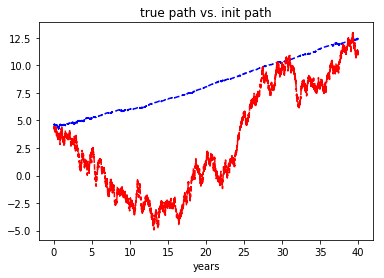

In [18]:
plt.plot(years, y[0,1:].T, 'b--')
plt.plot(years, y_[0,1:].T, 'r--')
plt.title('true path vs. init path')
plt.xlabel('years')
plt.show()

# neg vol: [[517]]


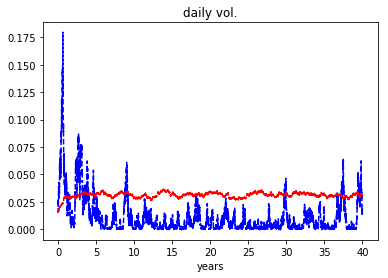

In [19]:
print("# neg vol:", sum(y[1,1:].T<0))
plt.plot(years, y[1,1:].T, 'b--')
plt.plot(years, y_[1,1:].T, 'r--')
plt.title('daily vol.')
plt.xlabel('years')
plt.show()